# Strategy 2.1 - Price to Book Strategy

In [9]:
import sys
import os

# Get the parent directory of the "notebook" folder
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to the Python path
sys.path.append(project_root)

In [11]:
from strategies.ratio_value import RatioValueStrategy
from utils.backtest import Backtest
from utils.data_handler import DataHandler
import yfinance as yf
import pandas as pd

In [13]:
%load_ext autoreload
%autoreload 2

In [15]:
%reload_ext autoreload

In [17]:
# Get the parent directory of the "notebook" folder
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to the Python path
sys.path.append(project_root)

In [24]:
file_name = '../data/price_to_book_ratio.csv'

# Automatically use the current working directory (or adjust as needed)
current_dir = os.getcwd()
file_path = os.path.join(current_dir, file_name)

## In sample Backtest to determine the best parameters

In [27]:
# Define tickers and parameter grid
tickers = [
    "AAPL", "ABT", "ADI", "ADM", "ADP", "ADSK", "AEE", "AEP", "AJG", "AKAM",
    "ALB", "AMAT", "AMD", "AME", "AMGN", "AMT", "AMZN", "AON", "AOS", "APA",
    "APD", "APH", "ARE", "AVB", "AVY", "AXP", "AZO", "BA", "BAC", "BAX",
    "BBY", "BDX", "BEN", "BIIB", "BK", "BLK", "BMY", "BSX", "BXP", "C",
    "CAG", "CAH", "CAT", "CB", "CCI", "CDNS", "CHD", "CHRW", "CINF", "CL",
    "CLX", "CMI", "CNP", "COO", "COP", "COST", "CPB", "CPRT", "CSCO", "CTAS",
    "CTSH", "D", "DE", "DGX", "DHI", "DIS", "DLTR", "DOV", "DRI", "DTE",
    "DVA", "EA", "EBAY", "ECL", "ED", "EFX", "EIX", "EL", "EMN", "EMR",
    "EOG", "EQR", "ES", "ESS", "F", "FAST", "FCX", "FDX", "FE", "FFIV",
    "FITB", "FRT", "GD", "GE", "GILD", "GIS", "GPC", "GWW", "HAL", "HAS"
] # Add more tickers as needed
frequencies = ['weekly', 'monthly', '6month']
K = [0.5, 1, 1.5]

# Initialize final results container
all_results = {}
best_params = []

# Loop over each ticker
for ticker in tickers:
    print(f"\n--- Evaluating {ticker} ---")

    # Initialize data
    data_handler = DataHandler(ticker=ticker, start_date='2004-12-12', end_date='2015-12-12')
    prices = data_handler.fetch_data()
    pb_series = data_handler.fetch_pb_series(file_path)

    results = {}

    # Loop over each frequency and threshold
    for freq in frequencies:
        results[freq] = {}
        for thresh in K:
            print(f"\nTesting {freq} frequency strategy with k={thresh} for {ticker}:")

            # Initialize strategy
            strategy = RatioValueStrategy(pb_series, "PB", window=5, k=thresh, frequency=freq)

            # Run backtest
            backtest = Backtest(
                data=prices,
                strategy=strategy,
                plot_results=False
            )

            # Store results
            result = backtest.run()
            results[freq][thresh] = result

            # Print metrics
            print(f"Final Portfolio Value: ${result['Final Value']:,.2f}")
            print(f"Total Return: {result['Return']:.2%}")
            print(f"Sharpe Ratio: {result['Sharpe Ratio']:.2f}")
            print(f"Max Drawdown: {result['Max Drawdown']:.2%}")

    # Save all results for this ticker
    all_results[ticker] = results

    # Flatten and create comparison DataFrame
    comparison = pd.concat({
        freq: pd.DataFrame.from_dict(results[freq], orient='index')
        for freq in frequencies
    }, names=['Frequency', 'k'])

    # Find best combo based on Sharpe Ratio
    best_idx = comparison['Sharpe Ratio'].idxmax()
    best_row = comparison.loc[best_idx]
    best_params.append({
        'Ticker': ticker,
        'Best Frequency': best_idx[0],
        'Best k': best_idx[1],
        'Sharpe Ratio': best_row['Sharpe Ratio'],
        'Total Return': best_row['Return'],
        'Final Value': best_row['Final Value'],
        'Max Drawdown': best_row['Max Drawdown']
    })

    # Optionally show per-stock comparison table
    print("\nStrategy Comparison Table:")
    print(comparison.round(4))

# Convert best parameter summary to DataFrame
best_params_df = pd.DataFrame(best_params)
print("\n=== Summary of Best Parameters by Ticker ===")
print(best_params_df.round(4))

[*********************100%***********************]  1 of 1 completed


--- Evaluating AAPL ---



Testing weekly frequency strategy with k=0.5 for AAPL:
Final Portfolio Value: $218,709.74
Total Return: 118.71%
Sharpe Ratio: 0.40
Max Drawdown: -64.04%

Testing weekly frequency strategy with k=1 for AAPL:
Final Portfolio Value: $287,237.34
Total Return: 187.24%
Sharpe Ratio: 0.49
Max Drawdown: -62.57%

Testing weekly frequency strategy with k=1.5 for AAPL:
Final Portfolio Value: $550,507.51
Total Return: 450.51%
Sharpe Ratio: 0.72
Max Drawdown: -60.66%

Testing monthly frequency strategy with k=0.5 for AAPL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $514,398.03
Total Return: 414.40%
Sharpe Ratio: 0.69
Max Drawdown: -58.83%

Testing monthly frequency strategy with k=1 for AAPL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $382,281.97
Total Return: 282.28%
Sharpe Ratio: 0.61
Max Drawdown: -58.83%

Testing monthly frequency strategy with k=1.5 for AAPL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $97,420.56
Total Return: -2.58%
Sharpe Ratio: 0.08
Max Drawdown: -58.83%

Testing 6month frequency strategy with k=0.5 for AAPL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $4,201,644.15
Total Return: 4101.64%
Sharpe Ratio: 1.35
Max Drawdown: -43.80%

Testing 6month frequency strategy with k=1 for AAPL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $872,884.63
Total Return: 772.88%
Sharpe Ratio: 1.06
Max Drawdown: -43.80%

Testing 6month frequency strategy with k=1.5 for AAPL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $928,302.22
Total Return: 828.30%
Sharpe Ratio: 1.03
Max Drawdown: -43.80%

Strategy Comparison Table:
                Final Value   Return  Sharpe Ratio  Max Drawdown
Frequency k                                                     
weekly    0.5  2.187097e+05   1.1871        0.4008       -0.6404
          1.0  2.872373e+05   1.8724        0.4928       -0.6257
          1.5  5.505075e+05   4.5051        0.7216       -0.6066
monthly   0.5  5.143980e+05   4.1440        0.6852       -0.5883
          1.0  3.822820e+05   2.8228        0.6099       -0.5883
          1.5  9.742056e+04  -0.0258        0.0825       -0.5883
6month    0.5  4.201644e+06  41.0164        1.3527       -0.4380
          1.0  8.728846e+05   7.7288        1.0584       -0.4380
          1.5  9.283022e+05   8.2830        1.0286       -0.4380

--- Evaluating ABT ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ABT:
Final Portfolio Value: $55,934.54
Total Return: -44.07%
Sharpe Ratio: -0.28
Max Drawdown: -47.59%

Testing weekly frequency strategy with k=1 for ABT:
Final Portfolio Value: $62,348.66
Total Return: -37.65%
Sharpe Ratio: -0.22
Max Drawdown: -44.12%

Testing weekly frequency strategy with k=1.5 for ABT:
Final Portfolio Value: $117,556.83
Total Return: 17.56%
Sharpe Ratio: 0.17
Max Drawdown: -25.04%

Testing monthly frequency strategy with k=0.5 for ABT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $189,311.18
Total Return: 89.31%
Sharpe Ratio: 0.46
Max Drawdown: -20.67%

Testing monthly frequency strategy with k=1 for ABT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $230,020.02
Total Return: 130.02%
Sharpe Ratio: 0.57
Max Drawdown: -23.81%

Testing monthly frequency strategy with k=1.5 for ABT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $163,434.20
Total Return: 63.43%
Sharpe Ratio: 0.38
Max Drawdown: -28.92%

Testing 6month frequency strategy with k=0.5 for ABT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $183,102.69
Total Return: 83.10%
Sharpe Ratio: 0.43
Max Drawdown: -28.93%

Testing 6month frequency strategy with k=1 for ABT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $191,712.58
Total Return: 91.71%
Sharpe Ratio: 0.61
Max Drawdown: -17.77%

Testing 6month frequency strategy with k=1.5 for ABT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   55934.5442 -0.4407       -0.2842       -0.4759
          1.0   62348.6649 -0.3765       -0.2218       -0.4412
          1.5  117556.8296  0.1756        0.1720       -0.2504
monthly   0.5  189311.1809  0.8931        0.4639       -0.2067
          1.0  230020.0158  1.3002        0.5711       -0.2381
          1.5  163434.2032  0.6343        0.3761       -0.2892
6month    0.5  183102.6932  0.8310        0.4259       -0.2893
          1.0  191712.5836  0.9171        0.6097       -0.1777
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating ADI ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ADI:
Final Portfolio Value: $120,070.83
Total Return: 20.07%
Sharpe Ratio: 0.19
Max Drawdown: -50.53%

Testing weekly frequency strategy with k=1 for ADI:
Final Portfolio Value: $187,479.22
Total Return: 87.48%
Sharpe Ratio: 0.36
Max Drawdown: -50.04%

Testing weekly frequency strategy with k=1.5 for ADI:
Final Portfolio Value: $159,024.27
Total Return: 59.02%
Sharpe Ratio: 0.30
Max Drawdown: -61.06%

Testing monthly frequency strategy with k=0.5 for ADI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $89,259.76
Total Return: -10.74%
Sharpe Ratio: 0.07
Max Drawdown: -52.04%

Testing monthly frequency strategy with k=1 for ADI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $150,008.73
Total Return: 50.01%
Sharpe Ratio: 0.28
Max Drawdown: -54.99%

Testing monthly frequency strategy with k=1.5 for ADI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $204,426.11
Total Return: 104.43%
Sharpe Ratio: 0.45
Max Drawdown: -28.71%

Testing 6month frequency strategy with k=0.5 for ADI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $154,226.72
Total Return: 54.23%
Sharpe Ratio: 0.33
Max Drawdown: -32.02%

Testing 6month frequency strategy with k=1 for ADI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $269,422.36
Total Return: 169.42%
Sharpe Ratio: 0.52
Max Drawdown: -32.02%

Testing 6month frequency strategy with k=1.5 for ADI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $351,555.97
Total Return: 251.56%
Sharpe Ratio: 0.63
Max Drawdown: -28.71%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  120070.8347  0.2007        0.1860       -0.5053
          1.0  187479.2220  0.8748        0.3621       -0.5004
          1.5  159024.2703  0.5902        0.2957       -0.6106
monthly   0.5   89259.7572 -0.1074        0.0678       -0.5204
          1.0  150008.7345  0.5001        0.2767       -0.5499
          1.5  204426.1094  1.0443        0.4474       -0.2871
6month    0.5  154226.7163  0.5423        0.3291       -0.3202
          1.0  269422.3623  1.6942        0.5214       -0.3202
          1.5  351555.9651  2.5156        0.6279       -0.2871

--- Evaluating ADM ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ADM:
Final Portfolio Value: $95,790.72
Total Return: -4.21%
Sharpe Ratio: 0.11
Max Drawdown: -65.04%

Testing weekly frequency strategy with k=1 for ADM:
Final Portfolio Value: $91,110.11
Total Return: -8.89%
Sharpe Ratio: 0.09
Max Drawdown: -61.48%

Testing weekly frequency strategy with k=1.5 for ADM:
Final Portfolio Value: $105,157.11
Total Return: 5.16%
Sharpe Ratio: 0.15
Max Drawdown: -61.48%

Testing monthly frequency strategy with k=0.5 for ADM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $133,425.28
Total Return: 33.43%
Sharpe Ratio: 0.23
Max Drawdown: -68.00%

Testing monthly frequency strategy with k=1 for ADM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $142,732.83
Total Return: 42.73%
Sharpe Ratio: 0.25
Max Drawdown: -56.52%

Testing monthly frequency strategy with k=1.5 for ADM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $146,106.09
Total Return: 46.11%
Sharpe Ratio: 0.55
Max Drawdown: -15.29%

Testing 6month frequency strategy with k=0.5 for ADM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $279,307.41
Total Return: 179.31%
Sharpe Ratio: 0.46
Max Drawdown: -56.88%

Testing 6month frequency strategy with k=1 for ADM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $142,394.75
Total Return: 42.39%
Sharpe Ratio: 0.25
Max Drawdown: -54.30%

Testing 6month frequency strategy with k=1.5 for ADM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   95790.7180 -0.0421        0.1090       -0.6504
          1.0   91110.1068 -0.0889        0.0893       -0.6148
          1.5  105157.1127  0.0516        0.1497       -0.6148
monthly   0.5  133425.2773  0.3343        0.2298       -0.6800
          1.0  142732.8287  0.4273        0.2543       -0.5652
          1.5  146106.0901  0.4611        0.5463       -0.1529
6month    0.5  279307.4112  1.7931        0.4645       -0.5688
          1.0  142394.7473  0.4239        0.2539       -0.5430
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating ADP ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ADP:
Final Portfolio Value: $54,689.59
Total Return: -45.31%
Sharpe Ratio: -0.29
Max Drawdown: -52.01%

Testing weekly frequency strategy with k=1 for ADP:
Final Portfolio Value: $62,406.83
Total Return: -37.59%
Sharpe Ratio: -0.22
Max Drawdown: -44.00%

Testing weekly frequency strategy with k=1.5 for ADP:
Final Portfolio Value: $181,249.60
Total Return: 81.25%
Sharpe Ratio: 0.44
Max Drawdown: -14.75%

Testing monthly frequency strategy with k=0.5 for ADP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $208,648.51
Total Return: 108.65%
Sharpe Ratio: 0.55
Max Drawdown: -19.76%

Testing monthly frequency strategy with k=1 for ADP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $204,905.76
Total Return: 104.91%
Sharpe Ratio: 0.53
Max Drawdown: -19.63%

Testing monthly frequency strategy with k=1.5 for ADP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $185,591.37
Total Return: 85.59%
Sharpe Ratio: 0.54
Max Drawdown: -19.63%

Testing 6month frequency strategy with k=0.5 for ADP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $141,691.38
Total Return: 41.69%
Sharpe Ratio: 0.32
Max Drawdown: -30.24%

Testing 6month frequency strategy with k=1 for ADP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $159,041.83
Total Return: 59.04%
Sharpe Ratio: 0.46
Max Drawdown: -18.97%

Testing 6month frequency strategy with k=1.5 for ADP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $252,862.40
Total Return: 152.86%
Sharpe Ratio: 0.81
Max Drawdown: -18.56%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   54689.5912 -0.4531       -0.2929       -0.5201
          1.0   62406.8251 -0.3759       -0.2156       -0.4400
          1.5  181249.6025  0.8125        0.4386       -0.1475
monthly   0.5  208648.5087  1.0865        0.5453       -0.1976
          1.0  204905.7579  1.0491        0.5313       -0.1963
          1.5  185591.3711  0.8559        0.5360       -0.1963
6month    0.5  141691.3789  0.4169        0.3202       -0.3024
          1.0  159041.8281  0.5904        0.4603       -0.1897
          1.5  252862.3985  1.5286        0.8118       -0.1856

--- Evaluating ADSK ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ADSK:
Final Portfolio Value: $40,795.40
Total Return: -59.20%
Sharpe Ratio: -0.11
Max Drawdown: -79.20%

Testing weekly frequency strategy with k=1 for ADSK:
Final Portfolio Value: $66,931.48
Total Return: -33.07%
Sharpe Ratio: 0.02
Max Drawdown: -74.22%

Testing weekly frequency strategy with k=1.5 for ADSK:
Final Portfolio Value: $52,813.68
Total Return: -47.19%
Sharpe Ratio: -0.05
Max Drawdown: -70.71%

Testing monthly frequency strategy with k=0.5 for ADSK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $110,548.59
Total Return: 10.55%
Sharpe Ratio: 0.18
Max Drawdown: -74.89%

Testing monthly frequency strategy with k=1 for ADSK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $101,060.26
Total Return: 1.06%
Sharpe Ratio: 0.16
Max Drawdown: -73.24%

Testing monthly frequency strategy with k=1.5 for ADSK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $90,982.83
Total Return: -9.02%
Sharpe Ratio: 0.13
Max Drawdown: -72.20%

Testing 6month frequency strategy with k=0.5 for ADSK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $143,988.76
Total Return: 43.99%
Sharpe Ratio: 0.26
Max Drawdown: -76.91%

Testing 6month frequency strategy with k=1 for ADSK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $111,120.20
Total Return: 11.12%
Sharpe Ratio: 0.16
Max Drawdown: -69.29%

Testing 6month frequency strategy with k=1.5 for ADSK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $111,120.20
Total Return: 11.12%
Sharpe Ratio: 0.16
Max Drawdown: -69.29%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   40795.3953 -0.5920       -0.1119       -0.7920
          1.0   66931.4811 -0.3307        0.0248       -0.7422
          1.5   52813.6789 -0.4719       -0.0490       -0.7071
monthly   0.5  110548.5857  0.1055        0.1828       -0.7489
          1.0  101060.2564  0.0106        0.1554       -0.7324
          1.5   90982.8298 -0.0902        0.1303       -0.7220
6month    0.5  143988.7598  0.4399        0.2602       -0.7691
          1.0  111120.1953  0.1112        0.1609       -0.6929
          1.5  111120.1953  0.1112        0.1609       -0.6929

--- Evaluating AEE ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AEE:
Final Portfolio Value: $38,445.03
Total Return: -61.55%
Sharpe Ratio: -0.45
Max Drawdown: -63.95%

Testing weekly frequency strategy with k=1 for AEE:
Final Portfolio Value: $58,485.25
Total Return: -41.51%
Sharpe Ratio: -0.21
Max Drawdown: -55.42%

Testing weekly frequency strategy with k=1.5 for AEE:
Final Portfolio Value: $159,585.92
Total Return: 59.59%
Sharpe Ratio: 0.33
Max Drawdown: -33.15%

Testing monthly frequency strategy with k=0.5 for AEE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $83,102.79
Total Return: -16.90%
Sharpe Ratio: -0.01
Max Drawdown: -55.69%

Testing monthly frequency strategy with k=1 for AEE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $87,480.16
Total Return: -12.52%
Sharpe Ratio: 0.02
Max Drawdown: -55.69%

Testing monthly frequency strategy with k=1.5 for AEE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $80,197.60
Total Return: -19.80%
Sharpe Ratio: -0.02
Max Drawdown: -60.56%

Testing 6month frequency strategy with k=0.5 for AEE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $86,160.85
Total Return: -13.84%
Sharpe Ratio: -0.00
Max Drawdown: -51.90%

Testing 6month frequency strategy with k=1 for AEE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $99,136.88
Total Return: -0.86%
Sharpe Ratio: 0.09
Max Drawdown: -53.05%

Testing 6month frequency strategy with k=1.5 for AEE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $172,164.91
Total Return: 72.16%
Sharpe Ratio: 0.39
Max Drawdown: -42.36%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   38445.0316 -0.6155       -0.4503       -0.6395
          1.0   58485.2501 -0.4151       -0.2149       -0.5542
          1.5  159585.9243  0.5959        0.3307       -0.3315
monthly   0.5   83102.7924 -0.1690       -0.0131       -0.5569
          1.0   87480.1597 -0.1252        0.0181       -0.5569
          1.5   80197.5965 -0.1980       -0.0242       -0.6056
6month    0.5   86160.8509 -0.1384       -0.0020       -0.5190
          1.0   99136.8820 -0.0086        0.0866       -0.5305
          1.5  172164.9136  0.7216        0.3851       -0.4236

--- Evaluating AEP ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AEP:
Final Portfolio Value: $39,582.71
Total Return: -60.42%
Sharpe Ratio: -0.41
Max Drawdown: -65.23%

Testing weekly frequency strategy with k=1 for AEP:
Final Portfolio Value: $67,988.58
Total Return: -32.01%
Sharpe Ratio: -0.11
Max Drawdown: -51.51%

Testing weekly frequency strategy with k=1.5 for AEP:
Final Portfolio Value: $106,484.88
Total Return: 6.48%
Sharpe Ratio: 0.12
Max Drawdown: -39.01%

Testing monthly frequency strategy with k=0.5 for AEP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $113,097.73
Total Return: 13.10%
Sharpe Ratio: 0.15
Max Drawdown: -47.16%

Testing monthly frequency strategy with k=1 for AEP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $104,037.33
Total Return: 4.04%
Sharpe Ratio: 0.10
Max Drawdown: -44.14%

Testing monthly frequency strategy with k=1.5 for AEP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $93,550.89
Total Return: -6.45%
Sharpe Ratio: 0.03
Max Drawdown: -43.68%

Testing 6month frequency strategy with k=0.5 for AEP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $149,634.48
Total Return: 49.63%
Sharpe Ratio: 0.30
Max Drawdown: -42.95%

Testing 6month frequency strategy with k=1 for AEP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $125,194.24
Total Return: 25.19%
Sharpe Ratio: 0.20
Max Drawdown: -48.43%

Testing 6month frequency strategy with k=1.5 for AEP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   39582.7066 -0.6042       -0.4082       -0.6523
          1.0   67988.5817 -0.3201       -0.1113       -0.5151
          1.5  106484.8765  0.0648        0.1172       -0.3901
monthly   0.5  113097.7300  0.1310        0.1507       -0.4716
          1.0  104037.3255  0.0404        0.1039       -0.4414
          1.5   93550.8852 -0.0645        0.0350       -0.4368
6month    0.5  149634.4847  0.4963        0.2987       -0.4295
          1.0  125194.2431  0.2519        0.2046       -0.4843
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating AJG ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AJG:
Final Portfolio Value: $52,876.40
Total Return: -47.12%
Sharpe Ratio: -0.23
Max Drawdown: -51.38%

Testing weekly frequency strategy with k=1 for AJG:
Final Portfolio Value: $57,787.89
Total Return: -42.21%
Sharpe Ratio: -0.19
Max Drawdown: -55.49%

Testing weekly frequency strategy with k=1.5 for AJG:
Final Portfolio Value: $124,243.63
Total Return: 24.24%
Sharpe Ratio: 0.20
Max Drawdown: -23.21%

Testing monthly frequency strategy with k=0.5 for AJG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $201,921.90
Total Return: 101.92%
Sharpe Ratio: 0.45
Max Drawdown: -20.22%

Testing monthly frequency strategy with k=1 for AJG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $127,164.31
Total Return: 27.16%
Sharpe Ratio: 0.23
Max Drawdown: -16.19%

Testing monthly frequency strategy with k=1.5 for AJG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $159,960.52
Total Return: 59.96%
Sharpe Ratio: 0.50
Max Drawdown: -16.60%

Testing 6month frequency strategy with k=0.5 for AJG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $211,415.11
Total Return: 111.42%
Sharpe Ratio: 0.47
Max Drawdown: -24.44%

Testing 6month frequency strategy with k=1 for AJG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $291,078.52
Total Return: 191.08%
Sharpe Ratio: 0.60
Max Drawdown: -24.44%

Testing 6month frequency strategy with k=1.5 for AJG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   52876.4038 -0.4712       -0.2334       -0.5138
          1.0   57787.8937 -0.4221       -0.1932       -0.5549
          1.5  124243.6300  0.2424        0.2033       -0.2321
monthly   0.5  201921.8984  1.0192        0.4542       -0.2022
          1.0  127164.3115  0.2716        0.2310       -0.1619
          1.5  159960.5239  0.5996        0.4954       -0.1660
6month    0.5  211415.1095  1.1142        0.4724       -0.2444
          1.0  291078.5153  1.9108        0.6035       -0.2444
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating AKAM ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AKAM:
Final Portfolio Value: $101,444.87
Total Return: 1.44%
Sharpe Ratio: 0.19
Max Drawdown: -85.92%

Testing weekly frequency strategy with k=1 for AKAM:
Final Portfolio Value: $145,624.62
Total Return: 45.62%
Sharpe Ratio: 0.27
Max Drawdown: -78.27%

Testing weekly frequency strategy with k=1.5 for AKAM:
Final Portfolio Value: $171,032.52
Total Return: 71.03%
Sharpe Ratio: 0.31
Max Drawdown: -66.09%

Testing monthly frequency strategy with k=0.5 for AKAM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $112,830.87
Total Return: 12.83%
Sharpe Ratio: 0.21
Max Drawdown: -76.76%

Testing monthly frequency strategy with k=1 for AKAM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $102,587.46
Total Return: 2.59%
Sharpe Ratio: 0.20
Max Drawdown: -84.29%

Testing monthly frequency strategy with k=1.5 for AKAM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $160,721.56
Total Return: 60.72%
Sharpe Ratio: 0.30
Max Drawdown: -54.49%

Testing 6month frequency strategy with k=0.5 for AKAM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $119,886.93
Total Return: 19.89%
Sharpe Ratio: 0.21
Max Drawdown: -76.98%

Testing 6month frequency strategy with k=1 for AKAM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $143,387.46
Total Return: 43.39%
Sharpe Ratio: 0.26
Max Drawdown: -76.98%

Testing 6month frequency strategy with k=1.5 for AKAM:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  101444.8683  0.0144        0.1871       -0.8592
          1.0  145624.6190  0.4562        0.2744       -0.7827
          1.5  171032.5201  0.7103        0.3130       -0.6609
monthly   0.5  112830.8730  0.1283        0.2149       -0.7676
          1.0  102587.4641  0.0259        0.2036       -0.8429
          1.5  160721.5640  0.6072        0.2989       -0.5449
6month    0.5  119886.9281  0.1989        0.2060       -0.7698
          1.0  143387.4585  0.4339        0.2622       -0.7698
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating ALB ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ALB:
Final Portfolio Value: $103,718.52
Total Return: 3.72%
Sharpe Ratio: 0.15
Max Drawdown: -60.81%

Testing weekly frequency strategy with k=1 for ALB:
Final Portfolio Value: $169,218.22
Total Return: 69.22%
Sharpe Ratio: 0.31
Max Drawdown: -54.09%

Testing weekly frequency strategy with k=1.5 for ALB:
Final Portfolio Value: $112,322.82
Total Return: 12.32%
Sharpe Ratio: 0.18
Max Drawdown: -64.52%

Testing monthly frequency strategy with k=0.5 for ALB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $140,219.15
Total Return: 40.22%
Sharpe Ratio: 0.25
Max Drawdown: -66.11%

Testing monthly frequency strategy with k=1 for ALB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $126,724.42
Total Return: 26.72%
Sharpe Ratio: 0.22
Max Drawdown: -66.30%

Testing monthly frequency strategy with k=1.5 for ALB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $90,762.72
Total Return: -9.24%
Sharpe Ratio: 0.10
Max Drawdown: -65.05%

Testing 6month frequency strategy with k=0.5 for ALB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $187,762.68
Total Return: 87.76%
Sharpe Ratio: 0.34
Max Drawdown: -66.30%

Testing 6month frequency strategy with k=1 for ALB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $152,166.34
Total Return: 52.17%
Sharpe Ratio: 0.31
Max Drawdown: -35.42%

Testing 6month frequency strategy with k=1.5 for ALB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $292,880.72
Total Return: 192.88%
Sharpe Ratio: 0.51
Max Drawdown: -44.81%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  103718.5176  0.0372        0.1533       -0.6081
          1.0  169218.2159  0.6922        0.3108       -0.5409
          1.5  112322.8184  0.1232        0.1798       -0.6452
monthly   0.5  140219.1513  0.4022        0.2513       -0.6611
          1.0  126724.4185  0.2672        0.2180       -0.6630
          1.5   90762.7193 -0.0924        0.1032       -0.6505
6month    0.5  187762.6799  0.8776        0.3429       -0.6630
          1.0  152166.3447  0.5217        0.3087       -0.3542
          1.5  292880.7206  1.9288        0.5135       -0.4481

--- Evaluating AMAT ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AMAT:
Final Portfolio Value: $40,819.42
Total Return: -59.18%
Sharpe Ratio: -0.20
Max Drawdown: -67.81%

Testing weekly frequency strategy with k=1 for AMAT:
Final Portfolio Value: $84,257.86
Total Return: -15.74%
Sharpe Ratio: 0.06
Max Drawdown: -59.48%

Testing weekly frequency strategy with k=1.5 for AMAT:
Final Portfolio Value: $74,473.49
Total Return: -25.53%
Sharpe Ratio: 0.02
Max Drawdown: -67.22%

Testing monthly frequency strategy with k=0.5 for AMAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $71,676.14
Total Return: -28.32%
Sharpe Ratio: -0.01
Max Drawdown: -62.45%

Testing monthly frequency strategy with k=1 for AMAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $67,451.92
Total Return: -32.55%
Sharpe Ratio: -0.04
Max Drawdown: -58.70%

Testing monthly frequency strategy with k=1.5 for AMAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $66,017.73
Total Return: -33.98%
Sharpe Ratio: -0.04
Max Drawdown: -62.18%

Testing 6month frequency strategy with k=0.5 for AMAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $121,260.12
Total Return: 21.26%
Sharpe Ratio: 0.21
Max Drawdown: -63.80%

Testing 6month frequency strategy with k=1 for AMAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $182,489.21
Total Return: 82.49%
Sharpe Ratio: 0.36
Max Drawdown: -40.77%

Testing 6month frequency strategy with k=1.5 for AMAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $200,262.06
Total Return: 100.26%
Sharpe Ratio: 0.38
Max Drawdown: -43.32%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   40819.4192 -0.5918       -0.1974       -0.6781
          1.0   84257.8576 -0.1574        0.0590       -0.5948
          1.5   74473.4874 -0.2553        0.0242       -0.6722
monthly   0.5   71676.1363 -0.2832       -0.0086       -0.6245
          1.0   67451.9241 -0.3255       -0.0379       -0.5870
          1.5   66017.7331 -0.3398       -0.0384       -0.6218
6month    0.5  121260.1179  0.2126        0.2097       -0.6380
          1.0  182489.2087  0.8249        0.3570       -0.4077
          1.5  200262.0640  1.0026        0.3784       -0.4332

--- Evaluating AMD ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AMD:
Final Portfolio Value: $3,131.15
Total Return: -96.87%
Sharpe Ratio: -0.54
Max Drawdown: -97.81%

Testing weekly frequency strategy with k=1 for AMD:
Final Portfolio Value: $8,478.22
Total Return: -91.52%
Sharpe Ratio: -0.34
Max Drawdown: -94.26%

Testing weekly frequency strategy with k=1.5 for AMD:
Final Portfolio Value: $5,499.38
Total Return: -94.50%
Sharpe Ratio: -0.42
Max Drawdown: -96.26%

Testing monthly frequency strategy with k=0.5 for AMD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $6,055.94
Total Return: -93.94%
Sharpe Ratio: -0.43
Max Drawdown: -96.25%

Testing monthly frequency strategy with k=1 for AMD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $14,309.88
Total Return: -85.69%
Sharpe Ratio: -0.26
Max Drawdown: -91.09%

Testing monthly frequency strategy with k=1.5 for AMD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $79,057.15
Total Return: -20.94%
Sharpe Ratio: 0.09
Max Drawdown: -65.28%

Testing 6month frequency strategy with k=0.5 for AMD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $182,116.89
Total Return: 82.12%
Sharpe Ratio: 0.35
Max Drawdown: -40.51%

Testing 6month frequency strategy with k=1 for AMD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $64,628.71
Total Return: -35.37%
Sharpe Ratio: 0.09
Max Drawdown: -82.76%

Testing 6month frequency strategy with k=1.5 for AMD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $96,555.12
Total Return: -3.44%
Sharpe Ratio: 0.04
Max Drawdown: -35.97%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5    3131.1499 -0.9687       -0.5438       -0.9781
          1.0    8478.2185 -0.9152       -0.3417       -0.9426
          1.5    5499.3805 -0.9450       -0.4179       -0.9626
monthly   0.5    6055.9382 -0.9394       -0.4340       -0.9625
          1.0   14309.8811 -0.8569       -0.2560       -0.9109
          1.5   79057.1537 -0.2094        0.0856       -0.6528
6month    0.5  182116.8866  0.8212        0.3499       -0.4051
          1.0   64628.7101 -0.3537        0.0889       -0.8276
          1.5   96555.1180 -0.0344        0.0379       -0.3597

--- Evaluating AME ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AME:
Final Portfolio Value: $141,916.59
Total Return: 41.92%
Sharpe Ratio: 0.26
Max Drawdown: -45.95%

Testing weekly frequency strategy with k=1 for AME:
Final Portfolio Value: $223,210.87
Total Return: 123.21%
Sharpe Ratio: 0.45
Max Drawdown: -43.34%

Testing weekly frequency strategy with k=1.5 for AME:
Final Portfolio Value: $401,825.82
Total Return: 301.83%
Sharpe Ratio: 0.68
Max Drawdown: -45.25%

Testing monthly frequency strategy with k=0.5 for AME:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $245,823.77
Total Return: 145.82%
Sharpe Ratio: 0.48
Max Drawdown: -40.60%

Testing monthly frequency strategy with k=1 for AME:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $168,835.32
Total Return: 68.84%
Sharpe Ratio: 0.33
Max Drawdown: -42.02%

Testing monthly frequency strategy with k=1.5 for AME:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $383,049.86
Total Return: 283.05%
Sharpe Ratio: 0.69
Max Drawdown: -30.08%

Testing 6month frequency strategy with k=0.5 for AME:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $312,799.03
Total Return: 212.80%
Sharpe Ratio: 0.73
Max Drawdown: -26.61%

Testing 6month frequency strategy with k=1 for AME:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $186,495.26
Total Return: 86.50%
Sharpe Ratio: 0.51
Max Drawdown: -25.47%

Testing 6month frequency strategy with k=1.5 for AME:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $186,495.26
Total Return: 86.50%
Sharpe Ratio: 0.51
Max Drawdown: -25.47%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  141916.5889  0.4192        0.2556       -0.4595
          1.0  223210.8709  1.2321        0.4496       -0.4334
          1.5  401825.8177  3.0183        0.6795       -0.4525
monthly   0.5  245823.7690  1.4582        0.4775       -0.4060
          1.0  168835.3189  0.6884        0.3269       -0.4202
          1.5  383049.8595  2.8305        0.6946       -0.3008
6month    0.5  312799.0338  2.1280        0.7348       -0.2661
          1.0  186495.2639  0.8650        0.5095       -0.2547
          1.5  186495.2639  0.8650        0.5095       -0.2547

--- Evaluating AMGN ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AMGN:
Final Portfolio Value: $59,201.28
Total Return: -40.80%
Sharpe Ratio: -0.14
Max Drawdown: -61.29%

Testing weekly frequency strategy with k=1 for AMGN:
Final Portfolio Value: $72,855.25
Total Return: -27.14%
Sharpe Ratio: -0.04
Max Drawdown: -62.80%

Testing weekly frequency strategy with k=1.5 for AMGN:
Final Portfolio Value: $81,199.43
Total Return: -18.80%
Sharpe Ratio: 0.02
Max Drawdown: -66.12%

Testing monthly frequency strategy with k=0.5 for AMGN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $125,334.75
Total Return: 25.33%
Sharpe Ratio: 0.20
Max Drawdown: -42.93%

Testing monthly frequency strategy with k=1 for AMGN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $160,042.18
Total Return: 60.04%
Sharpe Ratio: 0.38
Max Drawdown: -47.29%

Testing monthly frequency strategy with k=1.5 for AMGN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $146,629.24
Total Return: 46.63%
Sharpe Ratio: 0.50
Max Drawdown: -16.97%

Testing 6month frequency strategy with k=0.5 for AMGN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $193,726.35
Total Return: 93.73%
Sharpe Ratio: 0.39
Max Drawdown: -35.81%

Testing 6month frequency strategy with k=1 for AMGN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,866.51
Total Return: 47.87%
Sharpe Ratio: 0.27
Max Drawdown: -53.61%

Testing 6month frequency strategy with k=1.5 for AMGN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   59201.2844 -0.4080       -0.1368       -0.6129
          1.0   72855.2506 -0.2714       -0.0372       -0.6280
          1.5   81199.4275 -0.1880        0.0152       -0.6612
monthly   0.5  125334.7458  0.2533        0.2046       -0.4293
          1.0  160042.1835  0.6004        0.3772       -0.4729
          1.5  146629.2450  0.4663        0.4954       -0.1697
6month    0.5  193726.3544  0.9373        0.3852       -0.3581
          1.0  147866.5122  0.4787        0.2687       -0.5361
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating AMT ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AMT:
Final Portfolio Value: $101,527.94
Total Return: 1.53%
Sharpe Ratio: 0.12
Max Drawdown: -55.50%

Testing weekly frequency strategy with k=1 for AMT:
Final Portfolio Value: $138,634.92
Total Return: 38.63%
Sharpe Ratio: 0.24
Max Drawdown: -54.76%

Testing weekly frequency strategy with k=1.5 for AMT:
Final Portfolio Value: $169,546.13
Total Return: 69.55%
Sharpe Ratio: 0.33
Max Drawdown: -51.88%

Testing monthly frequency strategy with k=0.5 for AMT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $113,669.34
Total Return: 13.67%
Sharpe Ratio: 0.16
Max Drawdown: -53.18%

Testing monthly frequency strategy with k=1 for AMT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $126,088.89
Total Return: 26.09%
Sharpe Ratio: 0.21
Max Drawdown: -44.80%

Testing monthly frequency strategy with k=1.5 for AMT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $131,314.78
Total Return: 31.31%
Sharpe Ratio: 0.24
Max Drawdown: -38.84%

Testing 6month frequency strategy with k=0.5 for AMT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $141,948.37
Total Return: 41.95%
Sharpe Ratio: 0.31
Max Drawdown: -19.71%

Testing 6month frequency strategy with k=1 for AMT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing 6month frequency strategy with k=1.5 for AMT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  101527.9376  0.0153        0.1158       -0.5550
          1.0  138634.9231  0.3863        0.2437       -0.5476
          1.5  169546.1295  0.6955        0.3271       -0.5188
monthly   0.5  113669.3382  0.1367        0.1595       -0.5318
          1.0  126088.8859  0.2609        0.2052       -0.4480
          1.5  131314.7821  0.3131        0.2366       -0.3884
6month    0.5  141948.3688  0.4195        0.3146       -0.1971
          1.0  100000.0000  0.0000           NaN        0.0000
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating AMZN ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AMZN:
Final Portfolio Value: $112,046.28
Total Return: 12.05%
Sharpe Ratio: 0.19
Max Drawdown: -71.74%

Testing weekly frequency strategy with k=1 for AMZN:
Final Portfolio Value: $184,646.27
Total Return: 84.65%
Sharpe Ratio: 0.33
Max Drawdown: -68.98%

Testing weekly frequency strategy with k=1.5 for AMZN:
Final Portfolio Value: $439,885.07
Total Return: 339.89%
Sharpe Ratio: 0.56
Max Drawdown: -65.25%

Testing monthly frequency strategy with k=0.5 for AMZN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $482,567.00
Total Return: 382.57%
Sharpe Ratio: 0.58
Max Drawdown: -65.25%

Testing monthly frequency strategy with k=1 for AMZN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $593,834.15
Total Return: 493.83%
Sharpe Ratio: 0.65
Max Drawdown: -63.60%

Testing monthly frequency strategy with k=1.5 for AMZN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $351,357.18
Total Return: 251.36%
Sharpe Ratio: 0.52
Max Drawdown: -61.38%

Testing 6month frequency strategy with k=0.5 for AMZN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $707,709.66
Total Return: 607.71%
Sharpe Ratio: 0.67
Max Drawdown: -65.25%

Testing 6month frequency strategy with k=1 for AMZN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $529,859.93
Total Return: 429.86%
Sharpe Ratio: 0.65
Max Drawdown: -60.23%

Testing 6month frequency strategy with k=1.5 for AMZN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  112046.2768  0.1205        0.1927       -0.7174
          1.0  184646.2651  0.8465        0.3340       -0.6898
          1.5  439885.0654  3.3989        0.5619       -0.6525
monthly   0.5  482567.0036  3.8257        0.5822       -0.6525
          1.0  593834.1529  4.9383        0.6464       -0.6360
          1.5  351357.1766  2.5136        0.5183       -0.6138
6month    0.5  707709.6598  6.0771        0.6703       -0.6525
          1.0  529859.9313  4.2986        0.6469       -0.6023
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating AON ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AON:
Final Portfolio Value: $90,419.67
Total Return: -9.58%
Sharpe Ratio: 0.04
Max Drawdown: -42.91%

Testing weekly frequency strategy with k=1 for AON:
Final Portfolio Value: $126,111.41
Total Return: 26.11%
Sharpe Ratio: 0.20
Max Drawdown: -44.16%

Testing weekly frequency strategy with k=1.5 for AON:
Final Portfolio Value: $167,243.32
Total Return: 67.24%
Sharpe Ratio: 0.34
Max Drawdown: -39.95%

Testing monthly frequency strategy with k=0.5 for AON:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $126,772.82
Total Return: 26.77%
Sharpe Ratio: 0.21
Max Drawdown: -28.03%

Testing monthly frequency strategy with k=1 for AON:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $172,627.27
Total Return: 72.63%
Sharpe Ratio: 0.39
Max Drawdown: -28.03%

Testing monthly frequency strategy with k=1.5 for AON:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $102,645.64
Total Return: 2.65%
Sharpe Ratio: 0.10
Max Drawdown: -4.63%

Testing 6month frequency strategy with k=0.5 for AON:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $196,217.87
Total Return: 96.22%
Sharpe Ratio: 0.44
Max Drawdown: -40.16%

Testing 6month frequency strategy with k=1 for AON:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $238,939.01
Total Return: 138.94%
Sharpe Ratio: 0.48
Max Drawdown: -30.31%

Testing 6month frequency strategy with k=1.5 for AON:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   90419.6678 -0.0958        0.0430       -0.4291
          1.0  126111.4133  0.2611        0.2048       -0.4416
          1.5  167243.3197  0.6724        0.3439       -0.3995
monthly   0.5  126772.8245  0.2677        0.2133       -0.2803
          1.0  172627.2653  0.7263        0.3907       -0.2803
          1.5  102645.6405  0.0265        0.0979       -0.0463
6month    0.5  196217.8727  0.9622        0.4440       -0.4016
          1.0  238939.0081  1.3894        0.4789       -0.3031
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating AOS ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AOS:
Final Portfolio Value: $186,929.63
Total Return: 86.93%
Sharpe Ratio: 0.35
Max Drawdown: -44.32%

Testing weekly frequency strategy with k=1 for AOS:
Final Portfolio Value: $298,247.31
Total Return: 198.25%
Sharpe Ratio: 0.52
Max Drawdown: -36.78%

Testing weekly frequency strategy with k=1.5 for AOS:
Final Portfolio Value: $985,461.75
Total Return: 885.46%
Sharpe Ratio: 0.91
Max Drawdown: -35.09%

Testing monthly frequency strategy with k=0.5 for AOS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $444,642.84
Total Return: 344.64%
Sharpe Ratio: 0.67
Max Drawdown: -31.59%

Testing monthly frequency strategy with k=1 for AOS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $324,701.00
Total Return: 224.70%
Sharpe Ratio: 0.53
Max Drawdown: -54.11%

Testing monthly frequency strategy with k=1.5 for AOS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $226,342.87
Total Return: 126.34%
Sharpe Ratio: 0.44
Max Drawdown: -54.11%

Testing 6month frequency strategy with k=0.5 for AOS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $217,860.18
Total Return: 117.86%
Sharpe Ratio: 0.41
Max Drawdown: -54.11%

Testing 6month frequency strategy with k=1 for AOS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $233,599.65
Total Return: 133.60%
Sharpe Ratio: 0.45
Max Drawdown: -54.11%

Testing 6month frequency strategy with k=1.5 for AOS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  186929.6294  0.8693        0.3519       -0.4432
          1.0  298247.3114  1.9825        0.5225       -0.3678
          1.5  985461.7503  8.8546        0.9077       -0.3509
monthly   0.5  444642.8411  3.4464        0.6699       -0.3159
          1.0  324700.9991  2.2470        0.5268       -0.5411
          1.5  226342.8717  1.2634        0.4435       -0.5411
6month    0.5  217860.1810  1.1786        0.4106       -0.5411
          1.0  233599.6496  1.3360        0.4456       -0.5411
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating APA ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for APA:
Final Portfolio Value: $47,554.02
Total Return: -52.45%
Sharpe Ratio: -0.09
Max Drawdown: -74.39%

Testing weekly frequency strategy with k=1 for APA:
Final Portfolio Value: $65,658.87
Total Return: -34.34%
Sharpe Ratio: 0.02
Max Drawdown: -71.30%

Testing weekly frequency strategy with k=1.5 for APA:
Final Portfolio Value: $184,134.03
Total Return: 84.13%
Sharpe Ratio: 0.33
Max Drawdown: -64.99%

Testing monthly frequency strategy with k=0.5 for APA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $85,800.24
Total Return: -14.20%
Sharpe Ratio: 0.11
Max Drawdown: -66.97%

Testing monthly frequency strategy with k=1 for APA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $84,770.68
Total Return: -15.23%
Sharpe Ratio: 0.10
Max Drawdown: -59.08%

Testing monthly frequency strategy with k=1.5 for APA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $62,473.75
Total Return: -37.53%
Sharpe Ratio: 0.02
Max Drawdown: -57.39%

Testing 6month frequency strategy with k=0.5 for APA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $259,083.71
Total Return: 159.08%
Sharpe Ratio: 0.52
Max Drawdown: -39.90%

Testing 6month frequency strategy with k=1 for APA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $112,383.49
Total Return: 12.38%
Sharpe Ratio: 0.16
Max Drawdown: -47.59%

Testing 6month frequency strategy with k=1.5 for APA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   47554.0196 -0.5245       -0.0940       -0.7439
          1.0   65658.8720 -0.3434        0.0214       -0.7130
          1.5  184134.0267  0.8413        0.3341       -0.6499
monthly   0.5   85800.2353 -0.1420        0.1067       -0.6697
          1.0   84770.6803 -0.1523        0.0994       -0.5908
          1.5   62473.7480 -0.3753        0.0153       -0.5739
6month    0.5  259083.7139  1.5908        0.5181       -0.3990
          1.0  112383.4950  0.1238        0.1620       -0.4759
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating APD ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for APD:
Final Portfolio Value: $56,723.58
Total Return: -43.28%
Sharpe Ratio: -0.13
Max Drawdown: -56.35%

Testing weekly frequency strategy with k=1 for APD:
Final Portfolio Value: $75,629.72
Total Return: -24.37%
Sharpe Ratio: -0.01
Max Drawdown: -58.37%

Testing weekly frequency strategy with k=1.5 for APD:
Final Portfolio Value: $90,897.41
Total Return: -9.10%
Sharpe Ratio: 0.06
Max Drawdown: -59.94%

Testing monthly frequency strategy with k=0.5 for APD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $66,960.17
Total Return: -33.04%
Sharpe Ratio: -0.07
Max Drawdown: -57.45%

Testing monthly frequency strategy with k=1 for APD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $148,857.70
Total Return: 48.86%
Sharpe Ratio: 0.28
Max Drawdown: -41.24%

Testing monthly frequency strategy with k=1.5 for APD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $75,141.62
Total Return: -24.86%
Sharpe Ratio: -0.04
Max Drawdown: -60.29%

Testing 6month frequency strategy with k=0.5 for APD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $398,551.36
Total Return: 298.55%
Sharpe Ratio: 0.80
Max Drawdown: -26.16%

Testing 6month frequency strategy with k=1 for APD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $304,537.96
Total Return: 204.54%
Sharpe Ratio: 0.69
Max Drawdown: -26.16%

Testing 6month frequency strategy with k=1.5 for APD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $315,247.14
Total Return: 215.25%
Sharpe Ratio: 0.66
Max Drawdown: -26.16%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   56723.5840 -0.4328       -0.1334       -0.5635
          1.0   75629.7211 -0.2437       -0.0099       -0.5837
          1.5   90897.4083 -0.0910        0.0647       -0.5994
monthly   0.5   66960.1739 -0.3304       -0.0697       -0.5745
          1.0  148857.7049  0.4886        0.2838       -0.4124
          1.5   75141.6186 -0.2486       -0.0408       -0.6029
6month    0.5  398551.3622  2.9855        0.7995       -0.2616
          1.0  304537.9636  2.0454        0.6896       -0.2616
          1.5  315247.1405  2.1525        0.6594       -0.2616

--- Evaluating APH ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for APH:
Final Portfolio Value: $84,571.99
Total Return: -15.43%
Sharpe Ratio: 0.06
Max Drawdown: -62.82%

Testing weekly frequency strategy with k=1 for APH:
Final Portfolio Value: $135,866.19
Total Return: 35.87%
Sharpe Ratio: 0.24
Max Drawdown: -59.86%

Testing weekly frequency strategy with k=1.5 for APH:
Final Portfolio Value: $245,504.04
Total Return: 145.50%
Sharpe Ratio: 0.46
Max Drawdown: -47.38%

Testing monthly frequency strategy with k=0.5 for APH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $300,446.72
Total Return: 200.45%
Sharpe Ratio: 0.52
Max Drawdown: -51.75%

Testing monthly frequency strategy with k=1 for APH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $242,702.35
Total Return: 142.70%
Sharpe Ratio: 0.45
Max Drawdown: -51.85%

Testing monthly frequency strategy with k=1.5 for APH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $123,585.85
Total Return: 23.59%
Sharpe Ratio: 0.20
Max Drawdown: -63.41%

Testing 6month frequency strategy with k=0.5 for APH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $333,368.94
Total Return: 233.37%
Sharpe Ratio: 0.51
Max Drawdown: -63.41%

Testing 6month frequency strategy with k=1 for APH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $264,934.62
Total Return: 164.93%
Sharpe Ratio: 0.53
Max Drawdown: -32.02%

Testing 6month frequency strategy with k=1.5 for APH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   84571.9852 -0.1543        0.0636       -0.6282
          1.0  135866.1869  0.3587        0.2362       -0.5986
          1.5  245504.0436  1.4550        0.4609       -0.4738
monthly   0.5  300446.7236  2.0045        0.5224       -0.5175
          1.0  242702.3530  1.4270        0.4465       -0.5185
          1.5  123585.8515  0.2359        0.1966       -0.6341
6month    0.5  333368.9409  2.3337        0.5128       -0.6341
          1.0  264934.6178  1.6493        0.5257       -0.3202
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating ARE ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ARE:
Final Portfolio Value: $45,953.57
Total Return: -54.05%
Sharpe Ratio: -0.09
Max Drawdown: -76.33%

Testing weekly frequency strategy with k=1 for ARE:
Final Portfolio Value: $68,683.41
Total Return: -31.32%
Sharpe Ratio: 0.02
Max Drawdown: -71.54%

Testing weekly frequency strategy with k=1.5 for ARE:
Final Portfolio Value: $163,351.75
Total Return: 63.35%
Sharpe Ratio: 0.30
Max Drawdown: -69.24%

Testing monthly frequency strategy with k=0.5 for ARE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $132,831.57
Total Return: 32.83%
Sharpe Ratio: 0.24
Max Drawdown: -56.01%

Testing monthly frequency strategy with k=1 for ARE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $185,697.06
Total Return: 85.70%
Sharpe Ratio: 0.34
Max Drawdown: -55.86%

Testing monthly frequency strategy with k=1.5 for ARE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $106,864.14
Total Return: 6.86%
Sharpe Ratio: 0.18
Max Drawdown: -55.85%

Testing 6month frequency strategy with k=0.5 for ARE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $116,190.51
Total Return: 16.19%
Sharpe Ratio: 0.21
Max Drawdown: -71.86%

Testing 6month frequency strategy with k=1 for ARE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $111,590.23
Total Return: 11.59%
Sharpe Ratio: 0.21
Max Drawdown: -71.86%

Testing 6month frequency strategy with k=1.5 for ARE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $155,867.23
Total Return: 55.87%
Sharpe Ratio: 0.28
Max Drawdown: -52.43%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   45953.5694 -0.5405       -0.0877       -0.7633
          1.0   68683.4052 -0.3132        0.0248       -0.7154
          1.5  163351.7550  0.6335        0.3003       -0.6924
monthly   0.5  132831.5724  0.3283        0.2369       -0.5601
          1.0  185697.0614  0.8570        0.3381       -0.5586
          1.5  106864.1400  0.0686        0.1770       -0.5585
6month    0.5  116190.5062  0.1619        0.2083       -0.7186
          1.0  111590.2323  0.1159        0.2070       -0.7186
          1.5  155867.2292  0.5587        0.2847       -0.5243

--- Evaluating AVB ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AVB:
Final Portfolio Value: $86,412.59
Total Return: -13.59%
Sharpe Ratio: 0.10
Max Drawdown: -72.04%

Testing weekly frequency strategy with k=1 for AVB:
Final Portfolio Value: $109,711.99
Total Return: 9.71%
Sharpe Ratio: 0.17
Max Drawdown: -65.81%

Testing weekly frequency strategy with k=1.5 for AVB:
Final Portfolio Value: $92,503.89
Total Return: -7.50%
Sharpe Ratio: 0.12
Max Drawdown: -60.62%

Testing monthly frequency strategy with k=0.5 for AVB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $101,104.96
Total Return: 1.10%
Sharpe Ratio: 0.16
Max Drawdown: -60.65%

Testing monthly frequency strategy with k=1 for AVB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $111,229.77
Total Return: 11.23%
Sharpe Ratio: 0.19
Max Drawdown: -60.66%

Testing monthly frequency strategy with k=1.5 for AVB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $101,965.07
Total Return: 1.97%
Sharpe Ratio: 0.17
Max Drawdown: -66.75%

Testing 6month frequency strategy with k=0.5 for AVB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $196,854.79
Total Return: 96.85%
Sharpe Ratio: 0.35
Max Drawdown: -60.66%

Testing 6month frequency strategy with k=1 for AVB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,854.05
Total Return: 47.85%
Sharpe Ratio: 0.27
Max Drawdown: -60.66%

Testing 6month frequency strategy with k=1.5 for AVB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $139,029.51
Total Return: 39.03%
Sharpe Ratio: 0.38
Max Drawdown: -16.45%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   86412.5878 -0.1359        0.0961       -0.7204
          1.0  109711.9939  0.0971        0.1681       -0.6581
          1.5   92503.8926 -0.0750        0.1171       -0.6062
monthly   0.5  101104.9621  0.0110        0.1573       -0.6065
          1.0  111229.7707  0.1123        0.1905       -0.6066
          1.5  101965.0653  0.0197        0.1733       -0.6675
6month    0.5  196854.7901  0.9685        0.3518       -0.6066
          1.0  147854.0544  0.4785        0.2711       -0.6066
          1.5  139029.5126  0.3903        0.3758       -0.1645

--- Evaluating AVY ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AVY:
Final Portfolio Value: $50,216.52
Total Return: -49.78%
Sharpe Ratio: -0.17
Max Drawdown: -65.36%

Testing weekly frequency strategy with k=1 for AVY:
Final Portfolio Value: $72,176.25
Total Return: -27.82%
Sharpe Ratio: -0.01
Max Drawdown: -60.29%

Testing weekly frequency strategy with k=1.5 for AVY:
Final Portfolio Value: $84,401.37
Total Return: -15.60%
Sharpe Ratio: 0.05
Max Drawdown: -62.01%

Testing monthly frequency strategy with k=0.5 for AVY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $66,186.54
Total Return: -33.81%
Sharpe Ratio: -0.04
Max Drawdown: -72.89%

Testing monthly frequency strategy with k=1 for AVY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $54,192.50
Total Return: -45.81%
Sharpe Ratio: -0.14
Max Drawdown: -72.89%

Testing monthly frequency strategy with k=1.5 for AVY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $37,116.99
Total Return: -62.88%
Sharpe Ratio: -0.32
Max Drawdown: -72.90%

Testing 6month frequency strategy with k=0.5 for AVY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $107,403.45
Total Return: 7.40%
Sharpe Ratio: 0.15
Max Drawdown: -73.02%

Testing 6month frequency strategy with k=1 for AVY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $79,589.73
Total Return: -20.41%
Sharpe Ratio: 0.01
Max Drawdown: -73.02%

Testing 6month frequency strategy with k=1.5 for AVY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,764.59
Total Return: 47.76%
Sharpe Ratio: 0.27
Max Drawdown: -65.79%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   50216.5165 -0.4978       -0.1674       -0.6536
          1.0   72176.2508 -0.2782       -0.0140       -0.6029
          1.5   84401.3732 -0.1560        0.0477       -0.6201
monthly   0.5   66186.5392 -0.3381       -0.0404       -0.7289
          1.0   54192.4968 -0.4581       -0.1405       -0.7289
          1.5   37116.9939 -0.6288       -0.3168       -0.7290
6month    0.5  107403.4473  0.0740        0.1537       -0.7302
          1.0   79589.7328 -0.2041        0.0077       -0.7302
          1.5  147764.5923  0.4776        0.2674       -0.6579

--- Evaluating AXP ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AXP:
Final Portfolio Value: $130,731.74
Total Return: 30.73%
Sharpe Ratio: 0.23
Max Drawdown: -49.90%

Testing weekly frequency strategy with k=1 for AXP:
Final Portfolio Value: $73,152.67
Total Return: -26.85%
Sharpe Ratio: 0.05
Max Drawdown: -74.17%

Testing weekly frequency strategy with k=1.5 for AXP:
Final Portfolio Value: $120,381.04
Total Return: 20.38%
Sharpe Ratio: 0.22
Max Drawdown: -82.73%

Testing monthly frequency strategy with k=0.5 for AXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $58,794.09
Total Return: -41.21%
Sharpe Ratio: 0.02
Max Drawdown: -83.35%

Testing monthly frequency strategy with k=1 for AXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $61,360.58
Total Return: -38.64%
Sharpe Ratio: 0.02
Max Drawdown: -82.53%

Testing monthly frequency strategy with k=1.5 for AXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $77,932.12
Total Return: -22.07%
Sharpe Ratio: 0.09
Max Drawdown: -82.31%

Testing 6month frequency strategy with k=0.5 for AXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $76,688.88
Total Return: -23.31%
Sharpe Ratio: 0.09
Max Drawdown: -80.27%

Testing 6month frequency strategy with k=1 for AXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $186,798.94
Total Return: 86.80%
Sharpe Ratio: 0.34
Max Drawdown: -83.90%

Testing 6month frequency strategy with k=1.5 for AXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $193,822.89
Total Return: 93.82%
Sharpe Ratio: 0.35
Max Drawdown: -75.33%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  130731.7360  0.3073        0.2296       -0.4990
          1.0   73152.6653 -0.2685        0.0542       -0.7417
          1.5  120381.0364  0.2038        0.2195       -0.8273
monthly   0.5   58794.0924 -0.4121        0.0153       -0.8335
          1.0   61360.5781 -0.3864        0.0183       -0.8253
          1.5   77932.1231 -0.2207        0.0854       -0.8231
6month    0.5   76688.8783 -0.2331        0.0935       -0.8027
          1.0  186798.9372  0.8680        0.3378       -0.8390
          1.5  193822.8871  0.9382        0.3460       -0.7533

--- Evaluating AZO ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for AZO:
Final Portfolio Value: $98,359.01
Total Return: -1.64%
Sharpe Ratio: 0.08
Max Drawdown: -36.13%

Testing weekly frequency strategy with k=1 for AZO:
Final Portfolio Value: $114,345.56
Total Return: 14.35%
Sharpe Ratio: 0.16
Max Drawdown: -39.76%

Testing weekly frequency strategy with k=1.5 for AZO:
Final Portfolio Value: $146,977.50
Total Return: 46.98%
Sharpe Ratio: 0.30
Max Drawdown: -35.39%

Testing monthly frequency strategy with k=0.5 for AZO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $160,287.12
Total Return: 60.29%
Sharpe Ratio: 0.37
Max Drawdown: -28.33%

Testing monthly frequency strategy with k=1 for AZO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,617.10
Total Return: 47.62%
Sharpe Ratio: 0.33
Max Drawdown: -28.33%

Testing monthly frequency strategy with k=1.5 for AZO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $118,855.33
Total Return: 18.86%
Sharpe Ratio: 0.22
Max Drawdown: -24.00%

Testing 6month frequency strategy with k=0.5 for AZO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $296,470.04
Total Return: 196.47%
Sharpe Ratio: 0.77
Max Drawdown: -27.97%

Testing 6month frequency strategy with k=1 for AZO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $277,749.72
Total Return: 177.75%
Sharpe Ratio: 0.84
Max Drawdown: -17.83%

Testing 6month frequency strategy with k=1.5 for AZO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $489,831.88
Total Return: 389.83%
Sharpe Ratio: 1.10
Max Drawdown: -14.77%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   98359.0078 -0.0164        0.0787       -0.3613
          1.0  114345.5649  0.1435        0.1570       -0.3976
          1.5  146977.4999  0.4698        0.2963       -0.3539
monthly   0.5  160287.1213  0.6029        0.3717       -0.2833
          1.0  147617.1043  0.4762        0.3344       -0.2833
          1.5  118855.3332  0.1886        0.2203       -0.2400
6month    0.5  296470.0402  1.9647        0.7664       -0.2797
          1.0  277749.7202  1.7775        0.8392       -0.1783
          1.5  489831.8820  3.8983        1.1034       -0.1477

--- Evaluating BA ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BA:
Final Portfolio Value: $86,714.45
Total Return: -13.29%
Sharpe Ratio: 0.05
Max Drawdown: -53.79%

Testing weekly frequency strategy with k=1 for BA:
Final Portfolio Value: $104,187.76
Total Return: 4.19%
Sharpe Ratio: 0.13
Max Drawdown: -59.17%

Testing weekly frequency strategy with k=1.5 for BA:
Final Portfolio Value: $84,078.29
Total Return: -15.92%
Sharpe Ratio: 0.05
Max Drawdown: -69.52%

Testing monthly frequency strategy with k=0.5 for BA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $114,684.39
Total Return: 14.68%
Sharpe Ratio: 0.17
Max Drawdown: -71.43%

Testing monthly frequency strategy with k=1 for BA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $105,862.98
Total Return: 5.86%
Sharpe Ratio: 0.14
Max Drawdown: -71.74%

Testing monthly frequency strategy with k=1.5 for BA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $103,350.48
Total Return: 3.35%
Sharpe Ratio: 0.12
Max Drawdown: -69.62%

Testing 6month frequency strategy with k=0.5 for BA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $194,490.68
Total Return: 94.49%
Sharpe Ratio: 0.38
Max Drawdown: -58.84%

Testing 6month frequency strategy with k=1 for BA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $84,661.22
Total Return: -15.34%
Sharpe Ratio: 0.04
Max Drawdown: -71.50%

Testing 6month frequency strategy with k=1.5 for BA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $97,588.71
Total Return: -2.41%
Sharpe Ratio: 0.04
Max Drawdown: -35.96%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   86714.4459 -0.1329        0.0512       -0.5379
          1.0  104187.7633  0.0419        0.1298       -0.5917
          1.5   84078.2932 -0.1592        0.0539       -0.6952
monthly   0.5  114684.3946  0.1468        0.1735       -0.7143
          1.0  105862.9778  0.0586        0.1416       -0.7174
          1.5  103350.4754  0.0335        0.1206       -0.6962
6month    0.5  194490.6811  0.9449        0.3803       -0.5884
          1.0   84661.2193 -0.1534        0.0394       -0.7150
          1.5   97588.7074 -0.0241        0.0443       -0.3596

--- Evaluating BAC ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BAC:
Final Portfolio Value: $28,706.29
Total Return: -71.29%
Sharpe Ratio: -0.08
Max Drawdown: -80.53%

Testing weekly frequency strategy with k=1 for BAC:
Final Portfolio Value: $10,080.91
Total Return: -89.92%
Sharpe Ratio: -0.28
Max Drawdown: -93.93%

Testing weekly frequency strategy with k=1.5 for BAC:
Final Portfolio Value: $28,116.84
Total Return: -71.88%
Sharpe Ratio: 0.01
Max Drawdown: -88.41%

Testing monthly frequency strategy with k=0.5 for BAC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $77,157.19
Total Return: -22.84%
Sharpe Ratio: 0.20
Max Drawdown: -88.67%

Testing monthly frequency strategy with k=1 for BAC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $64,721.91
Total Return: -35.28%
Sharpe Ratio: 0.15
Max Drawdown: -83.28%

Testing monthly frequency strategy with k=1.5 for BAC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $72,274.80
Total Return: -27.73%
Sharpe Ratio: 0.20
Max Drawdown: -93.44%

Testing 6month frequency strategy with k=0.5 for BAC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $32,339.45
Total Return: -67.66%
Sharpe Ratio: 0.08
Max Drawdown: -93.44%

Testing 6month frequency strategy with k=1 for BAC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $38,290.22
Total Return: -61.71%
Sharpe Ratio: 0.11
Max Drawdown: -93.44%

Testing 6month frequency strategy with k=1.5 for BAC:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $45,964.94
Total Return: -54.04%
Sharpe Ratio: 0.14
Max Drawdown: -92.43%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   28706.2870 -0.7129       -0.0790       -0.8053
          1.0   10080.9079 -0.8992       -0.2817       -0.9393
          1.5   28116.8376 -0.7188        0.0125       -0.8841
monthly   0.5   77157.1882 -0.2284        0.2031       -0.8867
          1.0   64721.9118 -0.3528        0.1480       -0.8328
          1.5   72274.8039 -0.2773        0.1979       -0.9344
6month    0.5   32339.4544 -0.6766        0.0788       -0.9344
          1.0   38290.2211 -0.6171        0.1097       -0.9344
          1.5   45964.9448 -0.5404        0.1435       -0.9243

--- Evaluating BAX ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BAX:
Final Portfolio Value: $74,648.83
Total Return: -25.35%
Sharpe Ratio: -0.09
Max Drawdown: -49.05%

Testing weekly frequency strategy with k=1 for BAX:
Final Portfolio Value: $116,214.30
Total Return: 16.21%
Sharpe Ratio: 0.17
Max Drawdown: -40.48%

Testing weekly frequency strategy with k=1.5 for BAX:
Final Portfolio Value: $314,095.10
Total Return: 214.10%
Sharpe Ratio: 0.70
Max Drawdown: -22.93%

Testing monthly frequency strategy with k=0.5 for BAX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $220,874.86
Total Return: 120.87%
Sharpe Ratio: 0.53
Max Drawdown: -26.57%

Testing monthly frequency strategy with k=1 for BAX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $253,763.82
Total Return: 153.76%
Sharpe Ratio: 0.63
Max Drawdown: -26.01%

Testing monthly frequency strategy with k=1.5 for BAX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $301,090.11
Total Return: 201.09%
Sharpe Ratio: 0.84
Max Drawdown: -18.10%

Testing 6month frequency strategy with k=0.5 for BAX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $185,456.10
Total Return: 85.46%
Sharpe Ratio: 0.53
Max Drawdown: -33.77%

Testing 6month frequency strategy with k=1 for BAX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $207,030.94
Total Return: 107.03%
Sharpe Ratio: 0.45
Max Drawdown: -40.90%

Testing 6month frequency strategy with k=1.5 for BAX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $207,030.94
Total Return: 107.03%
Sharpe Ratio: 0.45
Max Drawdown: -40.90%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   74648.8279 -0.2535       -0.0855       -0.4905
          1.0  116214.2965  0.1621        0.1656       -0.4048
          1.5  314095.0964  2.1410        0.7019       -0.2293
monthly   0.5  220874.8638  1.2087        0.5281       -0.2657
          1.0  253763.8151  1.5376        0.6272       -0.2601
          1.5  301090.1084  2.0109        0.8387       -0.1810
6month    0.5  185456.0956  0.8546        0.5298       -0.3377
          1.0  207030.9444  1.0703        0.4489       -0.4090
          1.5  207030.9444  1.0703        0.4489       -0.4090

--- Evaluating BBY ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BBY:
Final Portfolio Value: $29,053.59
Total Return: -70.95%
Sharpe Ratio: -0.21
Max Drawdown: -84.89%

Testing weekly frequency strategy with k=1 for BBY:
Final Portfolio Value: $28,631.91
Total Return: -71.37%
Sharpe Ratio: -0.22
Max Drawdown: -80.02%

Testing weekly frequency strategy with k=1.5 for BBY:
Final Portfolio Value: $48,250.99
Total Return: -51.75%
Sharpe Ratio: -0.04
Max Drawdown: -70.74%

Testing monthly frequency strategy with k=0.5 for BBY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,137.96
Total Return: 0.14%
Sharpe Ratio: 0.15
Max Drawdown: -69.72%

Testing monthly frequency strategy with k=1 for BBY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $109,753.93
Total Return: 9.75%
Sharpe Ratio: 0.18
Max Drawdown: -71.01%

Testing monthly frequency strategy with k=1.5 for BBY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $133,006.25
Total Return: 33.01%
Sharpe Ratio: 0.25
Max Drawdown: -78.23%

Testing 6month frequency strategy with k=0.5 for BBY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,828.20
Total Return: 0.83%
Sharpe Ratio: 0.17
Max Drawdown: -74.96%

Testing 6month frequency strategy with k=1 for BBY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $153,403.39
Total Return: 53.40%
Sharpe Ratio: 0.28
Max Drawdown: -74.97%

Testing 6month frequency strategy with k=1.5 for BBY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   29053.5925 -0.7095       -0.2130       -0.8489
          1.0   28631.9098 -0.7137       -0.2151       -0.8002
          1.5   48250.9875 -0.5175       -0.0414       -0.7074
monthly   0.5  100137.9647  0.0014        0.1523       -0.6972
          1.0  109753.9251  0.0975        0.1793       -0.7101
          1.5  133006.2490  0.3301        0.2508       -0.7823
6month    0.5  100828.1958  0.0083        0.1678       -0.7496
          1.0  153403.3880  0.5340        0.2792       -0.7497
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating BDX ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BDX:
Final Portfolio Value: $69,894.74
Total Return: -30.11%
Sharpe Ratio: -0.13
Max Drawdown: -47.48%

Testing weekly frequency strategy with k=1 for BDX:
Final Portfolio Value: $95,399.73
Total Return: -4.60%
Sharpe Ratio: 0.05
Max Drawdown: -45.54%

Testing weekly frequency strategy with k=1.5 for BDX:
Final Portfolio Value: $165,367.39
Total Return: 65.37%
Sharpe Ratio: 0.37
Max Drawdown: -32.13%

Testing monthly frequency strategy with k=0.5 for BDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $157,895.61
Total Return: 57.90%
Sharpe Ratio: 0.35
Max Drawdown: -33.65%

Testing monthly frequency strategy with k=1 for BDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $191,759.29
Total Return: 91.76%
Sharpe Ratio: 0.46
Max Drawdown: -33.42%

Testing monthly frequency strategy with k=1.5 for BDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $291,445.60
Total Return: 191.45%
Sharpe Ratio: 0.77
Max Drawdown: -18.01%

Testing 6month frequency strategy with k=0.5 for BDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $175,820.75
Total Return: 75.82%
Sharpe Ratio: 0.42
Max Drawdown: -31.67%

Testing 6month frequency strategy with k=1 for BDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $172,609.70
Total Return: 72.61%
Sharpe Ratio: 0.39
Max Drawdown: -34.09%

Testing 6month frequency strategy with k=1.5 for BDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $123,729.04
Total Return: 23.73%
Sharpe Ratio: 0.26
Max Drawdown: -18.01%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   69894.7371 -0.3011       -0.1342       -0.4748
          1.0   95399.7332 -0.0460        0.0530       -0.4554
          1.5  165367.3932  0.6537        0.3667       -0.3213
monthly   0.5  157895.6123  0.5790        0.3457       -0.3365
          1.0  191759.2914  0.9176        0.4583       -0.3342
          1.5  291445.6044  1.9145        0.7688       -0.1801
6month    0.5  175820.7478  0.7582        0.4182       -0.3167
          1.0  172609.6981  0.7261        0.3943       -0.3409
          1.5  123729.0371  0.2373        0.2603       -0.1801

--- Evaluating BEN ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BEN:
Final Portfolio Value: $85,505.70
Total Return: -14.49%
Sharpe Ratio: 0.10
Max Drawdown: -56.66%

Testing weekly frequency strategy with k=1 for BEN:
Final Portfolio Value: $91,512.59
Total Return: -8.49%
Sharpe Ratio: 0.12
Max Drawdown: -46.23%

Testing weekly frequency strategy with k=1.5 for BEN:
Final Portfolio Value: $71,788.09
Total Return: -28.21%
Sharpe Ratio: 0.04
Max Drawdown: -56.86%

Testing monthly frequency strategy with k=0.5 for BEN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $52,804.57
Total Return: -47.20%
Sharpe Ratio: -0.03
Max Drawdown: -72.50%

Testing monthly frequency strategy with k=1 for BEN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $82,494.94
Total Return: -17.51%
Sharpe Ratio: 0.10
Max Drawdown: -69.70%

Testing monthly frequency strategy with k=1.5 for BEN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $61,752.56
Total Return: -38.25%
Sharpe Ratio: -0.00
Max Drawdown: -68.48%

Testing 6month frequency strategy with k=0.5 for BEN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $109,052.09
Total Return: 9.05%
Sharpe Ratio: 0.18
Max Drawdown: -72.80%

Testing 6month frequency strategy with k=1 for BEN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $208,094.03
Total Return: 108.09%
Sharpe Ratio: 0.37
Max Drawdown: -72.80%

Testing 6month frequency strategy with k=1.5 for BEN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $72,909.98
Total Return: -27.09%
Sharpe Ratio: -0.56
Max Drawdown: -27.09%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   85505.6981 -0.1449        0.0970       -0.5666
          1.0   91512.5868 -0.0849        0.1194       -0.4623
          1.5   71788.0928 -0.2821        0.0366       -0.5686
monthly   0.5   52804.5672 -0.4720       -0.0250       -0.7250
          1.0   82494.9382 -0.1751        0.1003       -0.6970
          1.5   61752.5570 -0.3825       -0.0031       -0.6848
6month    0.5  109052.0946  0.0905        0.1803       -0.7280
          1.0  208094.0326  1.0809        0.3656       -0.7280
          1.5   72909.9791 -0.2709       -0.5553       -0.2709

--- Evaluating BIIB ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BIIB:
Final Portfolio Value: $187,217.40
Total Return: 87.22%
Sharpe Ratio: 0.36
Max Drawdown: -32.92%

Testing weekly frequency strategy with k=1 for BIIB:
Final Portfolio Value: $139,693.70
Total Return: 39.69%
Sharpe Ratio: 0.26
Max Drawdown: -49.17%

Testing weekly frequency strategy with k=1.5 for BIIB:
Final Portfolio Value: $103,808.21
Total Return: 3.81%
Sharpe Ratio: 0.17
Max Drawdown: -50.24%

Testing monthly frequency strategy with k=0.5 for BIIB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $231,197.57
Total Return: 131.20%
Sharpe Ratio: 0.42
Max Drawdown: -45.96%

Testing monthly frequency strategy with k=1 for BIIB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $215,722.53
Total Return: 115.72%
Sharpe Ratio: 0.41
Max Drawdown: -46.21%

Testing monthly frequency strategy with k=1.5 for BIIB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $581,700.74
Total Return: 481.70%
Sharpe Ratio: 0.68
Max Drawdown: -46.21%

Testing 6month frequency strategy with k=0.5 for BIIB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $218,278.60
Total Return: 118.28%
Sharpe Ratio: 0.46
Max Drawdown: -42.33%

Testing 6month frequency strategy with k=1 for BIIB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $226,293.19
Total Return: 126.29%
Sharpe Ratio: 0.50
Max Drawdown: -40.21%

Testing 6month frequency strategy with k=1.5 for BIIB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  187217.3998  0.8722        0.3598       -0.3292
          1.0  139693.7032  0.3969        0.2615       -0.4917
          1.5  103808.2072  0.0381        0.1678       -0.5024
monthly   0.5  231197.5697  1.3120        0.4234       -0.4596
          1.0  215722.5275  1.1572        0.4142       -0.4621
          1.5  581700.7377  4.8170        0.6818       -0.4621
6month    0.5  218278.5997  1.1828        0.4578       -0.4233
          1.0  226293.1925  1.2629        0.5006       -0.4021
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating BK ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BK:
Final Portfolio Value: $152,281.90
Total Return: 52.28%
Sharpe Ratio: 0.28
Max Drawdown: -47.77%

Testing weekly frequency strategy with k=1 for BK:
Final Portfolio Value: $132,527.45
Total Return: 32.53%
Sharpe Ratio: 0.23
Max Drawdown: -49.18%

Testing weekly frequency strategy with k=1.5 for BK:
Final Portfolio Value: $149,828.94
Total Return: 49.83%
Sharpe Ratio: 0.28
Max Drawdown: -47.26%

Testing monthly frequency strategy with k=0.5 for BK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $140,780.72
Total Return: 40.78%
Sharpe Ratio: 0.27
Max Drawdown: -62.42%

Testing monthly frequency strategy with k=1 for BK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $111,734.32
Total Return: 11.73%
Sharpe Ratio: 0.21
Max Drawdown: -62.42%

Testing monthly frequency strategy with k=1.5 for BK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $88,419.23
Total Return: -11.58%
Sharpe Ratio: 0.16
Max Drawdown: -62.42%

Testing 6month frequency strategy with k=0.5 for BK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $132,502.89
Total Return: 32.50%
Sharpe Ratio: 0.26
Max Drawdown: -62.42%

Testing 6month frequency strategy with k=1 for BK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $132,502.89
Total Return: 32.50%
Sharpe Ratio: 0.26
Max Drawdown: -62.42%

Testing 6month frequency strategy with k=1.5 for BK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,338.11
Total Return: 0.34%
Sharpe Ratio: 0.20
Max Drawdown: -61.93%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  152281.9021  0.5228        0.2761       -0.4777
          1.0  132527.4489  0.3253        0.2349       -0.4918
          1.5  149828.9380  0.4983        0.2770       -0.4726
monthly   0.5  140780.7194  0.4078        0.2674       -0.6242
          1.0  111734.3166  0.1173        0.2117       -0.6242
          1.5   88419.2322 -0.1158        0.1593       -0.6242
6month    0.5  132502.8904  0.3250        0.2616       -0.6242
          1.0  132502.8904  0.3250        0.2616       -0.6242
          1.5  100338.1065  0.0034        0.1951       -0.6193

--- Evaluating BLK ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BLK:
Final Portfolio Value: $73,424.48
Total Return: -26.58%
Sharpe Ratio: 0.05
Max Drawdown: -58.64%

Testing weekly frequency strategy with k=1 for BLK:
Final Portfolio Value: $98,347.70
Total Return: -1.65%
Sharpe Ratio: 0.15
Max Drawdown: -55.80%

Testing weekly frequency strategy with k=1.5 for BLK:
Final Portfolio Value: $137,682.91
Total Return: 37.68%
Sharpe Ratio: 0.25
Max Drawdown: -60.35%

Testing monthly frequency strategy with k=0.5 for BLK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $110,165.69
Total Return: 10.17%
Sharpe Ratio: 0.18
Max Drawdown: -60.33%

Testing monthly frequency strategy with k=1 for BLK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $181,090.55
Total Return: 81.09%
Sharpe Ratio: 0.33
Max Drawdown: -60.34%

Testing monthly frequency strategy with k=1.5 for BLK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $177,752.31
Total Return: 77.75%
Sharpe Ratio: 0.33
Max Drawdown: -41.95%

Testing 6month frequency strategy with k=0.5 for BLK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $92,131.72
Total Return: -7.87%
Sharpe Ratio: 0.12
Max Drawdown: -60.32%

Testing 6month frequency strategy with k=1 for BLK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $146,646.49
Total Return: 46.65%
Sharpe Ratio: 0.27
Max Drawdown: -41.95%

Testing 6month frequency strategy with k=1.5 for BLK:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   73424.4775 -0.2658        0.0469       -0.5864
          1.0   98347.7034 -0.0165        0.1484       -0.5580
          1.5  137682.9078  0.3768        0.2459       -0.6035
monthly   0.5  110165.6883  0.1017        0.1825       -0.6033
          1.0  181090.5484  0.8109        0.3277       -0.6034
          1.5  177752.3062  0.7775        0.3342       -0.4195
6month    0.5   92131.7231 -0.0787        0.1199       -0.6032
          1.0  146646.4934  0.4665        0.2732       -0.4195
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating BMY ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BMY:
Final Portfolio Value: $90,462.02
Total Return: -9.54%
Sharpe Ratio: 0.03
Max Drawdown: -29.02%

Testing weekly frequency strategy with k=1 for BMY:
Final Portfolio Value: $125,706.34
Total Return: 25.71%
Sharpe Ratio: 0.21
Max Drawdown: -22.12%

Testing weekly frequency strategy with k=1.5 for BMY:
Final Portfolio Value: $154,365.68
Total Return: 54.37%
Sharpe Ratio: 0.33
Max Drawdown: -34.96%

Testing monthly frequency strategy with k=0.5 for BMY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $118,156.82
Total Return: 18.16%
Sharpe Ratio: 0.17
Max Drawdown: -43.35%

Testing monthly frequency strategy with k=1 for BMY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,073.87
Total Return: 47.07%
Sharpe Ratio: 0.30
Max Drawdown: -38.63%

Testing monthly frequency strategy with k=1.5 for BMY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $145,722.45
Total Return: 45.72%
Sharpe Ratio: 0.29
Max Drawdown: -26.67%

Testing 6month frequency strategy with k=0.5 for BMY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $162,911.64
Total Return: 62.91%
Sharpe Ratio: 0.38
Max Drawdown: -26.67%

Testing 6month frequency strategy with k=1 for BMY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $155,827.04
Total Return: 55.83%
Sharpe Ratio: 0.57
Max Drawdown: -16.73%

Testing 6month frequency strategy with k=1.5 for BMY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   90462.0216 -0.0954        0.0273       -0.2902
          1.0  125706.3402  0.2571        0.2088       -0.2212
          1.5  154365.6778  0.5437        0.3299       -0.3496
monthly   0.5  118156.8247  0.1816        0.1747       -0.4335
          1.0  147073.8692  0.4707        0.3020       -0.3863
          1.5  145722.4535  0.4572        0.2906       -0.2667
6month    0.5  162911.6353  0.6291        0.3773       -0.2667
          1.0  155827.0358  0.5583        0.5681       -0.1673
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating BSX ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BSX:
Final Portfolio Value: $22,662.23
Total Return: -77.34%
Sharpe Ratio: -0.32
Max Drawdown: -83.58%

Testing weekly frequency strategy with k=1 for BSX:
Final Portfolio Value: $21,331.21
Total Return: -78.67%
Sharpe Ratio: -0.36
Max Drawdown: -84.46%

Testing weekly frequency strategy with k=1.5 for BSX:
Final Portfolio Value: $49,952.79
Total Return: -50.05%
Sharpe Ratio: -0.10
Max Drawdown: -71.87%

Testing monthly frequency strategy with k=0.5 for BSX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $23,922.26
Total Return: -76.08%
Sharpe Ratio: -0.27
Max Drawdown: -81.69%

Testing monthly frequency strategy with k=1 for BSX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $53,509.04
Total Return: -46.49%
Sharpe Ratio: -0.04
Max Drawdown: -73.49%

Testing monthly frequency strategy with k=1.5 for BSX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $35,428.80
Total Return: -64.57%
Sharpe Ratio: -0.12
Max Drawdown: -80.26%

Testing 6month frequency strategy with k=0.5 for BSX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $34,573.49
Total Return: -65.43%
Sharpe Ratio: -0.15
Max Drawdown: -73.26%

Testing 6month frequency strategy with k=1 for BSX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $34,577.05
Total Return: -65.42%
Sharpe Ratio: -0.15
Max Drawdown: -73.26%

Testing 6month frequency strategy with k=1.5 for BSX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   22662.2253 -0.7734       -0.3249       -0.8358
          1.0   21331.2120 -0.7867       -0.3649       -0.8446
          1.5   49952.7859 -0.5005       -0.0992       -0.7187
monthly   0.5   23922.2641 -0.7608       -0.2743       -0.8169
          1.0   53509.0393 -0.4649       -0.0391       -0.7349
          1.5   35428.8043 -0.6457       -0.1180       -0.8026
6month    0.5   34573.4864 -0.6543       -0.1460       -0.7326
          1.0   34577.0517 -0.6542       -0.1461       -0.7326
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating BXP ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for BXP:
Final Portfolio Value: $97,494.61
Total Return: -2.51%
Sharpe Ratio: 0.14
Max Drawdown: -66.31%

Testing weekly frequency strategy with k=1 for BXP:
Final Portfolio Value: $85,230.61
Total Return: -14.77%
Sharpe Ratio: 0.10
Max Drawdown: -69.87%

Testing weekly frequency strategy with k=1.5 for BXP:
Final Portfolio Value: $113,334.32
Total Return: 13.33%
Sharpe Ratio: 0.19
Max Drawdown: -66.33%

Testing monthly frequency strategy with k=0.5 for BXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $71,603.87
Total Return: -28.40%
Sharpe Ratio: 0.06
Max Drawdown: -69.36%

Testing monthly frequency strategy with k=1 for BXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $124,216.48
Total Return: 24.22%
Sharpe Ratio: 0.21
Max Drawdown: -60.59%

Testing monthly frequency strategy with k=1.5 for BXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $124,296.70
Total Return: 24.30%
Sharpe Ratio: 0.21
Max Drawdown: -55.93%

Testing 6month frequency strategy with k=0.5 for BXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $360,780.43
Total Return: 260.78%
Sharpe Ratio: 0.56
Max Drawdown: -56.66%

Testing 6month frequency strategy with k=1 for BXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $226,417.70
Total Return: 126.42%
Sharpe Ratio: 0.39
Max Drawdown: -72.80%

Testing 6month frequency strategy with k=1.5 for BXP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $289,141.27
Total Return: 189.14%
Sharpe Ratio: 0.49
Max Drawdown: -43.44%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   97494.6103 -0.0251        0.1438       -0.6631
          1.0   85230.6112 -0.1477        0.1050       -0.6987
          1.5  113334.3227  0.1333        0.1850       -0.6633
monthly   0.5   71603.8688 -0.2840        0.0622       -0.6936
          1.0  124216.4796  0.2422        0.2137       -0.6059
          1.5  124296.6965  0.2430        0.2082       -0.5593
6month    0.5  360780.4319  2.6078        0.5645       -0.5666
          1.0  226417.6958  1.2642        0.3858       -0.7280
          1.5  289141.2744  1.8914        0.4914       -0.4344

--- Evaluating C ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for C:
Final Portfolio Value: $17,512.55
Total Return: -82.49%
Sharpe Ratio: -0.08
Max Drawdown: -90.38%

Testing weekly frequency strategy with k=1 for C:
Final Portfolio Value: $35,164.64
Total Return: -64.84%
Sharpe Ratio: 0.05
Max Drawdown: -88.91%

Testing weekly frequency strategy with k=1.5 for C:
Final Portfolio Value: $27,716.08
Total Return: -72.28%
Sharpe Ratio: -0.03
Max Drawdown: -90.10%

Testing monthly frequency strategy with k=0.5 for C:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $27,383.46
Total Return: -72.62%
Sharpe Ratio: 0.05
Max Drawdown: -96.44%

Testing monthly frequency strategy with k=1 for C:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $31,113.96
Total Return: -68.89%
Sharpe Ratio: 0.07
Max Drawdown: -96.44%

Testing monthly frequency strategy with k=1.5 for C:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $27,893.64
Total Return: -72.11%
Sharpe Ratio: 0.06
Max Drawdown: -97.74%

Testing 6month frequency strategy with k=0.5 for C:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $9,451.29
Total Return: -90.55%
Sharpe Ratio: -0.14
Max Drawdown: -97.99%

Testing 6month frequency strategy with k=1 for C:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $17,578.69
Total Return: -82.42%
Sharpe Ratio: -0.04
Max Drawdown: -96.40%

Testing 6month frequency strategy with k=1.5 for C:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $18,644.40
Total Return: -81.36%
Sharpe Ratio: 0.02
Max Drawdown: -96.40%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   17512.5534 -0.8249       -0.0775       -0.9038
          1.0   35164.6403 -0.6484        0.0493       -0.8891
          1.5   27716.0767 -0.7228       -0.0272       -0.9010
monthly   0.5   27383.4571 -0.7262        0.0478       -0.9644
          1.0   31113.9640 -0.6889        0.0681       -0.9644
          1.5   27893.6437 -0.7211        0.0639       -0.9774
6month    0.5    9451.2896 -0.9055       -0.1370       -0.9799
          1.0   17578.6872 -0.8242       -0.0376       -0.9640
          1.5   18644.3968 -0.8136        0.0192       -0.9640

--- Evaluating CAG ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CAG:
Final Portfolio Value: $55,552.64
Total Return: -44.45%
Sharpe Ratio: -0.26
Max Drawdown: -59.21%

Testing weekly frequency strategy with k=1 for CAG:
Final Portfolio Value: $68,803.94
Total Return: -31.20%
Sharpe Ratio: -0.14
Max Drawdown: -50.27%

Testing weekly frequency strategy with k=1.5 for CAG:
Final Portfolio Value: $90,958.62
Total Return: -9.04%
Sharpe Ratio: 0.02
Max Drawdown: -50.41%

Testing monthly frequency strategy with k=0.5 for CAG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $68,554.70
Total Return: -31.45%
Sharpe Ratio: -0.15
Max Drawdown: -50.24%

Testing monthly frequency strategy with k=1 for CAG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $78,662.90
Total Return: -21.34%
Sharpe Ratio: -0.06
Max Drawdown: -50.87%

Testing monthly frequency strategy with k=1.5 for CAG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $184,512.05
Total Return: 84.51%
Sharpe Ratio: 0.41
Max Drawdown: -44.78%

Testing 6month frequency strategy with k=0.5 for CAG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $121,229.69
Total Return: 21.23%
Sharpe Ratio: 0.22
Max Drawdown: -38.21%

Testing 6month frequency strategy with k=1 for CAG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $124,151.96
Total Return: 24.15%
Sharpe Ratio: 0.23
Max Drawdown: -38.21%

Testing 6month frequency strategy with k=1.5 for CAG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $281,385.40
Total Return: 181.39%
Sharpe Ratio: 0.65
Max Drawdown: -38.21%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   55552.6424 -0.4445       -0.2629       -0.5921
          1.0   68803.9385 -0.3120       -0.1384       -0.5027
          1.5   90958.6168 -0.0904        0.0199       -0.5041
monthly   0.5   68554.7026 -0.3145       -0.1506       -0.5024
          1.0   78662.8996 -0.2134       -0.0633       -0.5087
          1.5  184512.0503  0.8451        0.4071       -0.4478
6month    0.5  121229.6915  0.2123        0.2154       -0.3821
          1.0  124151.9559  0.2415        0.2286       -0.3821
          1.5  281385.4006  1.8139        0.6502       -0.3821

--- Evaluating CAH ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CAH:
Final Portfolio Value: $72,236.78
Total Return: -27.76%
Sharpe Ratio: -0.07
Max Drawdown: -56.82%

Testing weekly frequency strategy with k=1 for CAH:
Final Portfolio Value: $115,411.09
Total Return: 15.41%
Sharpe Ratio: 0.16
Max Drawdown: -44.87%

Testing weekly frequency strategy with k=1.5 for CAH:
Final Portfolio Value: $159,915.73
Total Return: 59.92%
Sharpe Ratio: 0.33
Max Drawdown: -47.84%

Testing monthly frequency strategy with k=0.5 for CAH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $85,180.38
Total Return: -14.82%
Sharpe Ratio: 0.02
Max Drawdown: -54.75%

Testing monthly frequency strategy with k=1 for CAH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $70,351.41
Total Return: -29.65%
Sharpe Ratio: -0.07
Max Drawdown: -58.89%

Testing monthly frequency strategy with k=1.5 for CAH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $112,071.93
Total Return: 12.07%
Sharpe Ratio: 0.15
Max Drawdown: -50.19%

Testing 6month frequency strategy with k=0.5 for CAH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $129,809.25
Total Return: 29.81%
Sharpe Ratio: 0.22
Max Drawdown: -61.77%

Testing 6month frequency strategy with k=1 for CAH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $127,400.38
Total Return: 27.40%
Sharpe Ratio: 0.21
Max Drawdown: -61.78%

Testing 6month frequency strategy with k=1.5 for CAH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $199,299.08
Total Return: 99.30%
Sharpe Ratio: 0.42
Max Drawdown: -49.48%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   72236.7839 -0.2776       -0.0690       -0.5682
          1.0  115411.0921  0.1541        0.1619       -0.4487
          1.5  159915.7303  0.5992        0.3268       -0.4784
monthly   0.5   85180.3845 -0.1482        0.0207       -0.5475
          1.0   70351.4055 -0.2965       -0.0701       -0.5889
          1.5  112071.9314  0.1207        0.1485       -0.5019
6month    0.5  129809.2546  0.2981        0.2202       -0.6177
          1.0  127400.3772  0.2740        0.2120       -0.6178
          1.5  199299.0803  0.9930        0.4184       -0.4948

--- Evaluating CAT ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CAT:
Final Portfolio Value: $56,291.30
Total Return: -43.71%
Sharpe Ratio: -0.08
Max Drawdown: -66.50%

Testing weekly frequency strategy with k=1 for CAT:
Final Portfolio Value: $43,393.65
Total Return: -56.61%
Sharpe Ratio: -0.16
Max Drawdown: -68.38%

Testing weekly frequency strategy with k=1.5 for CAT:
Final Portfolio Value: $94,575.37
Total Return: -5.42%
Sharpe Ratio: 0.09
Max Drawdown: -60.69%

Testing monthly frequency strategy with k=0.5 for CAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $125,781.82
Total Return: 25.78%
Sharpe Ratio: 0.21
Max Drawdown: -59.27%

Testing monthly frequency strategy with k=1 for CAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $84,786.44
Total Return: -15.21%
Sharpe Ratio: 0.07
Max Drawdown: -70.91%

Testing monthly frequency strategy with k=1.5 for CAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $215,021.35
Total Return: 115.02%
Sharpe Ratio: 0.39
Max Drawdown: -52.22%

Testing 6month frequency strategy with k=0.5 for CAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $212,411.97
Total Return: 112.41%
Sharpe Ratio: 0.39
Max Drawdown: -72.23%

Testing 6month frequency strategy with k=1 for CAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $218,992.50
Total Return: 118.99%
Sharpe Ratio: 0.51
Max Drawdown: -40.43%

Testing 6month frequency strategy with k=1.5 for CAT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   56291.2991 -0.4371       -0.0777       -0.6650
          1.0   43393.6462 -0.5661       -0.1627       -0.6838
          1.5   94575.3653 -0.0542        0.0899       -0.6069
monthly   0.5  125781.8235  0.2578        0.2069       -0.5927
          1.0   84786.4425 -0.1521        0.0732       -0.7091
          1.5  215021.3517  1.1502        0.3870       -0.5222
6month    0.5  212411.9747  1.1241        0.3946       -0.7223
          1.0  218992.5018  1.1899        0.5079       -0.4043
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating CB ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CB:
Final Portfolio Value: $128,949.34
Total Return: 28.95%
Sharpe Ratio: 0.22
Max Drawdown: -38.24%

Testing weekly frequency strategy with k=1 for CB:
Final Portfolio Value: $136,339.29
Total Return: 36.34%
Sharpe Ratio: 0.24
Max Drawdown: -39.68%

Testing weekly frequency strategy with k=1.5 for CB:
Final Portfolio Value: $148,938.44
Total Return: 48.94%
Sharpe Ratio: 0.29
Max Drawdown: -35.91%

Testing monthly frequency strategy with k=0.5 for CB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $285,365.52
Total Return: 185.37%
Sharpe Ratio: 0.61
Max Drawdown: -21.07%

Testing monthly frequency strategy with k=1 for CB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $178,659.03
Total Return: 78.66%
Sharpe Ratio: 0.37
Max Drawdown: -41.71%

Testing monthly frequency strategy with k=1.5 for CB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $117,671.49
Total Return: 17.67%
Sharpe Ratio: 0.29
Max Drawdown: -13.25%

Testing 6month frequency strategy with k=0.5 for CB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $175,565.33
Total Return: 75.57%
Sharpe Ratio: 0.33
Max Drawdown: -51.22%

Testing 6month frequency strategy with k=1 for CB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $115,211.67
Total Return: 15.21%
Sharpe Ratio: 0.17
Max Drawdown: -51.23%

Testing 6month frequency strategy with k=1.5 for CB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  128949.3398  0.2895        0.2152       -0.3824
          1.0  136339.2871  0.3634        0.2391       -0.3968
          1.5  148938.4377  0.4894        0.2925       -0.3591
monthly   0.5  285365.5248  1.8537        0.6102       -0.2107
          1.0  178659.0294  0.7866        0.3692       -0.4171
          1.5  117671.4884  0.1767        0.2890       -0.1325
6month    0.5  175565.3332  0.7557        0.3259       -0.5122
          1.0  115211.6656  0.1521        0.1747       -0.5123
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating CCI ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CCI:
Final Portfolio Value: $121,240.77
Total Return: 21.24%
Sharpe Ratio: 0.19
Max Drawdown: -76.46%

Testing weekly frequency strategy with k=1 for CCI:
Final Portfolio Value: $99,801.15
Total Return: -0.20%
Sharpe Ratio: 0.12
Max Drawdown: -76.88%

Testing weekly frequency strategy with k=1.5 for CCI:
Final Portfolio Value: $259,303.12
Total Return: 159.30%
Sharpe Ratio: 0.47
Max Drawdown: -75.45%

Testing monthly frequency strategy with k=0.5 for CCI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $137,072.77
Total Return: 37.07%
Sharpe Ratio: 0.24
Max Drawdown: -64.75%

Testing monthly frequency strategy with k=1 for CCI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $89,745.92
Total Return: -10.25%
Sharpe Ratio: 0.08
Max Drawdown: -76.13%

Testing monthly frequency strategy with k=1.5 for CCI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $92,135.58
Total Return: -7.86%
Sharpe Ratio: 0.09
Max Drawdown: -76.13%

Testing 6month frequency strategy with k=0.5 for CCI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $545,944.44
Total Return: 445.94%
Sharpe Ratio: 0.91
Max Drawdown: -23.40%

Testing 6month frequency strategy with k=1 for CCI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $598,457.22
Total Return: 498.46%
Sharpe Ratio: 0.90
Max Drawdown: -23.40%

Testing 6month frequency strategy with k=1.5 for CCI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $399,416.11
Total Return: 299.42%
Sharpe Ratio: 0.76
Max Drawdown: -23.40%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  121240.7745  0.2124        0.1943       -0.7646
          1.0   99801.1464 -0.0020        0.1213       -0.7688
          1.5  259303.1176  1.5930        0.4728       -0.7545
monthly   0.5  137072.7667  0.3707        0.2396       -0.6475
          1.0   89745.9227 -0.1025        0.0820       -0.7613
          1.5   92135.5780 -0.0786        0.0935       -0.7613
6month    0.5  545944.4410  4.4594        0.9075       -0.2340
          1.0  598457.2165  4.9846        0.9015       -0.2340
          1.5  399416.1117  2.9942        0.7648       -0.2340

--- Evaluating CDNS ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CDNS:
Final Portfolio Value: $24,690.32
Total Return: -75.31%
Sharpe Ratio: -0.20
Max Drawdown: -88.13%

Testing weekly frequency strategy with k=1 for CDNS:
Final Portfolio Value: $66,828.32
Total Return: -33.17%
Sharpe Ratio: 0.07
Max Drawdown: -87.40%

Testing weekly frequency strategy with k=1.5 for CDNS:
Final Portfolio Value: $54,891.53
Total Return: -45.11%
Sharpe Ratio: 0.01
Max Drawdown: -87.95%

Testing monthly frequency strategy with k=0.5 for CDNS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $63,453.11
Total Return: -36.55%
Sharpe Ratio: 0.06
Max Drawdown: -88.72%

Testing monthly frequency strategy with k=1 for CDNS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $73,380.12
Total Return: -26.62%
Sharpe Ratio: 0.10
Max Drawdown: -88.31%

Testing monthly frequency strategy with k=1.5 for CDNS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $44,275.15
Total Return: -55.72%
Sharpe Ratio: -0.03
Max Drawdown: -88.31%

Testing 6month frequency strategy with k=0.5 for CDNS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $74,215.18
Total Return: -25.78%
Sharpe Ratio: 0.11
Max Drawdown: -86.38%

Testing 6month frequency strategy with k=1 for CDNS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $55,743.11
Total Return: -44.26%
Sharpe Ratio: 0.03
Max Drawdown: -89.22%

Testing 6month frequency strategy with k=1.5 for CDNS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $57,383.85
Total Return: -42.62%
Sharpe Ratio: -0.02
Max Drawdown: -75.28%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   24690.3190 -0.7531       -0.1960       -0.8813
          1.0   66828.3185 -0.3317        0.0704       -0.8740
          1.5   54891.5323 -0.4511        0.0144       -0.8795
monthly   0.5   63453.1109 -0.3655        0.0634       -0.8872
          1.0   73380.1245 -0.2662        0.1016       -0.8831
          1.5   44275.1488 -0.5572       -0.0339       -0.8831
6month    0.5   74215.1788 -0.2578        0.1110       -0.8638
          1.0   55743.1062 -0.4426        0.0261       -0.8922
          1.5   57383.8534 -0.4262       -0.0245       -0.7528

--- Evaluating CHD ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CHD:
Final Portfolio Value: $96,338.38
Total Return: -3.66%
Sharpe Ratio: 0.05
Max Drawdown: -29.85%

Testing weekly frequency strategy with k=1 for CHD:
Final Portfolio Value: $131,750.85
Total Return: 31.75%
Sharpe Ratio: 0.24
Max Drawdown: -21.07%

Testing weekly frequency strategy with k=1.5 for CHD:
Final Portfolio Value: $167,385.70
Total Return: 67.39%
Sharpe Ratio: 0.40
Max Drawdown: -26.64%

Testing monthly frequency strategy with k=0.5 for CHD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $188,352.37
Total Return: 88.35%
Sharpe Ratio: 0.48
Max Drawdown: -27.87%

Testing monthly frequency strategy with k=1 for CHD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $256,043.49
Total Return: 156.04%
Sharpe Ratio: 0.69
Max Drawdown: -27.87%

Testing monthly frequency strategy with k=1.5 for CHD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $175,862.64
Total Return: 75.86%
Sharpe Ratio: 0.67
Max Drawdown: -12.50%

Testing 6month frequency strategy with k=0.5 for CHD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $216,682.66
Total Return: 116.68%
Sharpe Ratio: 0.69
Max Drawdown: -23.40%

Testing 6month frequency strategy with k=1 for CHD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $231,723.55
Total Return: 131.72%
Sharpe Ratio: 0.61
Max Drawdown: -27.87%

Testing 6month frequency strategy with k=1.5 for CHD:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $149,286.65
Total Return: 49.29%
Sharpe Ratio: 0.44
Max Drawdown: -17.43%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   96338.3771 -0.0366        0.0541       -0.2985
          1.0  131750.8472  0.3175        0.2433       -0.2107
          1.5  167385.7026  0.6739        0.3975       -0.2664
monthly   0.5  188352.3705  0.8835        0.4833       -0.2787
          1.0  256043.4927  1.5604        0.6938       -0.2787
          1.5  175862.6373  0.7586        0.6712       -0.1250
6month    0.5  216682.6593  1.1668        0.6862       -0.2340
          1.0  231723.5539  1.3172        0.6083       -0.2787
          1.5  149286.6549  0.4929        0.4442       -0.1743

--- Evaluating CHRW ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CHRW:
Final Portfolio Value: $115,303.23
Total Return: 15.30%
Sharpe Ratio: 0.17
Max Drawdown: -32.75%

Testing weekly frequency strategy with k=1 for CHRW:
Final Portfolio Value: $162,122.34
Total Return: 62.12%
Sharpe Ratio: 0.31
Max Drawdown: -26.12%

Testing weekly frequency strategy with k=1.5 for CHRW:
Final Portfolio Value: $199,898.66
Total Return: 99.90%
Sharpe Ratio: 0.41
Max Drawdown: -31.81%

Testing monthly frequency strategy with k=0.5 for CHRW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $218,192.67
Total Return: 118.19%
Sharpe Ratio: 0.42
Max Drawdown: -35.12%

Testing monthly frequency strategy with k=1 for CHRW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $187,526.49
Total Return: 87.53%
Sharpe Ratio: 0.37
Max Drawdown: -30.53%

Testing monthly frequency strategy with k=1.5 for CHRW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $124,345.15
Total Return: 24.35%
Sharpe Ratio: 0.22
Max Drawdown: -20.22%

Testing 6month frequency strategy with k=0.5 for CHRW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $203,713.25
Total Return: 103.71%
Sharpe Ratio: 0.56
Max Drawdown: -19.00%

Testing 6month frequency strategy with k=1 for CHRW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $102,392.99
Total Return: 2.39%
Sharpe Ratio: 0.07
Max Drawdown: -19.00%

Testing 6month frequency strategy with k=1.5 for CHRW:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  115303.2262  0.1530        0.1723       -0.3275
          1.0  162122.3448  0.6212        0.3073       -0.2612
          1.5  199898.6575  0.9990        0.4051       -0.3181
monthly   0.5  218192.6666  1.1819        0.4204       -0.3512
          1.0  187526.4921  0.8753        0.3727       -0.3053
          1.5  124345.1505  0.2435        0.2245       -0.2022
6month    0.5  203713.2488  1.0371        0.5639       -0.1900
          1.0  102392.9879  0.0239        0.0674       -0.1900
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating CINF ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CINF:
Final Portfolio Value: $48,036.03
Total Return: -51.96%
Sharpe Ratio: -0.23
Max Drawdown: -58.62%

Testing weekly frequency strategy with k=1 for CINF:
Final Portfolio Value: $53,320.00
Total Return: -46.68%
Sharpe Ratio: -0.18
Max Drawdown: -56.44%

Testing weekly frequency strategy with k=1.5 for CINF:
Final Portfolio Value: $146,489.31
Total Return: 46.49%
Sharpe Ratio: 0.29
Max Drawdown: -48.81%

Testing monthly frequency strategy with k=0.5 for CINF:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $173,695.62
Total Return: 73.70%
Sharpe Ratio: 0.34
Max Drawdown: -44.04%

Testing monthly frequency strategy with k=1 for CINF:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $136,321.06
Total Return: 36.32%
Sharpe Ratio: 0.24
Max Drawdown: -44.04%

Testing monthly frequency strategy with k=1.5 for CINF:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $80,892.68
Total Return: -19.11%
Sharpe Ratio: 0.02
Max Drawdown: -58.59%

Testing 6month frequency strategy with k=0.5 for CINF:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $136,883.27
Total Return: 36.88%
Sharpe Ratio: 0.24
Max Drawdown: -51.69%

Testing 6month frequency strategy with k=1 for CINF:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $174,419.59
Total Return: 74.42%
Sharpe Ratio: 0.33
Max Drawdown: -45.46%

Testing 6month frequency strategy with k=1.5 for CINF:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $329,107.58
Total Return: 229.11%
Sharpe Ratio: 0.54
Max Drawdown: -45.46%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   48036.0328 -0.5196       -0.2289       -0.5862
          1.0   53319.9997 -0.4668       -0.1839       -0.5644
          1.5  146489.3055  0.4649        0.2886       -0.4881
monthly   0.5  173695.6213  0.7370        0.3362       -0.4404
          1.0  136321.0639  0.3632        0.2387       -0.4404
          1.5   80892.6754 -0.1911        0.0208       -0.5859
6month    0.5  136883.2722  0.3688        0.2403       -0.5169
          1.0  174419.5884  0.7442        0.3322       -0.4546
          1.5  329107.5803  2.2911        0.5416       -0.4546

--- Evaluating CL ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CL:
Final Portfolio Value: $79,823.88
Total Return: -20.18%
Sharpe Ratio: -0.09
Max Drawdown: -25.02%

Testing weekly frequency strategy with k=1 for CL:
Final Portfolio Value: $133,593.63
Total Return: 33.59%
Sharpe Ratio: 0.26
Max Drawdown: -22.45%

Testing weekly frequency strategy with k=1.5 for CL:
Final Portfolio Value: $161,588.17
Total Return: 61.59%
Sharpe Ratio: 0.41
Max Drawdown: -26.17%

Testing monthly frequency strategy with k=0.5 for CL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $176,923.40
Total Return: 76.92%
Sharpe Ratio: 0.43
Max Drawdown: -31.09%

Testing monthly frequency strategy with k=1 for CL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $161,459.04
Total Return: 61.46%
Sharpe Ratio: 0.38
Max Drawdown: -31.09%

Testing monthly frequency strategy with k=1.5 for CL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $131,734.68
Total Return: 31.73%
Sharpe Ratio: 0.26
Max Drawdown: -31.09%

Testing 6month frequency strategy with k=0.5 for CL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $203,103.96
Total Return: 103.10%
Sharpe Ratio: 0.49
Max Drawdown: -31.09%

Testing 6month frequency strategy with k=1 for CL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $203,103.96
Total Return: 103.10%
Sharpe Ratio: 0.49
Max Drawdown: -31.09%

Testing 6month frequency strategy with k=1.5 for CL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   79823.8758 -0.2018       -0.0881       -0.2502
          1.0  133593.6284  0.3359        0.2623       -0.2245
          1.5  161588.1705  0.6159        0.4080       -0.2617
monthly   0.5  176923.3955  0.7692        0.4327       -0.3109
          1.0  161459.0415  0.6146        0.3782       -0.3109
          1.5  131734.6835  0.3173        0.2609       -0.3109
6month    0.5  203103.9624  1.0310        0.4885       -0.3109
          1.0  203103.9624  1.0310        0.4885       -0.3109
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating CLX ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CLX:
Final Portfolio Value: $28,510.03
Total Return: -71.49%
Sharpe Ratio: -0.74
Max Drawdown: -75.27%

Testing weekly frequency strategy with k=1 for CLX:
Final Portfolio Value: $53,207.32
Total Return: -46.79%
Sharpe Ratio: -0.35
Max Drawdown: -54.66%

Testing weekly frequency strategy with k=1.5 for CLX:
Final Portfolio Value: $110,292.35
Total Return: 10.29%
Sharpe Ratio: 0.13
Max Drawdown: -27.63%

Testing monthly frequency strategy with k=0.5 for CLX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $115,707.46
Total Return: 15.71%
Sharpe Ratio: 0.16
Max Drawdown: -21.28%

Testing monthly frequency strategy with k=1 for CLX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $116,078.29
Total Return: 16.08%
Sharpe Ratio: 0.16
Max Drawdown: -21.28%

Testing monthly frequency strategy with k=1.5 for CLX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $128,409.99
Total Return: 28.41%
Sharpe Ratio: 0.23
Max Drawdown: -21.28%

Testing 6month frequency strategy with k=0.5 for CLX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $123,894.74
Total Return: 23.89%
Sharpe Ratio: 0.28
Max Drawdown: -13.45%

Testing 6month frequency strategy with k=1 for CLX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $111,989.56
Total Return: 11.99%
Sharpe Ratio: 0.18
Max Drawdown: -13.45%

Testing 6month frequency strategy with k=1.5 for CLX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   28510.0269 -0.7149       -0.7362       -0.7527
          1.0   53207.3219 -0.4679       -0.3531       -0.5466
          1.5  110292.3501  0.1029        0.1335       -0.2763
monthly   0.5  115707.4642  0.1571        0.1630       -0.2128
          1.0  116078.2917  0.1608        0.1648       -0.2128
          1.5  128409.9928  0.2841        0.2342       -0.2128
6month    0.5  123894.7445  0.2389        0.2795       -0.1345
          1.0  111989.5551  0.1199        0.1810       -0.1345
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating CMI ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CMI:
Final Portfolio Value: $123,534.45
Total Return: 23.53%
Sharpe Ratio: 0.22
Max Drawdown: -73.39%

Testing weekly frequency strategy with k=1 for CMI:
Final Portfolio Value: $186,002.31
Total Return: 86.00%
Sharpe Ratio: 0.34
Max Drawdown: -72.09%

Testing weekly frequency strategy with k=1.5 for CMI:
Final Portfolio Value: $257,263.66
Total Return: 157.26%
Sharpe Ratio: 0.43
Max Drawdown: -70.52%

Testing monthly frequency strategy with k=0.5 for CMI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $106,810.49
Total Return: 6.81%
Sharpe Ratio: 0.18
Max Drawdown: -63.79%

Testing monthly frequency strategy with k=1 for CMI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $118,382.34
Total Return: 18.38%
Sharpe Ratio: 0.21
Max Drawdown: -75.66%

Testing monthly frequency strategy with k=1.5 for CMI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $77,794.66
Total Return: -22.21%
Sharpe Ratio: 0.08
Max Drawdown: -75.66%

Testing 6month frequency strategy with k=0.5 for CMI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $295,990.04
Total Return: 195.99%
Sharpe Ratio: 0.52
Max Drawdown: -41.16%

Testing 6month frequency strategy with k=1 for CMI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $242,611.55
Total Return: 142.61%
Sharpe Ratio: 0.46
Max Drawdown: -42.83%

Testing 6month frequency strategy with k=1.5 for CMI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  123534.4547  0.2353        0.2243       -0.7339
          1.0  186002.3066  0.8600        0.3361       -0.7209
          1.5  257263.6555  1.5726        0.4264       -0.7052
monthly   0.5  106810.4905  0.0681        0.1822       -0.6379
          1.0  118382.3394  0.1838        0.2131       -0.7566
          1.5   77794.6631 -0.2221        0.0771       -0.7566
6month    0.5  295990.0362  1.9599        0.5215       -0.4116
          1.0  242611.5496  1.4261        0.4566       -0.4283
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating CNP ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CNP:
Final Portfolio Value: $57,577.31
Total Return: -42.42%
Sharpe Ratio: -0.17
Max Drawdown: -54.01%

Testing weekly frequency strategy with k=1 for CNP:
Final Portfolio Value: $76,674.05
Total Return: -23.33%
Sharpe Ratio: -0.03
Max Drawdown: -56.39%

Testing weekly frequency strategy with k=1.5 for CNP:
Final Portfolio Value: $99,812.14
Total Return: -0.19%
Sharpe Ratio: 0.09
Max Drawdown: -53.41%

Testing monthly frequency strategy with k=0.5 for CNP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $97,912.17
Total Return: -2.09%
Sharpe Ratio: 0.08
Max Drawdown: -42.26%

Testing monthly frequency strategy with k=1 for CNP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $103,076.46
Total Return: 3.08%
Sharpe Ratio: 0.11
Max Drawdown: -46.48%

Testing monthly frequency strategy with k=1.5 for CNP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $98,929.72
Total Return: -1.07%
Sharpe Ratio: 0.08
Max Drawdown: -39.52%

Testing 6month frequency strategy with k=0.5 for CNP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $197,209.09
Total Return: 97.21%
Sharpe Ratio: 0.41
Max Drawdown: -51.66%

Testing 6month frequency strategy with k=1 for CNP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $137,397.23
Total Return: 37.40%
Sharpe Ratio: 0.25
Max Drawdown: -51.66%

Testing 6month frequency strategy with k=1.5 for CNP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $176,048.31
Total Return: 76.05%
Sharpe Ratio: 0.36
Max Drawdown: -51.66%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   57577.3086 -0.4242       -0.1674       -0.5401
          1.0   76674.0481 -0.2333       -0.0350       -0.5639
          1.5   99812.1406 -0.0019        0.0877       -0.5341
monthly   0.5   97912.1669 -0.0209        0.0816       -0.4226
          1.0  103076.4576  0.0308        0.1084       -0.4648
          1.5   98929.7186 -0.0107        0.0833       -0.3952
6month    0.5  197209.0888  0.9721        0.4074       -0.5166
          1.0  137397.2338  0.3740        0.2474       -0.5166
          1.5  176048.3051  0.7605        0.3617       -0.5166

--- Evaluating COO ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for COO:
Final Portfolio Value: $39,368.86
Total Return: -60.63%
Sharpe Ratio: -0.22
Max Drawdown: -77.31%

Testing weekly frequency strategy with k=1 for COO:
Final Portfolio Value: $34,448.10
Total Return: -65.55%
Sharpe Ratio: -0.22
Max Drawdown: -87.06%

Testing weekly frequency strategy with k=1.5 for COO:
Final Portfolio Value: $73,011.79
Total Return: -26.99%
Sharpe Ratio: 0.02
Max Drawdown: -71.61%

Testing monthly frequency strategy with k=0.5 for COO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $73,755.18
Total Return: -26.24%
Sharpe Ratio: 0.04
Max Drawdown: -80.24%

Testing monthly frequency strategy with k=1 for COO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $78,646.29
Total Return: -21.35%
Sharpe Ratio: 0.05
Max Drawdown: -79.80%

Testing monthly frequency strategy with k=1.5 for COO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $135,404.09
Total Return: 35.40%
Sharpe Ratio: 0.24
Max Drawdown: -76.12%

Testing 6month frequency strategy with k=0.5 for COO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $82,985.99
Total Return: -17.01%
Sharpe Ratio: 0.06
Max Drawdown: -81.32%

Testing 6month frequency strategy with k=1 for COO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,400.53
Total Return: 47.40%
Sharpe Ratio: 0.27
Max Drawdown: -73.51%

Testing 6month frequency strategy with k=1.5 for COO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $722,242.03
Total Return: 622.24%
Sharpe Ratio: 0.88
Max Drawdown: -31.76%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   39368.8611 -0.6063       -0.2154       -0.7731
          1.0   34448.1030 -0.6555       -0.2173       -0.8706
          1.5   73011.7884 -0.2699        0.0240       -0.7161
monthly   0.5   73755.1834 -0.2624        0.0383       -0.8024
          1.0   78646.2862 -0.2135        0.0524       -0.7980
          1.5  135404.0915  0.3540        0.2411       -0.7612
6month    0.5   82985.9892 -0.1701        0.0593       -0.8132
          1.0  147400.5290  0.4740        0.2688       -0.7351
          1.5  722242.0289  6.2224        0.8800       -0.3176

--- Evaluating COP ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for COP:
Final Portfolio Value: $40,689.19
Total Return: -59.31%
Sharpe Ratio: -0.21
Max Drawdown: -65.77%

Testing weekly frequency strategy with k=1 for COP:
Final Portfolio Value: $52,933.25
Total Return: -47.07%
Sharpe Ratio: -0.11
Max Drawdown: -63.22%

Testing weekly frequency strategy with k=1.5 for COP:
Final Portfolio Value: $68,152.49
Total Return: -31.85%
Sharpe Ratio: -0.02
Max Drawdown: -68.03%

Testing monthly frequency strategy with k=0.5 for COP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $121,400.58
Total Return: 21.40%
Sharpe Ratio: 0.19
Max Drawdown: -52.16%

Testing monthly frequency strategy with k=1 for COP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $119,873.88
Total Return: 19.87%
Sharpe Ratio: 0.19
Max Drawdown: -55.69%

Testing monthly frequency strategy with k=1.5 for COP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $123,631.11
Total Return: 23.63%
Sharpe Ratio: 0.20
Max Drawdown: -49.11%

Testing 6month frequency strategy with k=0.5 for COP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $245,381.15
Total Return: 145.38%
Sharpe Ratio: 0.57
Max Drawdown: -37.50%

Testing 6month frequency strategy with k=1 for COP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $184,209.36
Total Return: 84.21%
Sharpe Ratio: 0.46
Max Drawdown: -38.16%

Testing 6month frequency strategy with k=1.5 for COP:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $208,506.27
Total Return: 108.51%
Sharpe Ratio: 0.57
Max Drawdown: -23.54%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   40689.1916 -0.5931       -0.2096       -0.6577
          1.0   52933.2461 -0.4707       -0.1129       -0.6322
          1.5   68152.4867 -0.3185       -0.0194       -0.6803
monthly   0.5  121400.5835  0.2140        0.1940       -0.5216
          1.0  119873.8754  0.1987        0.1883       -0.5569
          1.5  123631.1079  0.2363        0.1970       -0.4911
6month    0.5  245381.1521  1.4538        0.5684       -0.3750
          1.0  184209.3600  0.8421        0.4627       -0.3816
          1.5  208506.2719  1.0851        0.5742       -0.2354

--- Evaluating COST ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for COST:
Final Portfolio Value: $102,929.36
Total Return: 2.93%
Sharpe Ratio: 0.10
Max Drawdown: -38.92%

Testing weekly frequency strategy with k=1 for COST:
Final Portfolio Value: $124,725.28
Total Return: 24.73%
Sharpe Ratio: 0.20
Max Drawdown: -36.75%

Testing weekly frequency strategy with k=1.5 for COST:
Final Portfolio Value: $116,954.25
Total Return: 16.95%
Sharpe Ratio: 0.17
Max Drawdown: -48.03%

Testing monthly frequency strategy with k=0.5 for COST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $124,100.09
Total Return: 24.10%
Sharpe Ratio: 0.20
Max Drawdown: -45.00%

Testing monthly frequency strategy with k=1 for COST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $208,386.13
Total Return: 108.39%
Sharpe Ratio: 0.48
Max Drawdown: -48.03%

Testing monthly frequency strategy with k=1.5 for COST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $140,656.39
Total Return: 40.66%
Sharpe Ratio: 0.27
Max Drawdown: -48.03%

Testing 6month frequency strategy with k=0.5 for COST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $136,870.51
Total Return: 36.87%
Sharpe Ratio: 0.33
Max Drawdown: -28.40%

Testing 6month frequency strategy with k=1 for COST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $136,870.51
Total Return: 36.87%
Sharpe Ratio: 0.33
Max Drawdown: -28.40%

Testing 6month frequency strategy with k=1.5 for COST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  102929.3588  0.0293        0.1026       -0.3892
          1.0  124725.2831  0.2473        0.2029       -0.3675
          1.5  116954.2519  0.1695        0.1689       -0.4803
monthly   0.5  124100.0933  0.2410        0.2029       -0.4500
          1.0  208386.1260  1.0839        0.4845       -0.4803
          1.5  140656.3895  0.4066        0.2711       -0.4803
6month    0.5  136870.5111  0.3687        0.3332       -0.2840
          1.0  136870.5111  0.3687        0.3332       -0.2840
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating CPB ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CPB:
Final Portfolio Value: $88,809.64
Total Return: -11.19%
Sharpe Ratio: -0.01
Max Drawdown: -32.42%

Testing weekly frequency strategy with k=1 for CPB:
Final Portfolio Value: $134,249.44
Total Return: 34.25%
Sharpe Ratio: 0.26
Max Drawdown: -19.82%

Testing weekly frequency strategy with k=1.5 for CPB:
Final Portfolio Value: $171,889.03
Total Return: 71.89%
Sharpe Ratio: 0.41
Max Drawdown: -36.11%

Testing monthly frequency strategy with k=0.5 for CPB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $176,399.85
Total Return: 76.40%
Sharpe Ratio: 0.45
Max Drawdown: -21.40%

Testing monthly frequency strategy with k=1 for CPB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $204,808.18
Total Return: 104.81%
Sharpe Ratio: 0.58
Max Drawdown: -21.31%

Testing monthly frequency strategy with k=1.5 for CPB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $132,260.67
Total Return: 32.26%
Sharpe Ratio: 0.41
Max Drawdown: -13.93%

Testing 6month frequency strategy with k=0.5 for CPB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $109,535.82
Total Return: 9.54%
Sharpe Ratio: 0.13
Max Drawdown: -29.72%

Testing 6month frequency strategy with k=1 for CPB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $126,047.06
Total Return: 26.05%
Sharpe Ratio: 0.24
Max Drawdown: -36.55%

Testing 6month frequency strategy with k=1.5 for CPB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   88809.6393 -0.1119       -0.0131       -0.3242
          1.0  134249.4442  0.3425        0.2624       -0.1982
          1.5  171889.0337  0.7189        0.4103       -0.3611
monthly   0.5  176399.8535  0.7640        0.4508       -0.2140
          1.0  204808.1824  1.0481        0.5823       -0.2131
          1.5  132260.6664  0.3226        0.4062       -0.1393
6month    0.5  109535.8224  0.0954        0.1346       -0.2972
          1.0  126047.0647  0.2605        0.2433       -0.3655
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating CPRT ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CPRT:
Final Portfolio Value: $74,519.24
Total Return: -25.48%
Sharpe Ratio: -0.04
Max Drawdown: -47.90%

Testing weekly frequency strategy with k=1 for CPRT:
Final Portfolio Value: $104,397.63
Total Return: 4.40%
Sharpe Ratio: 0.12
Max Drawdown: -48.98%

Testing weekly frequency strategy with k=1.5 for CPRT:
Final Portfolio Value: $131,860.11
Total Return: 31.86%
Sharpe Ratio: 0.23
Max Drawdown: -44.37%

Testing monthly frequency strategy with k=0.5 for CPRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $161,014.53
Total Return: 61.01%
Sharpe Ratio: 0.32
Max Drawdown: -39.36%

Testing monthly frequency strategy with k=1 for CPRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $169,848.28
Total Return: 69.85%
Sharpe Ratio: 0.35
Max Drawdown: -41.28%

Testing monthly frequency strategy with k=1.5 for CPRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $315,501.80
Total Return: 215.50%
Sharpe Ratio: 0.58
Max Drawdown: -51.94%

Testing 6month frequency strategy with k=0.5 for CPRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $283,872.61
Total Return: 183.87%
Sharpe Ratio: 0.64
Max Drawdown: -18.71%

Testing 6month frequency strategy with k=1 for CPRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $172,488.98
Total Return: 72.49%
Sharpe Ratio: 0.42
Max Drawdown: -17.90%

Testing 6month frequency strategy with k=1.5 for CPRT:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   74519.2410 -0.2548       -0.0374       -0.4790
          1.0  104397.6274  0.0440        0.1194       -0.4898
          1.5  131860.1068  0.3186        0.2268       -0.4437
monthly   0.5  161014.5321  0.6101        0.3228       -0.3936
          1.0  169848.2843  0.6985        0.3474       -0.4128
          1.5  315501.7981  2.1550        0.5817       -0.5194
6month    0.5  283872.6101  1.8387        0.6445       -0.1871
          1.0  172488.9837  0.7249        0.4176       -0.1790
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating CSCO ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CSCO:
Final Portfolio Value: $90,551.15
Total Return: -9.45%
Sharpe Ratio: 0.08
Max Drawdown: -49.73%

Testing weekly frequency strategy with k=1 for CSCO:
Final Portfolio Value: $94,698.08
Total Return: -5.30%
Sharpe Ratio: 0.10
Max Drawdown: -57.42%

Testing weekly frequency strategy with k=1.5 for CSCO:
Final Portfolio Value: $143,690.36
Total Return: 43.69%
Sharpe Ratio: 0.26
Max Drawdown: -60.03%

Testing monthly frequency strategy with k=0.5 for CSCO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $148,188.51
Total Return: 48.19%
Sharpe Ratio: 0.27
Max Drawdown: -57.03%

Testing monthly frequency strategy with k=1 for CSCO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $128,754.46
Total Return: 28.75%
Sharpe Ratio: 0.22
Max Drawdown: -57.03%

Testing monthly frequency strategy with k=1.5 for CSCO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $214,980.91
Total Return: 114.98%
Sharpe Ratio: 0.50
Max Drawdown: -25.69%

Testing 6month frequency strategy with k=0.5 for CSCO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $132,652.75
Total Return: 32.65%
Sharpe Ratio: 0.23
Max Drawdown: -60.03%

Testing 6month frequency strategy with k=1 for CSCO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $114,603.50
Total Return: 14.60%
Sharpe Ratio: 0.17
Max Drawdown: -49.83%

Testing 6month frequency strategy with k=1.5 for CSCO:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   90551.1488 -0.0945        0.0781       -0.4973
          1.0   94698.0836 -0.0530        0.0962       -0.5742
          1.5  143690.3581  0.4369        0.2563       -0.6003
monthly   0.5  148188.5146  0.4819        0.2680       -0.5703
          1.0  128754.4557  0.2875        0.2169       -0.5703
          1.5  214980.9125  1.1498        0.5045       -0.2569
6month    0.5  132652.7521  0.3265        0.2316       -0.6003
          1.0  114603.5012  0.1460        0.1745       -0.4983
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating CTAS ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CTAS:
Final Portfolio Value: $65,554.54
Total Return: -34.45%
Sharpe Ratio: -0.11
Max Drawdown: -60.06%

Testing weekly frequency strategy with k=1 for CTAS:
Final Portfolio Value: $80,904.28
Total Return: -19.10%
Sharpe Ratio: -0.01
Max Drawdown: -57.18%

Testing weekly frequency strategy with k=1.5 for CTAS:
Final Portfolio Value: $128,912.72
Total Return: 28.91%
Sharpe Ratio: 0.22
Max Drawdown: -47.79%

Testing monthly frequency strategy with k=0.5 for CTAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $132,957.67
Total Return: 32.96%
Sharpe Ratio: 0.23
Max Drawdown: -55.29%

Testing monthly frequency strategy with k=1 for CTAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $118,659.48
Total Return: 18.66%
Sharpe Ratio: 0.18
Max Drawdown: -57.52%

Testing monthly frequency strategy with k=1.5 for CTAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $142,873.09
Total Return: 42.87%
Sharpe Ratio: 0.26
Max Drawdown: -57.52%

Testing 6month frequency strategy with k=0.5 for CTAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $72,064.72
Total Return: -27.94%
Sharpe Ratio: -0.05
Max Drawdown: -57.52%

Testing 6month frequency strategy with k=1 for CTAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $88,103.85
Total Return: -11.90%
Sharpe Ratio: 0.03
Max Drawdown: -44.43%

Testing 6month frequency strategy with k=1.5 for CTAS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $88,103.85
Total Return: -11.90%
Sharpe Ratio: 0.03
Max Drawdown: -44.43%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   65554.5385 -0.3445       -0.1068       -0.6006
          1.0   80904.2804 -0.1910       -0.0069       -0.5718
          1.5  128912.7207  0.2891        0.2166       -0.4779
monthly   0.5  132957.6678  0.3296        0.2307       -0.5529
          1.0  118659.4801  0.1866        0.1769       -0.5752
          1.5  142873.0882  0.4287        0.2567       -0.5752
6month    0.5   72064.7198 -0.2794       -0.0509       -0.5752
          1.0   88103.8454 -0.1190        0.0276       -0.4443
          1.5   88103.8454 -0.1190        0.0276       -0.4443

--- Evaluating CTSH ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for CTSH:
Final Portfolio Value: $65,169.26
Total Return: -34.83%
Sharpe Ratio: 0.02
Max Drawdown: -67.59%

Testing weekly frequency strategy with k=1 for CTSH:
Final Portfolio Value: $136,538.76
Total Return: 36.54%
Sharpe Ratio: 0.25
Max Drawdown: -56.67%

Testing weekly frequency strategy with k=1.5 for CTSH:
Final Portfolio Value: $207,972.36
Total Return: 107.97%
Sharpe Ratio: 0.38
Max Drawdown: -60.09%

Testing monthly frequency strategy with k=0.5 for CTSH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $101,339.01
Total Return: 1.34%
Sharpe Ratio: 0.17
Max Drawdown: -68.14%

Testing monthly frequency strategy with k=1 for CTSH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $99,276.71
Total Return: -0.72%
Sharpe Ratio: 0.16
Max Drawdown: -67.25%

Testing monthly frequency strategy with k=1.5 for CTSH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $141,954.95
Total Return: 41.95%
Sharpe Ratio: 0.26
Max Drawdown: -66.45%

Testing 6month frequency strategy with k=0.5 for CTSH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $183,406.33
Total Return: 83.41%
Sharpe Ratio: 0.33
Max Drawdown: -69.05%

Testing 6month frequency strategy with k=1 for CTSH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $229,184.52
Total Return: 129.18%
Sharpe Ratio: 0.42
Max Drawdown: -60.09%

Testing 6month frequency strategy with k=1.5 for CTSH:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $358,183.28
Total Return: 258.18%
Sharpe Ratio: 0.52
Max Drawdown: -60.09%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   65169.2637 -0.3483        0.0187       -0.6759
          1.0  136538.7622  0.3654        0.2476       -0.5667
          1.5  207972.3568  1.0797        0.3781       -0.6009
monthly   0.5  101339.0137  0.0134        0.1666       -0.6814
          1.0   99276.7062 -0.0072        0.1617       -0.6725
          1.5  141954.9511  0.4195        0.2616       -0.6645
6month    0.5  183406.3308  0.8341        0.3345       -0.6905
          1.0  229184.5160  1.2918        0.4189       -0.6009
          1.5  358183.2833  2.5818        0.5175       -0.6009

--- Evaluating D ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for D:
Final Portfolio Value: $68,349.04
Total Return: -31.65%
Sharpe Ratio: -0.17
Max Drawdown: -42.83%

Testing weekly frequency strategy with k=1 for D:
Final Portfolio Value: $91,820.49
Total Return: -8.18%
Sharpe Ratio: 0.02
Max Drawdown: -32.89%

Testing weekly frequency strategy with k=1.5 for D:
Final Portfolio Value: $164,529.30
Total Return: 64.53%
Sharpe Ratio: 0.38
Max Drawdown: -31.33%

Testing monthly frequency strategy with k=0.5 for D:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $142,826.59
Total Return: 42.83%
Sharpe Ratio: 0.30
Max Drawdown: -37.38%

Testing monthly frequency strategy with k=1 for D:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $138,107.39
Total Return: 38.11%
Sharpe Ratio: 0.28
Max Drawdown: -37.38%

Testing monthly frequency strategy with k=1.5 for D:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $114,663.42
Total Return: 14.66%
Sharpe Ratio: 0.16
Max Drawdown: -38.23%

Testing 6month frequency strategy with k=0.5 for D:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $189,082.68
Total Return: 89.08%
Sharpe Ratio: 0.53
Max Drawdown: -29.51%

Testing 6month frequency strategy with k=1 for D:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $196,282.75
Total Return: 96.28%
Sharpe Ratio: 0.62
Max Drawdown: -18.76%

Testing 6month frequency strategy with k=1.5 for D:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   68349.0360 -0.3165       -0.1682       -0.4283
          1.0   91820.4876 -0.0818        0.0171       -0.3289
          1.5  164529.3003  0.6453        0.3839       -0.3133
monthly   0.5  142826.5881  0.4283        0.3008       -0.3738
          1.0  138107.3894  0.3811        0.2781       -0.3738
          1.5  114663.4182  0.1466        0.1603       -0.3823
6month    0.5  189082.6764  0.8908        0.5325       -0.2951
          1.0  196282.7477  0.9628        0.6169       -0.1876
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating DE ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DE:
Final Portfolio Value: $64,700.01
Total Return: -35.30%
Sharpe Ratio: -0.03
Max Drawdown: -65.33%

Testing weekly frequency strategy with k=1 for DE:
Final Portfolio Value: $63,529.62
Total Return: -36.47%
Sharpe Ratio: -0.05
Max Drawdown: -67.72%

Testing weekly frequency strategy with k=1.5 for DE:
Final Portfolio Value: $72,949.80
Total Return: -27.05%
Sharpe Ratio: 0.03
Max Drawdown: -68.90%

Testing monthly frequency strategy with k=0.5 for DE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $73,709.56
Total Return: -26.29%
Sharpe Ratio: 0.04
Max Drawdown: -72.97%

Testing monthly frequency strategy with k=1 for DE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $155,529.53
Total Return: 55.53%
Sharpe Ratio: 0.28
Max Drawdown: -72.97%

Testing monthly frequency strategy with k=1.5 for DE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $191,395.51
Total Return: 91.40%
Sharpe Ratio: 0.35
Max Drawdown: -67.38%

Testing 6month frequency strategy with k=0.5 for DE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $412,586.72
Total Return: 312.59%
Sharpe Ratio: 0.70
Max Drawdown: -46.01%

Testing 6month frequency strategy with k=1 for DE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $303,704.94
Total Return: 203.70%
Sharpe Ratio: 0.74
Max Drawdown: -24.45%

Testing 6month frequency strategy with k=1.5 for DE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   64700.0119 -0.3530       -0.0328       -0.6533
          1.0   63529.6214 -0.3647       -0.0486       -0.6772
          1.5   72949.7951 -0.2705        0.0323       -0.6890
monthly   0.5   73709.5588 -0.2629        0.0392       -0.7297
          1.0  155529.5287  0.5553        0.2842       -0.7297
          1.5  191395.5056  0.9140        0.3501       -0.6738
6month    0.5  412586.7191  3.1259        0.7023       -0.4601
          1.0  303704.9353  2.0370        0.7425       -0.2445
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating DGX ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DGX:
Final Portfolio Value: $54,786.99
Total Return: -45.21%
Sharpe Ratio: -0.20
Max Drawdown: -53.12%

Testing weekly frequency strategy with k=1 for DGX:
Final Portfolio Value: $55,664.27
Total Return: -44.34%
Sharpe Ratio: -0.21
Max Drawdown: -57.09%

Testing weekly frequency strategy with k=1.5 for DGX:
Final Portfolio Value: $181,716.54
Total Return: 81.72%
Sharpe Ratio: 0.37
Max Drawdown: -37.20%

Testing monthly frequency strategy with k=0.5 for DGX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $207,310.29
Total Return: 107.31%
Sharpe Ratio: 0.48
Max Drawdown: -19.94%

Testing monthly frequency strategy with k=1 for DGX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $169,379.33
Total Return: 69.38%
Sharpe Ratio: 0.34
Max Drawdown: -29.54%

Testing monthly frequency strategy with k=1.5 for DGX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $246,789.85
Total Return: 146.79%
Sharpe Ratio: 0.53
Max Drawdown: -30.28%

Testing 6month frequency strategy with k=0.5 for DGX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $139,673.63
Total Return: 39.67%
Sharpe Ratio: 0.26
Max Drawdown: -29.53%

Testing 6month frequency strategy with k=1 for DGX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $141,550.82
Total Return: 41.55%
Sharpe Ratio: 0.26
Max Drawdown: -29.53%

Testing 6month frequency strategy with k=1.5 for DGX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,413.06
Total Return: 47.41%
Sharpe Ratio: 0.31
Max Drawdown: -24.21%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   54786.9940 -0.4521       -0.1990       -0.5312
          1.0   55664.2713 -0.4434       -0.2079       -0.5709
          1.5  181716.5387  0.8172        0.3747       -0.3720
monthly   0.5  207310.2865  1.0731        0.4822       -0.1994
          1.0  169379.3253  0.6938        0.3428       -0.2954
          1.5  246789.8487  1.4679        0.5256       -0.3028
6month    0.5  139673.6263  0.3967        0.2620       -0.2953
          1.0  141550.8226  0.4155        0.2591       -0.2953
          1.5  147413.0558  0.4741        0.3058       -0.2421

--- Evaluating DHI ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DHI:
Final Portfolio Value: $254,377.74
Total Return: 154.38%
Sharpe Ratio: 0.41
Max Drawdown: -73.30%

Testing weekly frequency strategy with k=1 for DHI:
Final Portfolio Value: $485,365.80
Total Return: 385.37%
Sharpe Ratio: 0.56
Max Drawdown: -68.08%

Testing weekly frequency strategy with k=1.5 for DHI:
Final Portfolio Value: $569,492.25
Total Return: 469.49%
Sharpe Ratio: 0.60
Max Drawdown: -55.95%

Testing monthly frequency strategy with k=0.5 for DHI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $223,345.66
Total Return: 123.35%
Sharpe Ratio: 0.38
Max Drawdown: -72.02%

Testing monthly frequency strategy with k=1 for DHI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $319,820.48
Total Return: 219.82%
Sharpe Ratio: 0.51
Max Drawdown: -59.44%

Testing monthly frequency strategy with k=1.5 for DHI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $121,204.79
Total Return: 21.20%
Sharpe Ratio: 0.19
Max Drawdown: -69.32%

Testing 6month frequency strategy with k=0.5 for DHI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $41,675.96
Total Return: -58.32%
Sharpe Ratio: 0.00
Max Drawdown: -85.22%

Testing 6month frequency strategy with k=1 for DHI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $41,677.11
Total Return: -58.32%
Sharpe Ratio: 0.00
Max Drawdown: -85.21%

Testing 6month frequency strategy with k=1.5 for DHI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  254377.7418  1.5438        0.4081       -0.7330
          1.0  485365.8032  3.8537        0.5590       -0.6808
          1.5  569492.2482  4.6949        0.5995       -0.5595
monthly   0.5  223345.6600  1.2335        0.3782       -0.7202
          1.0  319820.4846  2.1982        0.5116       -0.5944
          1.5  121204.7919  0.2120        0.1917       -0.6932
6month    0.5   41675.9646 -0.5832        0.0021       -0.8522
          1.0   41677.1134 -0.5832        0.0019       -0.8521
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating DIS ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DIS:
Final Portfolio Value: $82,267.65
Total Return: -17.73%
Sharpe Ratio: 0.02
Max Drawdown: -50.53%

Testing weekly frequency strategy with k=1 for DIS:
Final Portfolio Value: $91,359.62
Total Return: -8.64%
Sharpe Ratio: 0.07
Max Drawdown: -47.73%

Testing weekly frequency strategy with k=1.5 for DIS:
Final Portfolio Value: $112,555.59
Total Return: 12.56%
Sharpe Ratio: 0.15
Max Drawdown: -53.20%

Testing monthly frequency strategy with k=0.5 for DIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $105,070.89
Total Return: 5.07%
Sharpe Ratio: 0.13
Max Drawdown: -55.40%

Testing monthly frequency strategy with k=1 for DIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $92,503.17
Total Return: -7.50%
Sharpe Ratio: 0.07
Max Drawdown: -54.77%

Testing monthly frequency strategy with k=1.5 for DIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $107,875.74
Total Return: 7.88%
Sharpe Ratio: 0.13
Max Drawdown: -54.77%

Testing 6month frequency strategy with k=0.5 for DIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $120,975.70
Total Return: 20.98%
Sharpe Ratio: 0.19
Max Drawdown: -53.98%

Testing 6month frequency strategy with k=1 for DIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $123,919.28
Total Return: 23.92%
Sharpe Ratio: 0.20
Max Drawdown: -53.99%

Testing 6month frequency strategy with k=1.5 for DIS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $383,110.00
Total Return: 283.11%
Sharpe Ratio: 0.62
Max Drawdown: -53.99%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   82267.6501 -0.1773        0.0185       -0.5053
          1.0   91359.6248 -0.0864        0.0689       -0.4773
          1.5  112555.5853  0.1256        0.1550       -0.5320
monthly   0.5  105070.8916  0.0507        0.1278       -0.5540
          1.0   92503.1723 -0.0750        0.0748       -0.5477
          1.5  107875.7374  0.0788        0.1310       -0.5477
6month    0.5  120975.6957  0.2098        0.1857       -0.5398
          1.0  123919.2775  0.2392        0.1966       -0.5399
          1.5  383110.0037  2.8311        0.6190       -0.5399

--- Evaluating DLTR ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DLTR:
Final Portfolio Value: $112,106.14
Total Return: 12.11%
Sharpe Ratio: 0.15
Max Drawdown: -50.19%

Testing weekly frequency strategy with k=1 for DLTR:
Final Portfolio Value: $118,078.92
Total Return: 18.08%
Sharpe Ratio: 0.18
Max Drawdown: -38.02%

Testing weekly frequency strategy with k=1.5 for DLTR:
Final Portfolio Value: $178,330.81
Total Return: 78.33%
Sharpe Ratio: 0.35
Max Drawdown: -47.90%

Testing monthly frequency strategy with k=0.5 for DLTR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $121,043.70
Total Return: 21.04%
Sharpe Ratio: 0.19
Max Drawdown: -44.18%

Testing monthly frequency strategy with k=1 for DLTR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $168,912.86
Total Return: 68.91%
Sharpe Ratio: 0.36
Max Drawdown: -44.45%

Testing monthly frequency strategy with k=1.5 for DLTR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $159,294.65
Total Return: 59.29%
Sharpe Ratio: 0.34
Max Drawdown: -28.77%

Testing 6month frequency strategy with k=0.5 for DLTR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $289,909.54
Total Return: 189.91%
Sharpe Ratio: 0.54
Max Drawdown: -53.26%

Testing 6month frequency strategy with k=1 for DLTR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Testing 6month frequency strategy with k=1.5 for DLTR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  112106.1376  0.1211        0.1530       -0.5019
          1.0  118078.9152  0.1808        0.1777       -0.3802
          1.5  178330.8146  0.7833        0.3468       -0.4790
monthly   0.5  121043.6987  0.2104        0.1863       -0.4418
          1.0  168912.8649  0.6891        0.3599       -0.4445
          1.5  159294.6545  0.5929        0.3402       -0.2877
6month    0.5  289909.5406  1.8991        0.5366       -0.5326
          1.0  100000.0000  0.0000           NaN        0.0000
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating DOV ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DOV:
Final Portfolio Value: $68,238.69
Total Return: -31.76%
Sharpe Ratio: -0.03
Max Drawdown: -58.25%

Testing weekly frequency strategy with k=1 for DOV:
Final Portfolio Value: $89,705.60
Total Return: -10.29%
Sharpe Ratio: 0.07
Max Drawdown: -51.43%

Testing weekly frequency strategy with k=1.5 for DOV:
Final Portfolio Value: $94,397.47
Total Return: -5.60%
Sharpe Ratio: 0.10
Max Drawdown: -59.72%

Testing monthly frequency strategy with k=0.5 for DOV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $116,986.70
Total Return: 16.99%
Sharpe Ratio: 0.18
Max Drawdown: -44.49%

Testing monthly frequency strategy with k=1 for DOV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $182,697.80
Total Return: 82.70%
Sharpe Ratio: 0.35
Max Drawdown: -47.36%

Testing monthly frequency strategy with k=1.5 for DOV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $134,249.90
Total Return: 34.25%
Sharpe Ratio: 0.23
Max Drawdown: -58.22%

Testing 6month frequency strategy with k=0.5 for DOV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $188,499.55
Total Return: 88.50%
Sharpe Ratio: 0.37
Max Drawdown: -58.22%

Testing 6month frequency strategy with k=1 for DOV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $188,499.55
Total Return: 88.50%
Sharpe Ratio: 0.37
Max Drawdown: -58.22%

Testing 6month frequency strategy with k=1.5 for DOV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $176,470.86
Total Return: 76.47%
Sharpe Ratio: 0.34
Max Drawdown: -58.22%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   68238.6934 -0.3176       -0.0272       -0.5825
          1.0   89705.5999 -0.1029        0.0724       -0.5143
          1.5   94397.4671 -0.0560        0.0984       -0.5972
monthly   0.5  116986.7012  0.1699        0.1785       -0.4449
          1.0  182697.7990  0.8270        0.3463       -0.4736
          1.5  134249.9047  0.3425        0.2318       -0.5822
6month    0.5  188499.5545  0.8850        0.3718       -0.5822
          1.0  188499.5545  0.8850        0.3718       -0.5822
          1.5  176470.8612  0.7647        0.3376       -0.5822

--- Evaluating DRI ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DRI:
Final Portfolio Value: $97,658.43
Total Return: -2.34%
Sharpe Ratio: 0.12
Max Drawdown: -75.29%

Testing weekly frequency strategy with k=1 for DRI:
Final Portfolio Value: $106,285.66
Total Return: 6.29%
Sharpe Ratio: 0.15
Max Drawdown: -75.56%

Testing weekly frequency strategy with k=1.5 for DRI:
Final Portfolio Value: $147,901.78
Total Return: 47.90%
Sharpe Ratio: 0.27
Max Drawdown: -52.77%

Testing monthly frequency strategy with k=0.5 for DRI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $171,782.38
Total Return: 71.78%
Sharpe Ratio: 0.32
Max Drawdown: -64.86%

Testing monthly frequency strategy with k=1 for DRI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $310,075.79
Total Return: 210.08%
Sharpe Ratio: 0.52
Max Drawdown: -63.12%

Testing monthly frequency strategy with k=1.5 for DRI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $579,723.09
Total Return: 479.72%
Sharpe Ratio: 0.67
Max Drawdown: -47.68%

Testing 6month frequency strategy with k=0.5 for DRI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $407,653.64
Total Return: 307.65%
Sharpe Ratio: 0.59
Max Drawdown: -63.32%

Testing 6month frequency strategy with k=1 for DRI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $286,125.09
Total Return: 186.13%
Sharpe Ratio: 0.46
Max Drawdown: -70.21%

Testing 6month frequency strategy with k=1.5 for DRI:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $186,634.99
Total Return: 86.63%
Sharpe Ratio: 0.35
Max Drawdown: -63.32%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   97658.4279 -0.0234        0.1250       -0.7529
          1.0  106285.6595  0.0629        0.1544       -0.7556
          1.5  147901.7816  0.4790        0.2684       -0.5277
monthly   0.5  171782.3808  0.7178        0.3208       -0.6486
          1.0  310075.7894  2.1008        0.5167       -0.6312
          1.5  579723.0902  4.7972        0.6733       -0.4768
6month    0.5  407653.6446  3.0765        0.5873       -0.6332
          1.0  286125.0874  1.8613        0.4629       -0.7021
          1.5  186634.9907  0.8663        0.3474       -0.6332

--- Evaluating DTE ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DTE:
Final Portfolio Value: $56,773.33
Total Return: -43.23%
Sharpe Ratio: -0.25
Max Drawdown: -49.35%

Testing weekly frequency strategy with k=1 for DTE:
Final Portfolio Value: $75,140.35
Total Return: -24.86%
Sharpe Ratio: -0.09
Max Drawdown: -51.85%

Testing weekly frequency strategy with k=1.5 for DTE:
Final Portfolio Value: $201,852.07
Total Return: 101.85%
Sharpe Ratio: 0.50
Max Drawdown: -37.10%

Testing monthly frequency strategy with k=0.5 for DTE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,404.88
Total Return: 0.40%
Sharpe Ratio: 0.08
Max Drawdown: -46.34%

Testing monthly frequency strategy with k=1 for DTE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $85,324.94
Total Return: -14.68%
Sharpe Ratio: -0.02
Max Drawdown: -50.64%

Testing monthly frequency strategy with k=1.5 for DTE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $156,222.02
Total Return: 56.22%
Sharpe Ratio: 0.33
Max Drawdown: -45.53%

Testing 6month frequency strategy with k=0.5 for DTE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $138,337.09
Total Return: 38.34%
Sharpe Ratio: 0.26
Max Drawdown: -52.55%

Testing 6month frequency strategy with k=1 for DTE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $128,780.48
Total Return: 28.78%
Sharpe Ratio: 0.22
Max Drawdown: -52.55%

Testing 6month frequency strategy with k=1.5 for DTE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   56773.3250 -0.4323       -0.2493       -0.4935
          1.0   75140.3479 -0.2486       -0.0913       -0.5185
          1.5  201852.0675  1.0185        0.5016       -0.3710
monthly   0.5  100404.8826  0.0040        0.0777       -0.4634
          1.0   85324.9369 -0.1468       -0.0173       -0.5064
          1.5  156222.0156  0.5622        0.3317       -0.4553
6month    0.5  138337.0910  0.3834        0.2633       -0.5255
          1.0  128780.4802  0.2878        0.2210       -0.5255
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating DVA ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for DVA:
Final Portfolio Value: $66,174.27
Total Return: -33.83%
Sharpe Ratio: -0.10
Max Drawdown: -55.48%

Testing weekly frequency strategy with k=1 for DVA:
Final Portfolio Value: $121,525.72
Total Return: 21.53%
Sharpe Ratio: 0.19
Max Drawdown: -35.73%

Testing weekly frequency strategy with k=1.5 for DVA:
Final Portfolio Value: $195,232.06
Total Return: 95.23%
Sharpe Ratio: 0.42
Max Drawdown: -24.83%

Testing monthly frequency strategy with k=0.5 for DVA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $219,588.82
Total Return: 119.59%
Sharpe Ratio: 0.46
Max Drawdown: -32.21%

Testing monthly frequency strategy with k=1 for DVA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $240,608.14
Total Return: 140.61%
Sharpe Ratio: 0.53
Max Drawdown: -36.15%

Testing monthly frequency strategy with k=1.5 for DVA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $260,030.14
Total Return: 160.03%
Sharpe Ratio: 0.55
Max Drawdown: -36.35%

Testing 6month frequency strategy with k=0.5 for DVA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $193,530.82
Total Return: 93.53%
Sharpe Ratio: 0.40
Max Drawdown: -36.35%

Testing 6month frequency strategy with k=1 for DVA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $171,806.22
Total Return: 71.81%
Sharpe Ratio: 0.34
Max Drawdown: -36.35%

Testing 6month frequency strategy with k=1.5 for DVA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   66174.2733 -0.3383       -0.1029       -0.5548
          1.0  121525.7207  0.2153        0.1885       -0.3573
          1.5  195232.0589  0.9523        0.4161       -0.2483
monthly   0.5  219588.8219  1.1959        0.4627       -0.3221
          1.0  240608.1390  1.4061        0.5341       -0.3615
          1.5  260030.1389  1.6003        0.5503       -0.3635
6month    0.5  193530.8169  0.9353        0.3953       -0.3635
          1.0  171806.2202  0.7181        0.3405       -0.3635
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating EA ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EA:
Final Portfolio Value: $36,952.22
Total Return: -63.05%
Sharpe Ratio: -0.15
Max Drawdown: -77.60%

Testing weekly frequency strategy with k=1 for EA:
Final Portfolio Value: $67,886.01
Total Return: -32.11%
Sharpe Ratio: 0.04
Max Drawdown: -73.60%

Testing weekly frequency strategy with k=1.5 for EA:
Final Portfolio Value: $44,195.12
Total Return: -55.80%
Sharpe Ratio: -0.11
Max Drawdown: -80.78%

Testing monthly frequency strategy with k=0.5 for EA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $70,791.44
Total Return: -29.21%
Sharpe Ratio: 0.05
Max Drawdown: -72.82%

Testing monthly frequency strategy with k=1 for EA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $33,502.27
Total Return: -66.50%
Sharpe Ratio: -0.20
Max Drawdown: -75.85%

Testing monthly frequency strategy with k=1.5 for EA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $46,608.15
Total Return: -53.39%
Sharpe Ratio: -0.14
Max Drawdown: -74.68%

Testing 6month frequency strategy with k=0.5 for EA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $36,991.08
Total Return: -63.01%
Sharpe Ratio: -0.18
Max Drawdown: -76.64%

Testing 6month frequency strategy with k=1 for EA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $54,626.10
Total Return: -45.37%
Sharpe Ratio: -0.04
Max Drawdown: -76.64%

Testing 6month frequency strategy with k=1.5 for EA:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $381,310.66
Total Return: 281.31%
Sharpe Ratio: 0.55
Max Drawdown: -56.54%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   36952.2185 -0.6305       -0.1516       -0.7760
          1.0   67886.0095 -0.3211        0.0354       -0.7360
          1.5   44195.1161 -0.5580       -0.1124       -0.8078
monthly   0.5   70791.4351 -0.2921        0.0464       -0.7282
          1.0   33502.2658 -0.6650       -0.2041       -0.7585
          1.5   46608.1456 -0.5339       -0.1428       -0.7468
6month    0.5   36991.0758 -0.6301       -0.1823       -0.7664
          1.0   54626.0960 -0.4537       -0.0449       -0.7664
          1.5  381310.6574  2.8131        0.5515       -0.5654

--- Evaluating EBAY ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EBAY:
Final Portfolio Value: $40,036.95
Total Return: -59.96%
Sharpe Ratio: -0.13
Max Drawdown: -80.57%

Testing weekly frequency strategy with k=1 for EBAY:
Final Portfolio Value: $53,801.16
Total Return: -46.20%
Sharpe Ratio: -0.04
Max Drawdown: -83.03%

Testing weekly frequency strategy with k=1.5 for EBAY:
Final Portfolio Value: $85,126.14
Total Return: -14.87%
Sharpe Ratio: 0.09
Max Drawdown: -78.75%

Testing monthly frequency strategy with k=0.5 for EBAY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $83,241.73
Total Return: -16.76%
Sharpe Ratio: 0.08
Max Drawdown: -76.27%

Testing monthly frequency strategy with k=1 for EBAY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $80,986.54
Total Return: -19.01%
Sharpe Ratio: 0.06
Max Drawdown: -77.35%

Testing monthly frequency strategy with k=1.5 for EBAY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $56,176.60
Total Return: -43.82%
Sharpe Ratio: -0.18
Max Drawdown: -68.82%

Testing 6month frequency strategy with k=0.5 for EBAY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $96,279.66
Total Return: -3.72%
Sharpe Ratio: 0.12
Max Drawdown: -74.70%

Testing 6month frequency strategy with k=1 for EBAY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $101,341.28
Total Return: 1.34%
Sharpe Ratio: 0.12
Max Drawdown: -64.15%

Testing 6month frequency strategy with k=1.5 for EBAY:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $237,196.92
Total Return: 137.20%
Sharpe Ratio: 0.41
Max Drawdown: -64.15%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   40036.9482 -0.5996       -0.1314       -0.8057
          1.0   53801.1622 -0.4620       -0.0404       -0.8303
          1.5   85126.1437 -0.1487        0.0908       -0.7875
monthly   0.5   83241.7269 -0.1676        0.0837       -0.7627
          1.0   80986.5375 -0.1901        0.0625       -0.7735
          1.5   56176.6034 -0.4382       -0.1753       -0.6882
6month    0.5   96279.6606 -0.0372        0.1183       -0.7470
          1.0  101341.2771  0.0134        0.1158       -0.6415
          1.5  237196.9190  1.3720        0.4130       -0.6415

--- Evaluating ECL ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ECL:
Final Portfolio Value: $95,721.71
Total Return: -4.28%
Sharpe Ratio: 0.07
Max Drawdown: -32.54%

Testing weekly frequency strategy with k=1 for ECL:
Final Portfolio Value: $125,678.46
Total Return: 25.68%
Sharpe Ratio: 0.21
Max Drawdown: -33.38%

Testing weekly frequency strategy with k=1.5 for ECL:
Final Portfolio Value: $108,000.06
Total Return: 8.00%
Sharpe Ratio: 0.12
Max Drawdown: -39.73%

Testing monthly frequency strategy with k=0.5 for ECL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $185,274.22
Total Return: 85.27%
Sharpe Ratio: 0.43
Max Drawdown: -24.14%

Testing monthly frequency strategy with k=1 for ECL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $246,967.87
Total Return: 146.97%
Sharpe Ratio: 0.55
Max Drawdown: -25.40%

Testing monthly frequency strategy with k=1.5 for ECL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $133,724.16
Total Return: 33.72%
Sharpe Ratio: 0.24
Max Drawdown: -41.93%

Testing 6month frequency strategy with k=0.5 for ECL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $251,261.77
Total Return: 151.26%
Sharpe Ratio: 0.54
Max Drawdown: -39.79%

Testing 6month frequency strategy with k=1 for ECL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $217,610.45
Total Return: 117.61%
Sharpe Ratio: 0.46
Max Drawdown: -41.93%

Testing 6month frequency strategy with k=1.5 for ECL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $281,538.44
Total Return: 181.54%
Sharpe Ratio: 0.57
Max Drawdown: -39.78%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   95721.7087 -0.0428        0.0686       -0.3254
          1.0  125678.4640  0.2568        0.2053       -0.3338
          1.5  108000.0593  0.0800        0.1247       -0.3973
monthly   0.5  185274.2158  0.8527        0.4292       -0.2414
          1.0  246967.8703  1.4697        0.5464       -0.2540
          1.5  133724.1636  0.3372        0.2395       -0.4193
6month    0.5  251261.7703  1.5126        0.5446       -0.3979
          1.0  217610.4471  1.1761        0.4608       -0.4193
          1.5  281538.4416  1.8154        0.5710       -0.3978

--- Evaluating ED ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ED:
Final Portfolio Value: $44,207.11
Total Return: -55.79%
Sharpe Ratio: -0.53
Max Drawdown: -56.85%

Testing weekly frequency strategy with k=1 for ED:
Final Portfolio Value: $65,855.30
Total Return: -34.14%
Sharpe Ratio: -0.27
Max Drawdown: -39.46%

Testing weekly frequency strategy with k=1.5 for ED:
Final Portfolio Value: $90,696.48
Total Return: -9.30%
Sharpe Ratio: -0.01
Max Drawdown: -29.97%

Testing monthly frequency strategy with k=0.5 for ED:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $116,357.76
Total Return: 16.36%
Sharpe Ratio: 0.19
Max Drawdown: -21.36%

Testing monthly frequency strategy with k=1 for ED:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $133,206.97
Total Return: 33.21%
Sharpe Ratio: 0.32
Max Drawdown: -20.77%

Testing monthly frequency strategy with k=1.5 for ED:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $125,638.16
Total Return: 25.64%
Sharpe Ratio: 0.25
Max Drawdown: -26.60%

Testing 6month frequency strategy with k=0.5 for ED:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $199,317.18
Total Return: 99.32%
Sharpe Ratio: 0.55
Max Drawdown: -26.60%

Testing 6month frequency strategy with k=1 for ED:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $153,775.39
Total Return: 53.78%
Sharpe Ratio: 0.36
Max Drawdown: -30.87%

Testing 6month frequency strategy with k=1.5 for ED:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $228,836.36
Total Return: 128.84%
Sharpe Ratio: 0.62
Max Drawdown: -26.60%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   44207.1115 -0.5579       -0.5279       -0.5685
          1.0   65855.2991 -0.3414       -0.2675       -0.3946
          1.5   90696.4751 -0.0930       -0.0092       -0.2997
monthly   0.5  116357.7641  0.1636        0.1859       -0.2136
          1.0  133206.9698  0.3321        0.3158       -0.2077
          1.5  125638.1629  0.2564        0.2481       -0.2660
6month    0.5  199317.1827  0.9932        0.5495       -0.2660
          1.0  153775.3876  0.5378        0.3591       -0.3087
          1.5  228836.3649  1.2884        0.6242       -0.2660

--- Evaluating EFX ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EFX:
Final Portfolio Value: $48,334.94
Total Return: -51.67%
Sharpe Ratio: -0.24
Max Drawdown: -68.58%

Testing weekly frequency strategy with k=1 for EFX:
Final Portfolio Value: $106,045.87
Total Return: 6.05%
Sharpe Ratio: 0.12
Max Drawdown: -45.68%

Testing weekly frequency strategy with k=1.5 for EFX:
Final Portfolio Value: $111,585.86
Total Return: 11.59%
Sharpe Ratio: 0.15
Max Drawdown: -52.54%

Testing monthly frequency strategy with k=0.5 for EFX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $205,715.07
Total Return: 105.72%
Sharpe Ratio: 0.42
Max Drawdown: -47.93%

Testing monthly frequency strategy with k=1 for EFX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $154,510.32
Total Return: 54.51%
Sharpe Ratio: 0.29
Max Drawdown: -52.52%

Testing monthly frequency strategy with k=1.5 for EFX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $176,326.20
Total Return: 76.33%
Sharpe Ratio: 0.35
Max Drawdown: -52.52%

Testing 6month frequency strategy with k=0.5 for EFX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $106,874.53
Total Return: 6.87%
Sharpe Ratio: 0.13
Max Drawdown: -56.82%

Testing 6month frequency strategy with k=1 for EFX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $106,873.85
Total Return: 6.87%
Sharpe Ratio: 0.13
Max Drawdown: -56.82%

Testing 6month frequency strategy with k=1.5 for EFX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   48334.9421 -0.5167       -0.2387       -0.6858
          1.0  106045.8689  0.0605        0.1245       -0.4568
          1.5  111585.8563  0.1159        0.1479       -0.5254
monthly   0.5  205715.0729  1.0572        0.4231       -0.4793
          1.0  154510.3151  0.5451        0.2947       -0.5252
          1.5  176326.1963  0.7633        0.3459       -0.5252
6month    0.5  106874.5280  0.0687        0.1300       -0.5682
          1.0  106873.8479  0.0687        0.1300       -0.5682
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating EIX ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EIX:
Final Portfolio Value: $48,485.89
Total Return: -51.51%
Sharpe Ratio: -0.27
Max Drawdown: -57.14%

Testing weekly frequency strategy with k=1 for EIX:
Final Portfolio Value: $65,351.20
Total Return: -34.65%
Sharpe Ratio: -0.11
Max Drawdown: -52.98%

Testing weekly frequency strategy with k=1.5 for EIX:
Final Portfolio Value: $70,491.93
Total Return: -29.51%
Sharpe Ratio: -0.08
Max Drawdown: -56.98%

Testing monthly frequency strategy with k=0.5 for EIX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $110,492.15
Total Return: 10.49%
Sharpe Ratio: 0.14
Max Drawdown: -52.01%

Testing monthly frequency strategy with k=1 for EIX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $92,797.15
Total Return: -7.20%
Sharpe Ratio: 0.05
Max Drawdown: -55.85%

Testing monthly frequency strategy with k=1.5 for EIX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $136,389.15
Total Return: 36.39%
Sharpe Ratio: 0.25
Max Drawdown: -43.14%

Testing 6month frequency strategy with k=0.5 for EIX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $142,820.45
Total Return: 42.82%
Sharpe Ratio: 0.27
Max Drawdown: -58.43%

Testing 6month frequency strategy with k=1 for EIX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $142,560.85
Total Return: 42.56%
Sharpe Ratio: 0.26
Max Drawdown: -58.43%

Testing 6month frequency strategy with k=1.5 for EIX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $123,684.40
Total Return: 23.68%
Sharpe Ratio: 0.24
Max Drawdown: -29.66%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   48485.8910 -0.5151       -0.2717       -0.5714
          1.0   65351.1998 -0.3465       -0.1105       -0.5298
          1.5   70491.9301 -0.2951       -0.0786       -0.5698
monthly   0.5  110492.1532  0.1049        0.1392       -0.5201
          1.0   92797.1496 -0.0720        0.0504       -0.5585
          1.5  136389.1481  0.3639        0.2517       -0.4314
6month    0.5  142820.4459  0.4282        0.2659       -0.5843
          1.0  142560.8466  0.4256        0.2610       -0.5843
          1.5  123684.4027  0.2368        0.2426       -0.2966

--- Evaluating EL ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EL:
Final Portfolio Value: $72,893.95
Total Return: -27.11%
Sharpe Ratio: -0.02
Max Drawdown: -57.82%

Testing weekly frequency strategy with k=1 for EL:
Final Portfolio Value: $138,130.13
Total Return: 38.13%
Sharpe Ratio: 0.24
Max Drawdown: -49.67%

Testing weekly frequency strategy with k=1.5 for EL:
Final Portfolio Value: $172,080.83
Total Return: 72.08%
Sharpe Ratio: 0.34
Max Drawdown: -48.87%

Testing monthly frequency strategy with k=0.5 for EL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $211,746.97
Total Return: 111.75%
Sharpe Ratio: 0.41
Max Drawdown: -62.10%

Testing monthly frequency strategy with k=1 for EL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,325.33
Total Return: 47.33%
Sharpe Ratio: 0.27
Max Drawdown: -62.10%

Testing monthly frequency strategy with k=1.5 for EL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $222,602.05
Total Return: 122.60%
Sharpe Ratio: 0.43
Max Drawdown: -62.10%

Testing 6month frequency strategy with k=0.5 for EL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $172,827.45
Total Return: 72.83%
Sharpe Ratio: 0.41
Max Drawdown: -39.50%

Testing 6month frequency strategy with k=1 for EL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $172,827.45
Total Return: 72.83%
Sharpe Ratio: 0.41
Max Drawdown: -39.50%

Testing 6month frequency strategy with k=1.5 for EL:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   72893.9495 -0.2711       -0.0200       -0.5782
          1.0  138130.1320  0.3813        0.2439       -0.4967
          1.5  172080.8297  0.7208        0.3382       -0.4887
monthly   0.5  211746.9732  1.1175        0.4132       -0.6210
          1.0  147325.3327  0.4733        0.2683       -0.6210
          1.5  222602.0534  1.2260        0.4278       -0.6210
6month    0.5  172827.4494  0.7283        0.4139       -0.3950
          1.0  172827.4494  0.7283        0.4139       -0.3950
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating EMN ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EMN:
Final Portfolio Value: $48,675.31
Total Return: -51.32%
Sharpe Ratio: -0.12
Max Drawdown: -63.98%

Testing weekly frequency strategy with k=1 for EMN:
Final Portfolio Value: $105,044.80
Total Return: 5.04%
Sharpe Ratio: 0.15
Max Drawdown: -61.57%

Testing weekly frequency strategy with k=1.5 for EMN:
Final Portfolio Value: $95,654.33
Total Return: -4.35%
Sharpe Ratio: 0.11
Max Drawdown: -63.03%

Testing monthly frequency strategy with k=0.5 for EMN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $248,199.25
Total Return: 148.20%
Sharpe Ratio: 0.44
Max Drawdown: -70.41%

Testing monthly frequency strategy with k=1 for EMN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $350,901.44
Total Return: 250.90%
Sharpe Ratio: 0.56
Max Drawdown: -70.41%

Testing monthly frequency strategy with k=1.5 for EMN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $404,515.96
Total Return: 304.52%
Sharpe Ratio: 0.63
Max Drawdown: -57.09%

Testing 6month frequency strategy with k=0.5 for EMN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $224,003.94
Total Return: 124.00%
Sharpe Ratio: 0.46
Max Drawdown: -52.53%

Testing 6month frequency strategy with k=1 for EMN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $192,074.96
Total Return: 92.07%
Sharpe Ratio: 0.46
Max Drawdown: -46.56%

Testing 6month frequency strategy with k=1.5 for EMN:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $482,202.04
Total Return: 382.20%
Sharpe Ratio: 0.67
Max Drawdown: -46.56%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   48675.3140 -0.5132       -0.1204       -0.6398
          1.0  105044.8014  0.0504        0.1489       -0.6157
          1.5   95654.3316 -0.0435        0.1139       -0.6303
monthly   0.5  248199.2484  1.4820        0.4426       -0.7041
          1.0  350901.4425  2.5090        0.5616       -0.7041
          1.5  404515.9561  3.0452        0.6310       -0.5709
6month    0.5  224003.9381  1.2400        0.4604       -0.5253
          1.0  192074.9569  0.9207        0.4567       -0.4656
          1.5  482202.0420  3.8220        0.6667       -0.4656

--- Evaluating EMR ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EMR:
Final Portfolio Value: $51,474.19
Total Return: -48.53%
Sharpe Ratio: -0.16
Max Drawdown: -61.53%

Testing weekly frequency strategy with k=1 for EMR:
Final Portfolio Value: $59,370.36
Total Return: -40.63%
Sharpe Ratio: -0.10
Max Drawdown: -57.28%

Testing weekly frequency strategy with k=1.5 for EMR:
Final Portfolio Value: $114,505.72
Total Return: 14.51%
Sharpe Ratio: 0.17
Max Drawdown: -50.12%

Testing monthly frequency strategy with k=0.5 for EMR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $78,906.41
Total Return: -21.09%
Sharpe Ratio: 0.02
Max Drawdown: -56.11%

Testing monthly frequency strategy with k=1 for EMR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $84,006.30
Total Return: -15.99%
Sharpe Ratio: 0.05
Max Drawdown: -56.11%

Testing monthly frequency strategy with k=1.5 for EMR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $172,310.76
Total Return: 72.31%
Sharpe Ratio: 0.32
Max Drawdown: -56.11%

Testing 6month frequency strategy with k=0.5 for EMR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $113,921.32
Total Return: 13.92%
Sharpe Ratio: 0.16
Max Drawdown: -51.59%

Testing 6month frequency strategy with k=1 for EMR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $287,540.69
Total Return: 187.54%
Sharpe Ratio: 0.65
Max Drawdown: -38.61%

Testing 6month frequency strategy with k=1.5 for EMR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   51474.1860 -0.4853       -0.1604       -0.6153
          1.0   59370.3604 -0.4063       -0.1017       -0.5728
          1.5  114505.7205  0.1451        0.1674       -0.5012
monthly   0.5   78906.4130 -0.2109        0.0203       -0.5611
          1.0   84006.3028 -0.1599        0.0477       -0.5611
          1.5  172310.7596  0.7231        0.3208       -0.5611
6month    0.5  113921.3224  0.1392        0.1604       -0.5159
          1.0  287540.6887  1.8754        0.6502       -0.3861
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating EOG ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EOG:
Final Portfolio Value: $148,958.09
Total Return: 48.96%
Sharpe Ratio: 0.27
Max Drawdown: -48.38%

Testing weekly frequency strategy with k=1 for EOG:
Final Portfolio Value: $108,848.35
Total Return: 8.85%
Sharpe Ratio: 0.17
Max Drawdown: -45.35%

Testing weekly frequency strategy with k=1.5 for EOG:
Final Portfolio Value: $284,591.30
Total Return: 184.59%
Sharpe Ratio: 0.45
Max Drawdown: -48.36%

Testing monthly frequency strategy with k=0.5 for EOG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $156,536.08
Total Return: 56.54%
Sharpe Ratio: 0.29
Max Drawdown: -58.07%

Testing monthly frequency strategy with k=1 for EOG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $330,830.71
Total Return: 230.83%
Sharpe Ratio: 0.50
Max Drawdown: -58.07%

Testing monthly frequency strategy with k=1.5 for EOG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $240,482.41
Total Return: 140.48%
Sharpe Ratio: 0.42
Max Drawdown: -58.07%

Testing 6month frequency strategy with k=0.5 for EOG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $305,486.47
Total Return: 205.49%
Sharpe Ratio: 0.53
Max Drawdown: -42.66%

Testing 6month frequency strategy with k=1 for EOG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $177,029.38
Total Return: 77.03%
Sharpe Ratio: 0.34
Max Drawdown: -42.66%

Testing 6month frequency strategy with k=1.5 for EOG:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  148958.0875  0.4896        0.2697       -0.4838
          1.0  108848.3492  0.0885        0.1713       -0.4535
          1.5  284591.2993  1.8459        0.4547       -0.4836
monthly   0.5  156536.0811  0.5654        0.2867       -0.5807
          1.0  330830.7064  2.3083        0.4972       -0.5807
          1.5  240482.4051  1.4048        0.4193       -0.5807
6month    0.5  305486.4700  2.0549        0.5344       -0.4266
          1.0  177029.3767  0.7703        0.3371       -0.4266
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating EQR ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for EQR:
Final Portfolio Value: $158,367.18
Total Return: 58.37%
Sharpe Ratio: 0.29
Max Drawdown: -56.42%

Testing weekly frequency strategy with k=1 for EQR:
Final Portfolio Value: $151,496.10
Total Return: 51.50%
Sharpe Ratio: 0.28
Max Drawdown: -52.79%

Testing weekly frequency strategy with k=1.5 for EQR:
Final Portfolio Value: $180,645.98
Total Return: 80.65%
Sharpe Ratio: 0.38
Max Drawdown: -21.60%

Testing monthly frequency strategy with k=0.5 for EQR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $88,194.02
Total Return: -11.81%
Sharpe Ratio: 0.13
Max Drawdown: -51.75%

Testing monthly frequency strategy with k=1 for EQR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $95,067.41
Total Return: -4.93%
Sharpe Ratio: 0.15
Max Drawdown: -54.88%

Testing monthly frequency strategy with k=1.5 for EQR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $115,978.79
Total Return: 15.98%
Sharpe Ratio: 0.16
Max Drawdown: -34.66%

Testing 6month frequency strategy with k=0.5 for EQR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $159,153.59
Total Return: 59.15%
Sharpe Ratio: 0.30
Max Drawdown: -67.40%

Testing 6month frequency strategy with k=1 for EQR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $172,548.67
Total Return: 72.55%
Sharpe Ratio: 0.32
Max Drawdown: -65.39%

Testing 6month frequency strategy with k=1.5 for EQR:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $147,109.28
Total Return: 47.11%
Sharpe Ratio: 0.42
Max Drawdown: -16.35%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  158367.1763  0.5837        0.2887       -0.5642
          1.0  151496.1040  0.5150        0.2755       -0.5279
          1.5  180645.9786  0.8065        0.3847       -0.2160
monthly   0.5   88194.0181 -0.1181        0.1342       -0.5175
          1.0   95067.4108 -0.0493        0.1516       -0.5488
          1.5  115978.7904  0.1598        0.1641       -0.3466
6month    0.5  159153.5906  0.5915        0.3003       -0.6740
          1.0  172548.6659  0.7255        0.3175       -0.6539
          1.5  147109.2846  0.4711        0.4240       -0.1635

--- Evaluating ES ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ES:
Final Portfolio Value: $82,118.89
Total Return: -17.88%
Sharpe Ratio: -0.03
Max Drawdown: -38.08%

Testing weekly frequency strategy with k=1 for ES:
Final Portfolio Value: $123,725.89
Total Return: 23.73%
Sharpe Ratio: 0.20
Max Drawdown: -37.52%

Testing weekly frequency strategy with k=1.5 for ES:
Final Portfolio Value: $141,217.42
Total Return: 41.22%
Sharpe Ratio: 0.27
Max Drawdown: -33.53%

Testing monthly frequency strategy with k=0.5 for ES:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $163,436.69
Total Return: 63.44%
Sharpe Ratio: 0.36
Max Drawdown: -31.77%

Testing monthly frequency strategy with k=1 for ES:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $180,635.02
Total Return: 80.64%
Sharpe Ratio: 0.41
Max Drawdown: -31.77%

Testing monthly frequency strategy with k=1.5 for ES:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $169,548.28
Total Return: 69.55%
Sharpe Ratio: 0.47
Max Drawdown: -21.52%

Testing 6month frequency strategy with k=0.5 for ES:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $290,357.43
Total Return: 190.36%
Sharpe Ratio: 0.64
Max Drawdown: -31.27%

Testing 6month frequency strategy with k=1 for ES:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $294,683.55
Total Return: 194.68%
Sharpe Ratio: 0.63
Max Drawdown: -40.39%

Testing 6month frequency strategy with k=1.5 for ES:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   82118.8902 -0.1788       -0.0334       -0.3808
          1.0  123725.8902  0.2373        0.2017       -0.3752
          1.5  141217.4178  0.4122        0.2703       -0.3353
monthly   0.5  163436.6902  0.6344        0.3624       -0.3177
          1.0  180635.0228  0.8064        0.4138       -0.3177
          1.5  169548.2820  0.6955        0.4740       -0.2152
6month    0.5  290357.4296  1.9036        0.6427       -0.3127
          1.0  294683.5503  1.9468        0.6280       -0.4039
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating ESS ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for ESS:
Final Portfolio Value: $133,287.81
Total Return: 33.29%
Sharpe Ratio: 0.23
Max Drawdown: -55.61%

Testing weekly frequency strategy with k=1 for ESS:
Final Portfolio Value: $64,137.67
Total Return: -35.86%
Sharpe Ratio: -0.01
Max Drawdown: -66.16%

Testing weekly frequency strategy with k=1.5 for ESS:
Final Portfolio Value: $90,287.18
Total Return: -9.71%
Sharpe Ratio: 0.10
Max Drawdown: -62.65%

Testing monthly frequency strategy with k=0.5 for ESS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $117,075.62
Total Return: 17.08%
Sharpe Ratio: 0.19
Max Drawdown: -59.10%

Testing monthly frequency strategy with k=1 for ESS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $111,425.48
Total Return: 11.43%
Sharpe Ratio: 0.17
Max Drawdown: -59.10%

Testing monthly frequency strategy with k=1.5 for ESS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $295,689.23
Total Return: 195.69%
Sharpe Ratio: 0.51
Max Drawdown: -41.77%

Testing 6month frequency strategy with k=0.5 for ESS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $264,666.85
Total Return: 164.67%
Sharpe Ratio: 0.44
Max Drawdown: -59.72%

Testing 6month frequency strategy with k=1 for ESS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $225,857.73
Total Return: 125.86%
Sharpe Ratio: 0.40
Max Drawdown: -59.73%

Testing 6month frequency strategy with k=1.5 for ESS:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $127,178.43
Total Return: 27.18%
Sharpe Ratio: 0.36
Max Drawdown: -12.75%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  133287.8056  0.3329        0.2310       -0.5561
          1.0   64137.6680 -0.3586       -0.0149       -0.6616
          1.5   90287.1819 -0.0971        0.0986       -0.6265
monthly   0.5  117075.6184  0.1708        0.1879       -0.5910
          1.0  111425.4844  0.1143        0.1721       -0.5910
          1.5  295689.2256  1.9569        0.5083       -0.4177
6month    0.5  264666.8502  1.6467        0.4441       -0.5972
          1.0  225857.7330  1.2586        0.3995       -0.5973
          1.5  127178.4256  0.2718        0.3647       -0.1275

--- Evaluating F ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for F:
Final Portfolio Value: $70,837.44
Total Return: -29.16%
Sharpe Ratio: 0.08
Max Drawdown: -83.16%

Testing weekly frequency strategy with k=1 for F:
Final Portfolio Value: $118,837.96
Total Return: 18.84%
Sharpe Ratio: 0.22
Max Drawdown: -81.15%

Testing weekly frequency strategy with k=1.5 for F:
Final Portfolio Value: $135,518.48
Total Return: 35.52%
Sharpe Ratio: 0.25
Max Drawdown: -71.42%

Testing monthly frequency strategy with k=0.5 for F:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,670.62
Total Return: 0.67%
Sharpe Ratio: 0.17
Max Drawdown: -74.07%

Testing monthly frequency strategy with k=1 for F:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $72,448.59
Total Return: -27.55%
Sharpe Ratio: 0.08
Max Drawdown: -81.12%

Testing monthly frequency strategy with k=1.5 for F:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $73,327.52
Total Return: -26.67%
Sharpe Ratio: 0.09
Max Drawdown: -81.12%

Testing 6month frequency strategy with k=0.5 for F:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $266,242.36
Total Return: 166.24%
Sharpe Ratio: 0.42
Max Drawdown: -82.05%

Testing 6month frequency strategy with k=1 for F:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $143,321.82
Total Return: 43.32%
Sharpe Ratio: 0.26
Max Drawdown: -51.92%

Testing 6month frequency strategy with k=1.5 for F:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $143,528.24
Total Return: 43.53%
Sharpe Ratio: 0.27
Max Drawdown: -51.92%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   70837.4366 -0.2916        0.0815       -0.8316
          1.0  118837.9593  0.1884        0.2218       -0.8115
          1.5  135518.4801  0.3552        0.2521       -0.7142
monthly   0.5  100670.6177  0.0067        0.1677       -0.7407
          1.0   72448.5937 -0.2755        0.0848       -0.8112
          1.5   73327.5159 -0.2667        0.0927       -0.8112
6month    0.5  266242.3621  1.6624        0.4211       -0.8205
          1.0  143321.8163  0.4332        0.2564       -0.5192
          1.5  143528.2357  0.4353        0.2665       -0.5192

--- Evaluating FAST ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for FAST:
Final Portfolio Value: $120,543.94
Total Return: 20.54%
Sharpe Ratio: 0.19
Max Drawdown: -37.08%

Testing weekly frequency strategy with k=1 for FAST:
Final Portfolio Value: $177,027.62
Total Return: 77.03%
Sharpe Ratio: 0.33
Max Drawdown: -35.47%

Testing weekly frequency strategy with k=1.5 for FAST:
Final Portfolio Value: $203,592.68
Total Return: 103.59%
Sharpe Ratio: 0.38
Max Drawdown: -25.43%

Testing monthly frequency strategy with k=0.5 for FAST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $188,000.77
Total Return: 88.00%
Sharpe Ratio: 0.36
Max Drawdown: -51.97%

Testing monthly frequency strategy with k=1 for FAST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $186,211.72
Total Return: 86.21%
Sharpe Ratio: 0.36
Max Drawdown: -51.97%

Testing monthly frequency strategy with k=1.5 for FAST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $119,258.38
Total Return: 19.26%
Sharpe Ratio: 0.18
Max Drawdown: -24.89%

Testing 6month frequency strategy with k=0.5 for FAST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $145,211.64
Total Return: 45.21%
Sharpe Ratio: 0.26
Max Drawdown: -51.97%

Testing 6month frequency strategy with k=1 for FAST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $111,473.04
Total Return: 11.47%
Sharpe Ratio: 0.16
Max Drawdown: -51.97%

Testing 6month frequency strategy with k=1.5 for FAST:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $251,049.96
Total Return: 151.05%
Sharpe Ratio: 0.48
Max Drawdown: -29.61%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  120543.9396  0.2054        0.1911       -0.3708
          1.0  177027.6199  0.7703        0.3315       -0.3547
          1.5  203592.6754  1.0359        0.3832       -0.2543
monthly   0.5  188000.7730  0.8800        0.3559       -0.5197
          1.0  186211.7208  0.8621        0.3574       -0.5197
          1.5  119258.3774  0.1926        0.1845       -0.2489
6month    0.5  145211.6436  0.4521        0.2610       -0.5197
          1.0  111473.0367  0.1147        0.1586       -0.5197
          1.5  251049.9575  1.5105        0.4800       -0.2961

--- Evaluating FCX ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for FCX:
Final Portfolio Value: $6,347.00
Total Return: -93.65%
Sharpe Ratio: -0.40
Max Drawdown: -95.65%

Testing weekly frequency strategy with k=1 for FCX:
Final Portfolio Value: $13,356.90
Total Return: -86.64%
Sharpe Ratio: -0.23
Max Drawdown: -92.84%

Testing weekly frequency strategy with k=1.5 for FCX:
Final Portfolio Value: $39,455.66
Total Return: -60.54%
Sharpe Ratio: 0.03
Max Drawdown: -84.29%

Testing monthly frequency strategy with k=0.5 for FCX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $75,276.46
Total Return: -24.72%
Sharpe Ratio: 0.18
Max Drawdown: -83.37%

Testing monthly frequency strategy with k=1 for FCX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $79,977.95
Total Return: -20.02%
Sharpe Ratio: 0.19
Max Drawdown: -83.37%

Testing monthly frequency strategy with k=1.5 for FCX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $24,992.72
Total Return: -75.01%
Sharpe Ratio: -0.03
Max Drawdown: -88.53%

Testing 6month frequency strategy with k=0.5 for FCX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $23,498.80
Total Return: -76.50%
Sharpe Ratio: -0.03
Max Drawdown: -93.87%

Testing 6month frequency strategy with k=1 for FCX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $29,892.48
Total Return: -70.11%
Sharpe Ratio: -0.45
Max Drawdown: -71.12%

Testing 6month frequency strategy with k=1.5 for FCX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $100,000.00
Total Return: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5    6346.9965 -0.9365       -0.3968       -0.9565
          1.0   13356.9022 -0.8664       -0.2287       -0.9284
          1.5   39455.6568 -0.6054        0.0269       -0.8429
monthly   0.5   75276.4554 -0.2472        0.1766       -0.8337
          1.0   79977.9540 -0.2002        0.1906       -0.8337
          1.5   24992.7209 -0.7501       -0.0295       -0.8853
6month    0.5   23498.7960 -0.7650       -0.0327       -0.9387
          1.0   29892.4760 -0.7011       -0.4511       -0.7112
          1.5  100000.0000  0.0000           NaN        0.0000

--- Evaluating FDX ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for FDX:
Final Portfolio Value: $30,504.32
Total Return: -69.50%
Sharpe Ratio: -0.36
Max Drawdown: -73.99%

Testing weekly frequency strategy with k=1 for FDX:
Final Portfolio Value: $39,010.90
Total Return: -60.99%
Sharpe Ratio: -0.25
Max Drawdown: -74.66%

Testing weekly frequency strategy with k=1.5 for FDX:
Final Portfolio Value: $103,837.73
Total Return: 3.84%
Sharpe Ratio: 0.12
Max Drawdown: -41.05%

Testing monthly frequency strategy with k=0.5 for FDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $110,460.74
Total Return: 10.46%
Sharpe Ratio: 0.16
Max Drawdown: -64.32%

Testing monthly frequency strategy with k=1 for FDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $72,016.66
Total Return: -27.98%
Sharpe Ratio: 0.01
Max Drawdown: -71.30%

Testing monthly frequency strategy with k=1.5 for FDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $126,383.21
Total Return: 26.38%
Sharpe Ratio: 0.21
Max Drawdown: -62.54%

Testing 6month frequency strategy with k=0.5 for FDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $136,115.36
Total Return: 36.12%
Sharpe Ratio: 0.24
Max Drawdown: -64.99%

Testing 6month frequency strategy with k=1 for FDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $114,181.41
Total Return: 14.18%
Sharpe Ratio: 0.17
Max Drawdown: -71.30%

Testing 6month frequency strategy with k=1.5 for FDX:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $164,964.67
Total Return: 64.96%
Sharpe Ratio: 0.31
Max Drawdown: -64.99%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   30504.3203 -0.6950       -0.3585       -0.7399
          1.0   39010.9016 -0.6099       -0.2538       -0.7466
          1.5  103837.7314  0.0384        0.1176       -0.4105
monthly   0.5  110460.7438  0.1046        0.1571       -0.6432
          1.0   72016.6602 -0.2798        0.0078       -0.7130
          1.5  126383.2101  0.2638        0.2080       -0.6254
6month    0.5  136115.3644  0.3612        0.2382       -0.6499
          1.0  114181.4072  0.1418        0.1723       -0.7130
          1.5  164964.6653  0.6496        0.3054       -0.6499

--- Evaluating FE ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for FE:
Final Portfolio Value: $38,141.60
Total Return: -61.86%
Sharpe Ratio: -0.38
Max Drawdown: -65.19%

Testing weekly frequency strategy with k=1 for FE:
Final Portfolio Value: $51,294.77
Total Return: -48.71%
Sharpe Ratio: -0.22
Max Drawdown: -58.42%

Testing weekly frequency strategy with k=1.5 for FE:
Final Portfolio Value: $88,011.99
Total Return: -11.99%
Sharpe Ratio: 0.03
Max Drawdown: -39.73%

Testing monthly frequency strategy with k=0.5 for FE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $174,485.75
Total Return: 74.49%
Sharpe Ratio: 0.35
Max Drawdown: -50.75%

Testing monthly frequency strategy with k=1 for FE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $171,244.05
Total Return: 71.24%
Sharpe Ratio: 0.36
Max Drawdown: -45.47%

Testing monthly frequency strategy with k=1.5 for FE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $128,018.31
Total Return: 28.02%
Sharpe Ratio: 0.22
Max Drawdown: -38.24%

Testing 6month frequency strategy with k=0.5 for FE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $251,185.79
Total Return: 151.19%
Sharpe Ratio: 0.59
Max Drawdown: -32.42%

Testing 6month frequency strategy with k=1 for FE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $211,209.32
Total Return: 111.21%
Sharpe Ratio: 0.45
Max Drawdown: -35.04%

Testing 6month frequency strategy with k=1.5 for FE:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $129,851.73
Total Return: 29.85%
Sharpe Ratio: 0.22
Max Drawdown: -55.75%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5   38141.6027 -0.6186       -0.3764       -0.6519
          1.0   51294.7683 -0.4871       -0.2224       -0.5842
          1.5   88011.9851 -0.1199        0.0303       -0.3973
monthly   0.5  174485.7534  0.7449        0.3522       -0.5075
          1.0  171244.0520  0.7124        0.3574       -0.4547
          1.5  128018.3109  0.2802        0.2188       -0.3824
6month    0.5  251185.7897  1.5119        0.5935       -0.3242
          1.0  211209.3217  1.1121        0.4548       -0.3504
          1.5  129851.7293  0.2985        0.2194       -0.5575

--- Evaluating FFIV ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for FFIV:
Final Portfolio Value: $127,389.45
Total Return: 27.39%
Sharpe Ratio: 0.23
Max Drawdown: -56.16%

Testing weekly frequency strategy with k=1 for FFIV:
Final Portfolio Value: $87,891.15
Total Return: -12.11%
Sharpe Ratio: 0.14
Max Drawdown: -56.64%

Testing weekly frequency strategy with k=1.5 for FFIV:
Final Portfolio Value: $63,038.71
Total Return: -36.96%
Sharpe Ratio: 0.04
Max Drawdown: -67.92%

Testing monthly frequency strategy with k=0.5 for FFIV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $101,780.92
Total Return: 1.78%
Sharpe Ratio: 0.17
Max Drawdown: -59.22%

Testing monthly frequency strategy with k=1 for FFIV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $71,612.36
Total Return: -28.39%
Sharpe Ratio: 0.07
Max Drawdown: -61.18%

Testing monthly frequency strategy with k=1.5 for FFIV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $99,795.45
Total Return: -0.20%
Sharpe Ratio: 0.16
Max Drawdown: -60.41%

Testing 6month frequency strategy with k=0.5 for FFIV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $250,512.05
Total Return: 150.51%
Sharpe Ratio: 0.41
Max Drawdown: -60.41%

Testing 6month frequency strategy with k=1 for FFIV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $246,987.76
Total Return: 146.99%
Sharpe Ratio: 0.41
Max Drawdown: -60.41%

Testing 6month frequency strategy with k=1.5 for FFIV:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


Final Portfolio Value: $195,876.76
Total Return: 95.88%
Sharpe Ratio: 0.38
Max Drawdown: -47.87%

Strategy Comparison Table:
               Final Value  Return  Sharpe Ratio  Max Drawdown
Frequency k                                                   
weekly    0.5  127389.4496  0.2739        0.2326       -0.5616
          1.0   87891.1547 -0.1211        0.1375       -0.5664
          1.5   63038.7134 -0.3696        0.0353       -0.6792
monthly   0.5  101780.9241  0.0178        0.1726       -0.5922
          1.0   71612.3583 -0.2839        0.0744       -0.6118
          1.5   99795.4500 -0.0020        0.1586       -0.6041
6month    0.5  250512.0451  1.5051        0.4121       -0.6041
          1.0  246987.7610  1.4699        0.4145       -0.6041
          1.5  195876.7640  0.9588        0.3754       -0.4787

--- Evaluating FITB ---


[*********************100%***********************]  1 of 1 completed



Testing weekly frequency strategy with k=0.5 for FITB:
Final Portfolio Value: $16,165.00
Total Return: -83.83%
Sharpe Ratio: -0.12
Max Drawdown: -94.06%

Testing weekly frequency strategy with k=1 for FITB:
Final Portfolio Value: $13,180.79
Total Return: -86.82%
Sharpe Ratio: -0.16
Max Drawdown: -94.52%

Testing weekly frequency strategy with k=1.5 for FITB:
Final Portfolio Value: $425,318.45
Total Return: 325.32%
Sharpe Ratio: 0.56
Max Drawdown: -63.64%

Testing monthly frequency strategy with k=0.5 for FITB:


C:\Users\Gautier Pellerin\Documents\Code\AMP_Algorithmic_Trading\strategies\ratio_value.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


KeyboardInterrupt: 

In [26]:
# Get the top 2 most frequent (frequency, k) combinations
top_combinations = (
    best_params_df[['Best Frequency', 'Best k']]
    .value_counts()
    .head(2)
)

# Display them
print("\n✅ Top 2 most common parameter combinations across tickers:")
for i, ((freq, k), count) in enumerate(top_combinations.items(), start=1):
    print(f"{i}. Frequency: {freq}, k: {k} (appears {count} times)")


✅ Top 2 most common parameter combinations across tickers:
1. Frequency: 6month, k: 0.5 (appears 27 times)
2. Frequency: 6month, k: 1.5 (appears 26 times)


## Out of sample Backtest with the best parameters from the in-sample analysis

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Best parameters 
best_frequency = '6month'
best_k =  0.5

# Storage for results
performance_summary = []

portfolio_series_list=[]
# Backtest each stock with the same strategy parameters
for ticker in tickers:
    print(f"\nRunning backtest for {ticker} using best params ({best_frequency}, k={best_k})")

    data_handler = DataHandler(ticker=ticker, start_date='2015-12-12', end_date='2019-12-25')
    prices = data_handler.fetch_data()
    pb_series = data_handler.fetch_pb_series(file_path)

    strategy = RatioValueStrategy(pb_series, "PB", window=5, k=best_k, frequency=best_frequency)
    backtest = Backtest(data=prices, strategy=strategy, plot_results=False)
    result = backtest.run()
    portfolio_series = backtest.get_portfolio_value_series()
    portfolio_series_list.append(portfolio_series.rename(ticker))
    performance_summary.append({
        'Ticker': ticker,
        'Final Value': result['Final Value'],
        'Return': result['Return'],
        'Sharpe Ratio': result['Sharpe Ratio'],
        'Max Drawdown': result['Max Drawdown']
    })
    


Running backtest for AAPL using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ABT using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ADI using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ADM using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ADP using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ADSK using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AEE using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AEP using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AJG using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AKAM using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ALB using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AMAT using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()
[*********************100%***********************]  1 of 1 completed


Running backtest for AMD using best params (6month, k=0.5)



/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AME using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AMGN using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AMT using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AMZN using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AON using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AOS using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for APA using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for APD using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for APH using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ARE using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AVB using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AVY using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AXP using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for AZO using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BA using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BAC using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BAX using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BBY using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BDX using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BEN using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BIIB using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BK using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BLK using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BMY using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BSX using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for BXP using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for C using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CAG using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CAH using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CAT using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CB using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CCI using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()
[*********************100%***********************]  1 of 1 completed


Running backtest for CDNS using best params (6month, k=0.5)



/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CHD using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CHRW using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CINF using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CL using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CLX using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CMI using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CNP using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for COO using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for COP using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for COST using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CPB using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()
[*********************100%***********************]  1 of 1 completed


Running backtest for CPRT using best params (6month, k=0.5)



/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CSCO using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CTAS using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for CTSH using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for D using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for DE using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for DGX using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for DHI using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for DIS using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for DLTR using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for DOV using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for DRI using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for DTE using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()
[*********************100%***********************]  1 of 1 completed


Running backtest for DVA using best params (6month, k=0.5)



/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EA using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()
[*********************100%***********************]  1 of 1 completed


Running backtest for EBAY using best params (6month, k=0.5)



/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ECL using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ED using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EFX using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EIX using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EL using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EMN using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EMR using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EOG using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for EQR using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ES using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for ESS using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for F using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for FAST using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for FCX using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for FDX using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for FE using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()
[*********************100%***********************]  1 of 1 completed


Running backtest for FFIV using best params (6month, k=0.5)



/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for FITB using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for FRT using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for GD using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for GE using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()
[*********************100%***********************]  1 of 1 completed


Running backtest for GILD using best params (6month, k=0.5)



/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for GIS using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for GPC using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for GWW using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for HAL using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()



Running backtest for HAS using best params (6month, k=0.5)


[*********************100%***********************]  1 of 1 completed
/Users/edoardonicoletti/Desktop/EDHEC M2/QPM/ratio_value_strategy.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return data.resample(freq).last().dropna()


## Results


=== Summary Statistics ===
        Final Value    Return  Sharpe Ratio  Max Drawdown
count  1.000000e+02  100.0000       99.0000      100.0000
mean   1.685059e+05    0.6851        0.7135       -0.2358
std    1.078878e+05    1.0789        0.3848        0.1281
min    5.637364e+04   -0.4363       -0.2567       -0.6879
25%    1.227077e+05    0.2271        0.4465       -0.3179
50%    1.469704e+05    0.4697        0.6940       -0.2052
75%    1.801901e+05    0.8019        0.9904       -0.1430
max    1.052092e+06    9.5209        1.7871        0.0000

=== Mean Metrics ===
Return               0.6851
Sharpe Ratio         0.7135
Final Value     168505.9078
Max Drawdown        -0.2358
dtype: float64


/Users/edoardonicoletti/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


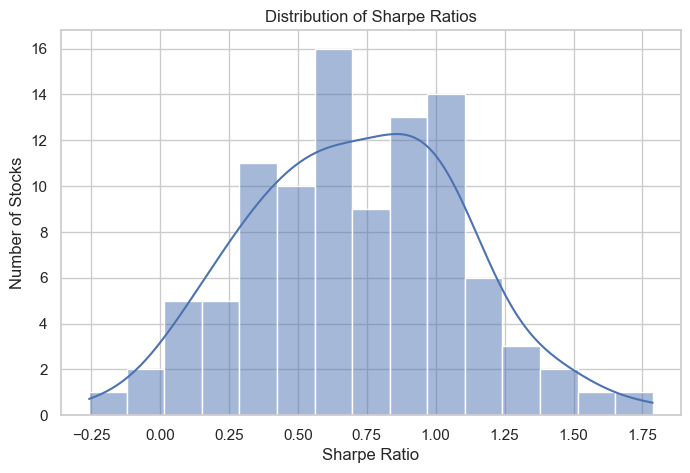

In [28]:
# Create DataFrame
perf_df = pd.DataFrame(performance_summary)

# Display summary statistics
print("\n=== Summary Statistics ===")
print(perf_df.describe().round(4))


# Mean values
mean_metrics = perf_df[['Return', 'Sharpe Ratio', 'Final Value', 'Max Drawdown']].mean()
print("\n=== Mean Metrics ===")
print(mean_metrics.round(4))

# --- Plots ---
sns.set(style="whitegrid")

# 1. Histogram of Sharpe ratios
plt.figure(figsize=(8, 5))
sns.histplot(perf_df['Sharpe Ratio'], kde=True, bins=15)
plt.title('Distribution of Sharpe Ratios')
plt.xlabel('Sharpe Ratio')
plt.ylabel('Number of Stocks')
plt.show()


# 2. Optional: Save results to CSV
perf_df.to_csv('backtest_results_universal_params.csv', index=False)

/var/folders/tp/t7h5dj8d7jjc96457jjj5ghm0000gn/T/ipykernel_4378/878063367.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


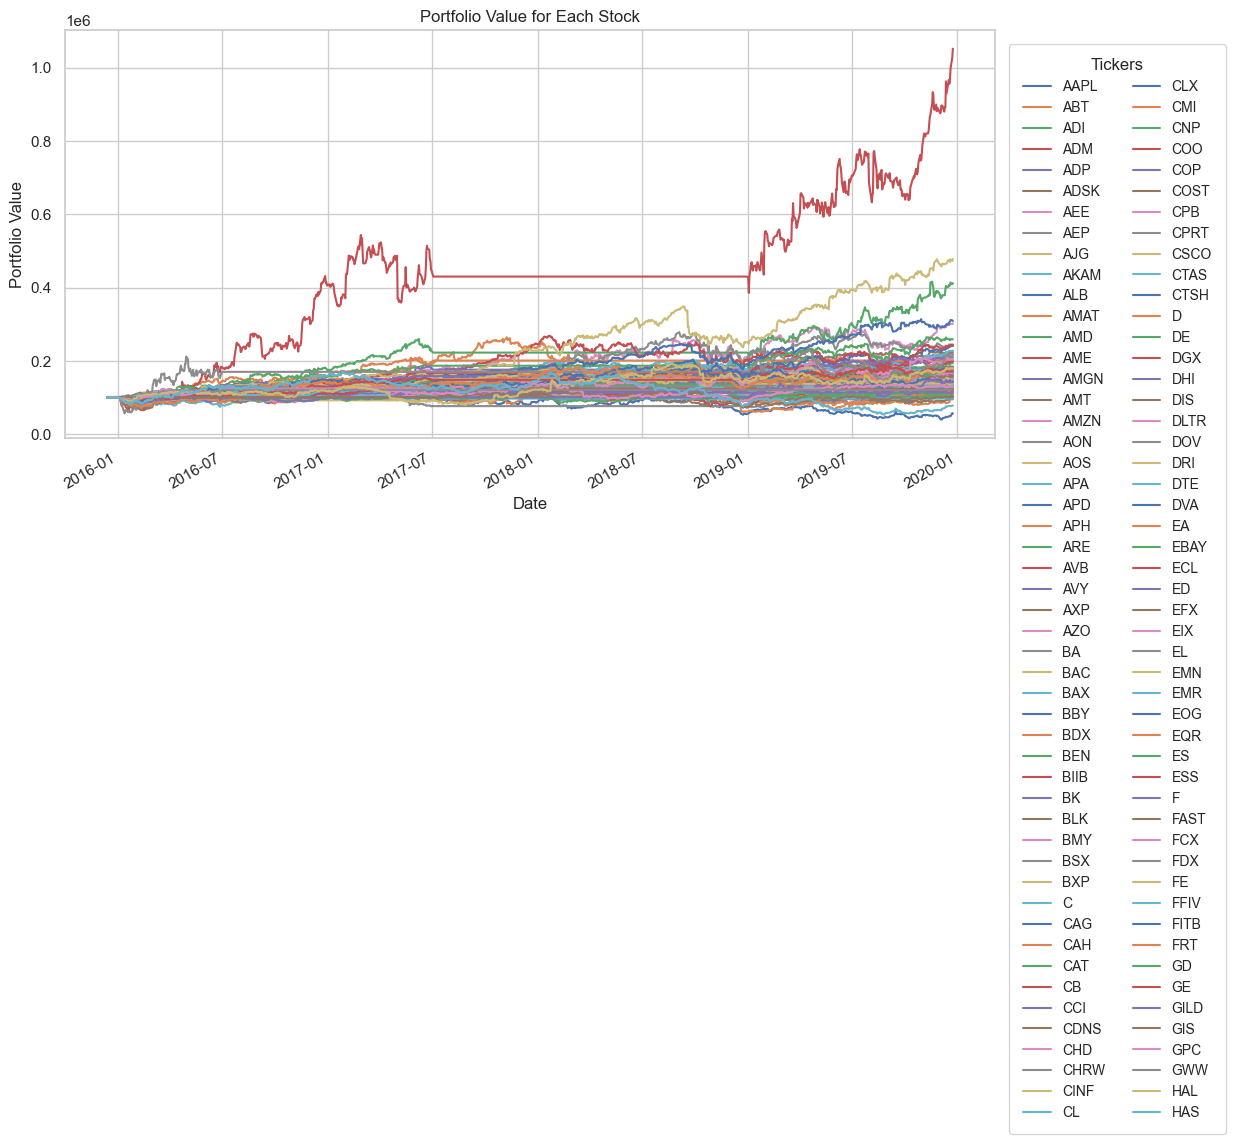

In [29]:
combined_portfolio = pd.concat(portfolio_series_list, axis=1)
ax = combined_portfolio.plot(figsize=(12, 6))

# Title and labels
plt.title('Portfolio Value for Each Stock')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')

# Customize legend
plt.legend(title='Tickers', loc='upper left', bbox_to_anchor=(1, 1), fontsize=10, title_fontsize=12, ncol=2, borderpad=1, borderaxespad=1)

# Add grid and show plot
plt.grid(True)
plt.tight_layout()
plt.show()